In [12]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
import random
import seaborn as sns
import plotly.express as px

from collections import defaultdict
from scipy.stats import pearsonr

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

In [13]:
df = pd.read_csv('df_scaled.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166664 entries, 0 to 166663
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   povertyPercentage          166664 non-null  float64
 1   incident_gravity           166664 non-null  float64
 2   females_rate               166664 non-null  float64
 3   minor_rate                 166664 non-null  float64
 4   arrested_rate              166664 non-null  float64
 5   survival_rate              166664 non-null  float64
 6   winning_party_percentage   166664 non-null  float64
 7   killed_rate                166664 non-null  float64
 8   injured_rate               166664 non-null  float64
 9   killed_disp_per_district   166664 non-null  float64
 10  injured_disp_per_district  166664 non-null  float64
 11  part_disp_per_district     166664 non-null  float64
 12  avg_age_participants       166664 non-null  float64
 13  n_participants             16

In [14]:
df['state'].value_counts().head(3)

state
illinois      14276
california    11975
florida        9713
Name: count, dtype: int64

We selected one state as stated in subtask of clustering task.

In particular, we decided to select the state with the second higher number of gun incidents which resulted California

In [15]:
df = df.loc[df['state'] == 'california']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11975 entries, 7720 to 166507
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   povertyPercentage          11975 non-null  float64
 1   incident_gravity           11975 non-null  float64
 2   females_rate               11975 non-null  float64
 3   minor_rate                 11975 non-null  float64
 4   arrested_rate              11975 non-null  float64
 5   survival_rate              11975 non-null  float64
 6   winning_party_percentage   11975 non-null  float64
 7   killed_rate                11975 non-null  float64
 8   injured_rate               11975 non-null  float64
 9   killed_disp_per_district   11975 non-null  float64
 10  injured_disp_per_district  11975 non-null  float64
 11  part_disp_per_district     11975 non-null  float64
 12  avg_age_participants       11975 non-null  float64
 13  n_participants             11975 non-null  floa

In [16]:
column_to_drop = ['avg_age_participants','n_participants','n_participants_child', 'n_participants_teen', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed','date', 'latitude', 'longitude','congressional_district', 'candidatevotes', 'totalvotes', 'isKilled', 'involve_injury','pc1', 'pc2']

       
for col in df.columns:
    if df[col].dtype == 'object':
       column_to_drop.append(col)
column_to_drop

['avg_age_participants',
 'n_participants',
 'n_participants_child',
 'n_participants_teen',
 'n_females',
 'n_killed',
 'n_injured',
 'n_arrested',
 'n_unharmed',
 'date',
 'latitude',
 'longitude',
 'congressional_district',
 'candidatevotes',
 'totalvotes',
 'isKilled',
 'involve_injury',
 'pc1',
 'pc2',
 'date',
 'state',
 'city_or_county',
 'incident_characteristics1',
 'party']

In [17]:
df_categorical = df[column_to_drop]
df_numeric = df.drop(columns=column_to_drop)

In [18]:
df_categorical.info()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11975 entries, 7720 to 166507
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   avg_age_participants       11975 non-null  float64
 1   n_participants             11975 non-null  float64
 2   n_participants_child       11975 non-null  int64  
 3   n_participants_teen        11975 non-null  int64  
 4   n_females                  11975 non-null  float64
 5   n_killed                   11975 non-null  float64
 6   n_injured                  11975 non-null  float64
 7   n_arrested                 11975 non-null  float64
 8   n_unharmed                 11975 non-null  float64
 9   date                       11975 non-null  object 
 10  latitude                   11975 non-null  float64
 11  longitude                  11975 non-null  float64
 12  congressional_district     11975 non-null  int64  
 13  candidatevotes             11975 non-null  int6

# Hierarchical clustering (Agglomerative)

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from tqdm import tqdm
from sklearn import metrics

metric: cityblock, method:complete, truncation_mode:None, level':2, k:5, silhouette: 0.2956507564819501 , DBscore:0.7410252715340289


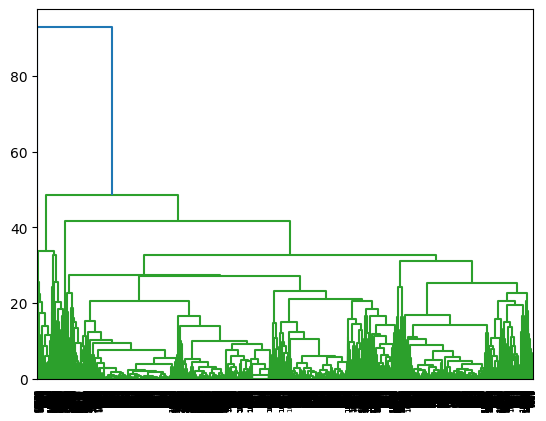

metric: cityblock, method:complete, truncation_mode:None, level':2, k:10, silhouette: 0.2071123547933502 , DBscore:1.2734375686808517


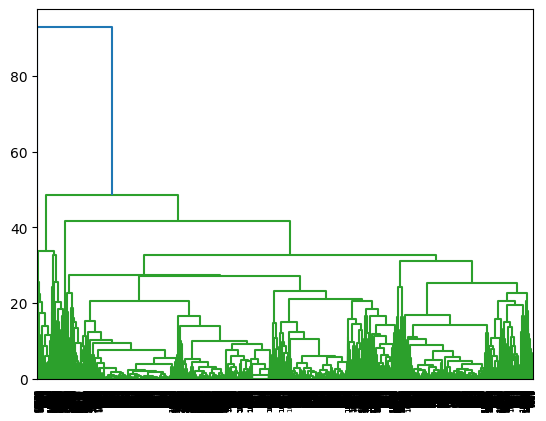

metric: cityblock, method:complete, truncation_mode:None, level':5, k:5, silhouette: 0.2956507564819501 , DBscore:0.7410252715340289


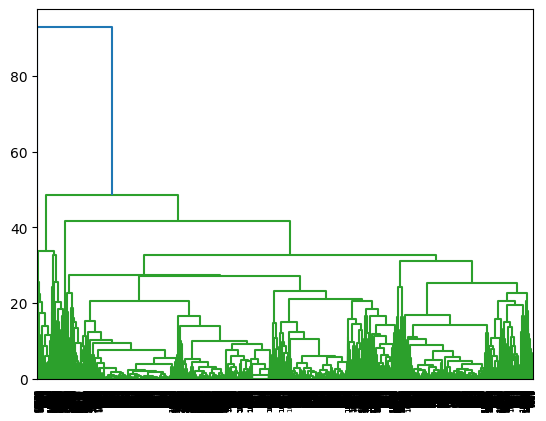

metric: cityblock, method:complete, truncation_mode:None, level':5, k:10, silhouette: 0.2071123547933502 , DBscore:1.2734375686808517


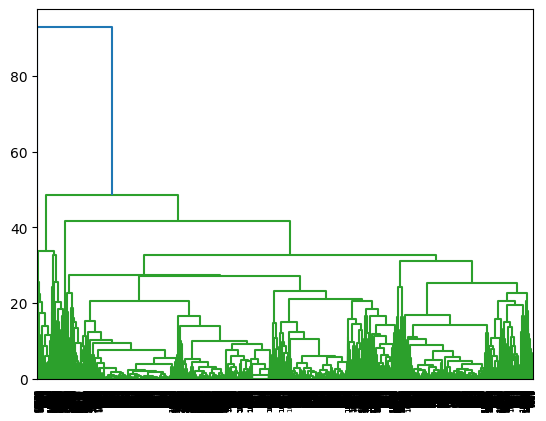

metric: cityblock, method:complete, truncation_mode:None, level':15, k:5, silhouette: 0.2956507564819501 , DBscore:0.7410252715340289


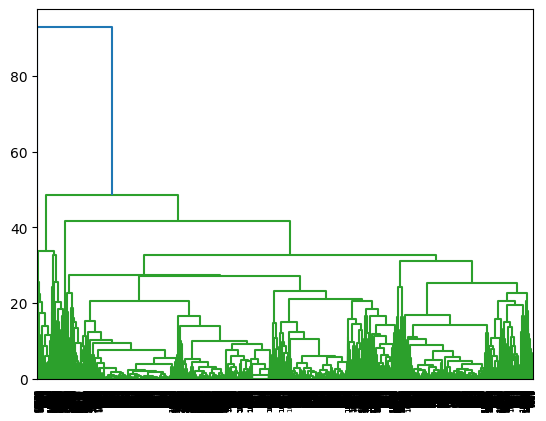

metric: cityblock, method:complete, truncation_mode:None, level':15, k:10, silhouette: 0.2071123547933502 , DBscore:1.2734375686808517


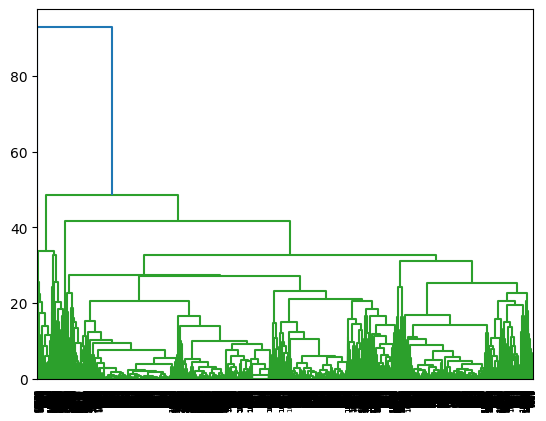

metric: cityblock, method:complete, truncation_mode:lastp, level':2, k:5, silhouette: 0.2956507564819501 , DBscore:0.7410252715340289


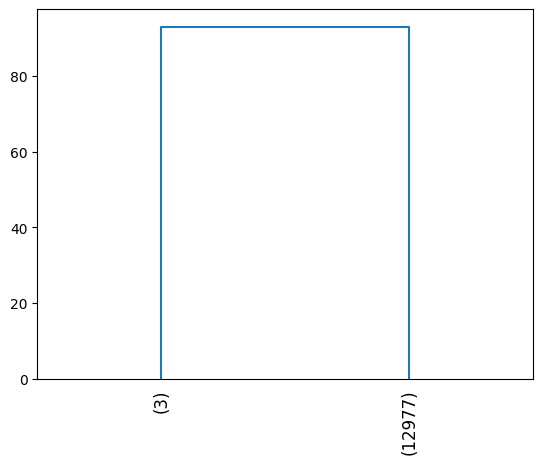

metric: cityblock, method:complete, truncation_mode:lastp, level':2, k:10, silhouette: 0.2071123547933502 , DBscore:1.2734375686808517


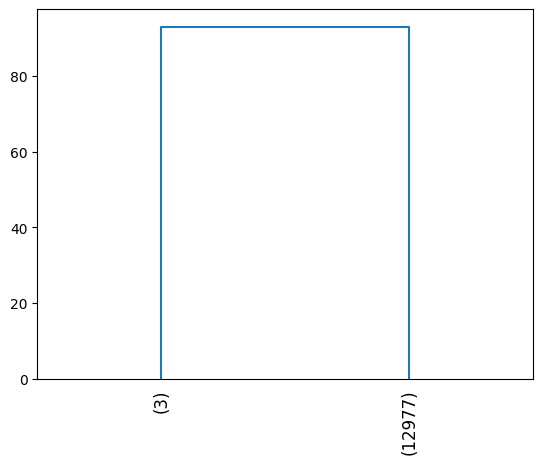

metric: cityblock, method:complete, truncation_mode:lastp, level':5, k:5, silhouette: 0.2956507564819501 , DBscore:0.7410252715340289


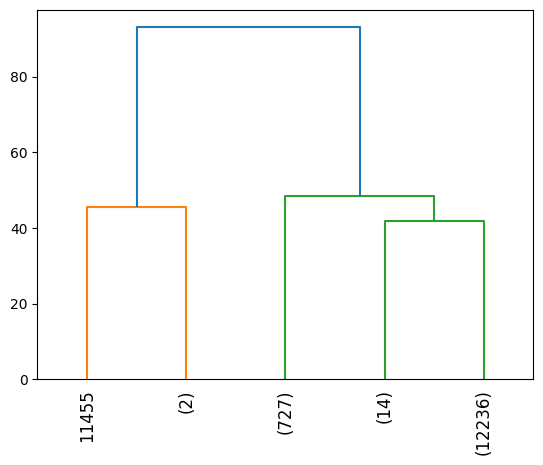

metric: cityblock, method:complete, truncation_mode:lastp, level':5, k:10, silhouette: 0.2071123547933502 , DBscore:1.2734375686808517


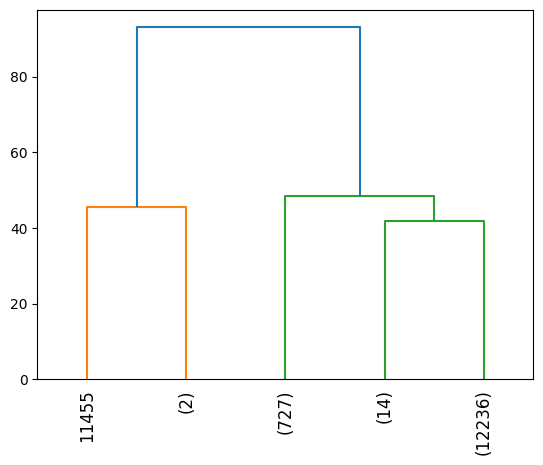

metric: cityblock, method:complete, truncation_mode:lastp, level':15, k:5, silhouette: 0.2956507564819501 , DBscore:0.7410252715340289


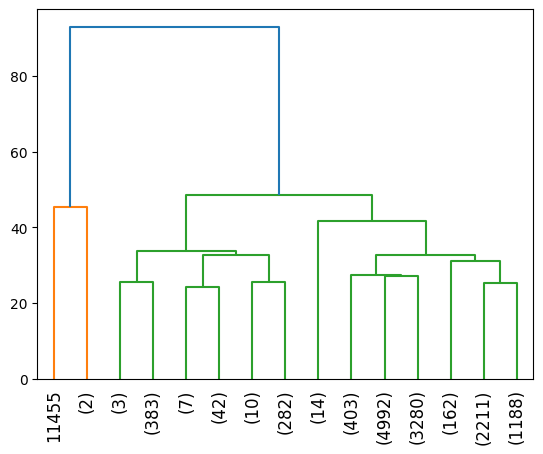

metric: cityblock, method:complete, truncation_mode:lastp, level':15, k:10, silhouette: 0.2071123547933502 , DBscore:1.2734375686808517


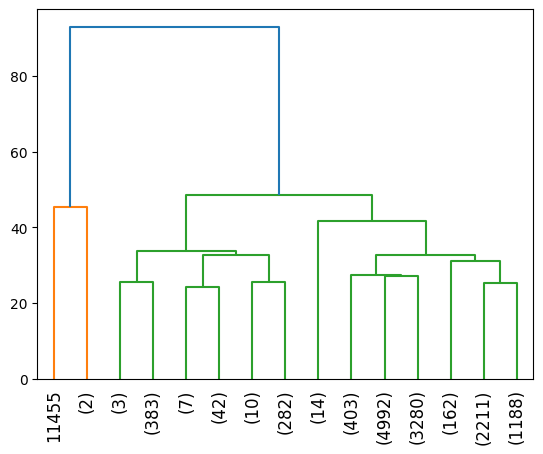

metric: cityblock, method:complete, truncation_mode:level, level':2, k:5, silhouette: 0.2956507564819501 , DBscore:0.7410252715340289


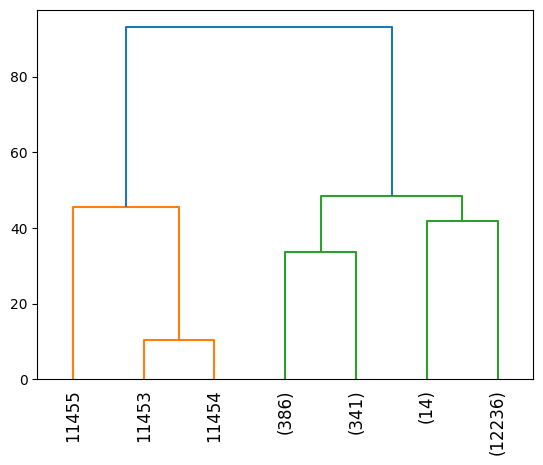

metric: cityblock, method:complete, truncation_mode:level, level':2, k:10, silhouette: 0.2071123547933502 , DBscore:1.2734375686808517


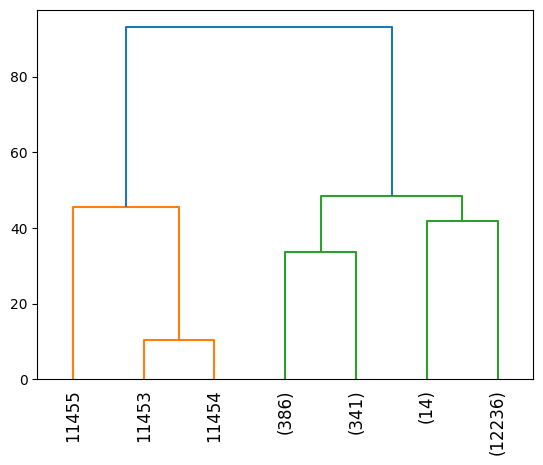

metric: cityblock, method:complete, truncation_mode:level, level':5, k:5, silhouette: 0.2956507564819501 , DBscore:0.7410252715340289


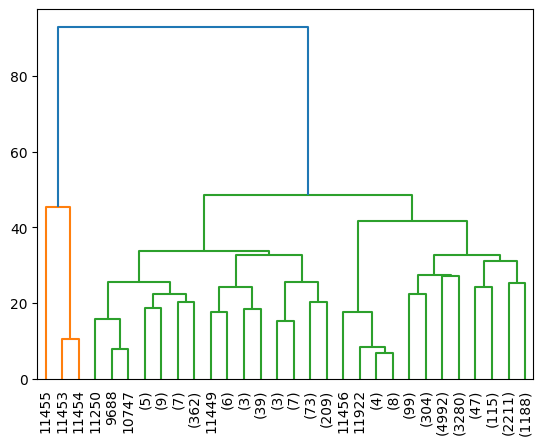

metric: cityblock, method:complete, truncation_mode:level, level':5, k:10, silhouette: 0.2071123547933502 , DBscore:1.2734375686808517


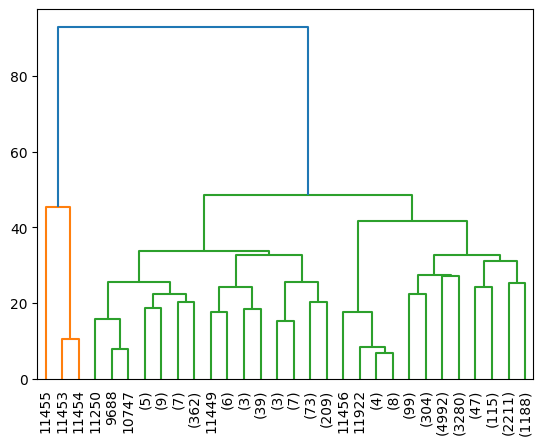

metric: cityblock, method:complete, truncation_mode:level, level':15, k:5, silhouette: 0.2956507564819501 , DBscore:0.7410252715340289


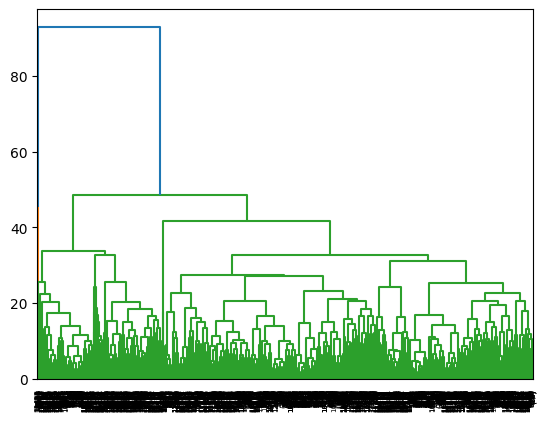

metric: cityblock, method:complete, truncation_mode:level, level':15, k:10, silhouette: 0.2071123547933502 , DBscore:1.2734375686808517


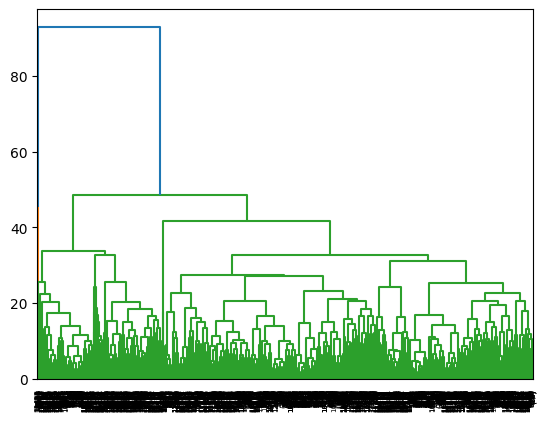

metric: cityblock, method:single, truncation_mode:None, level':2, k:5, silhouette: 0.737427091184732 , DBscore:0.1474685904871516


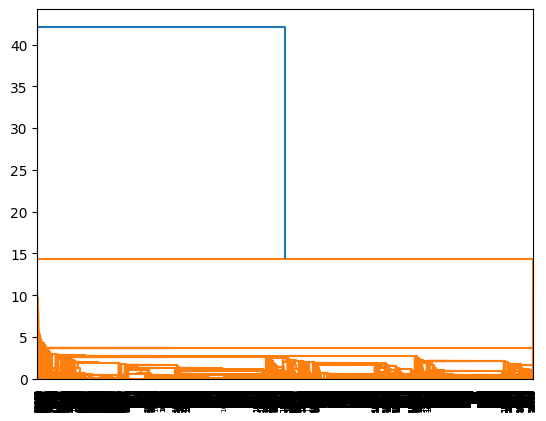

metric: cityblock, method:single, truncation_mode:None, level':2, k:10, silhouette: 0.5110902135660391 , DBscore:0.24635302042554058


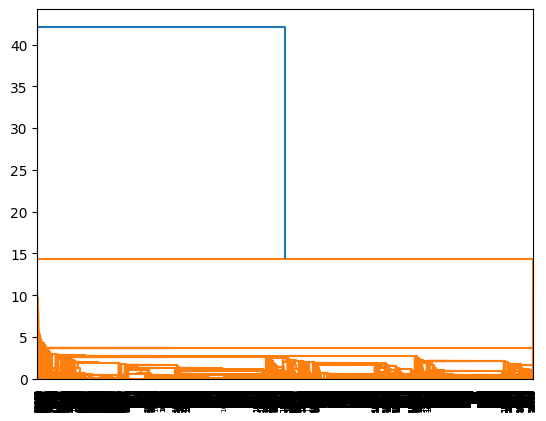

metric: cityblock, method:single, truncation_mode:None, level':5, k:5, silhouette: 0.737427091184732 , DBscore:0.1474685904871516


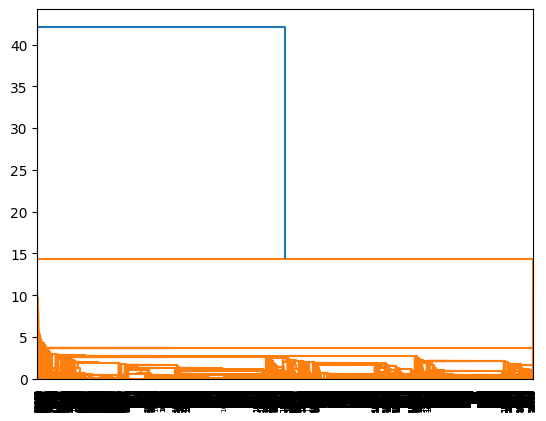

metric: cityblock, method:single, truncation_mode:None, level':5, k:10, silhouette: 0.5110902135660391 , DBscore:0.24635302042554058


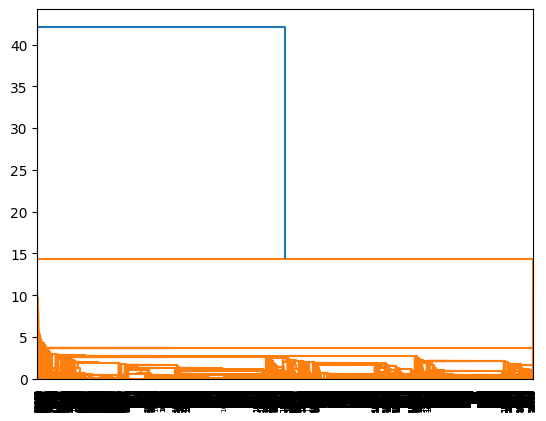

metric: cityblock, method:single, truncation_mode:None, level':15, k:5, silhouette: 0.737427091184732 , DBscore:0.1474685904871516


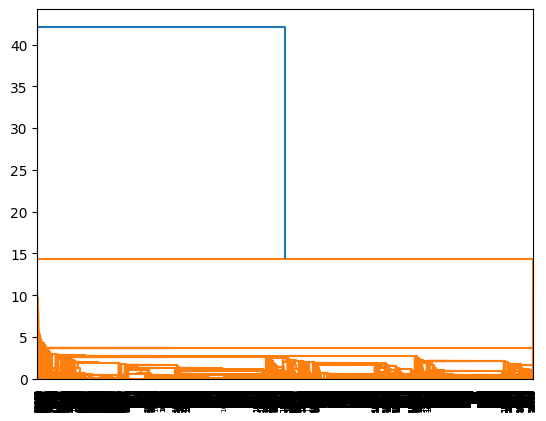

metric: cityblock, method:single, truncation_mode:None, level':15, k:10, silhouette: 0.5110902135660391 , DBscore:0.24635302042554058


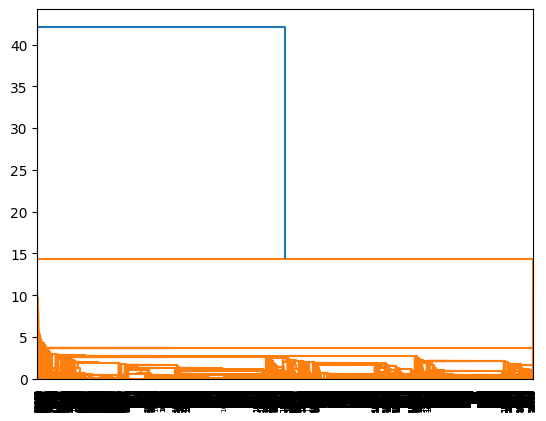

metric: cityblock, method:single, truncation_mode:lastp, level':2, k:5, silhouette: 0.737427091184732 , DBscore:0.1474685904871516


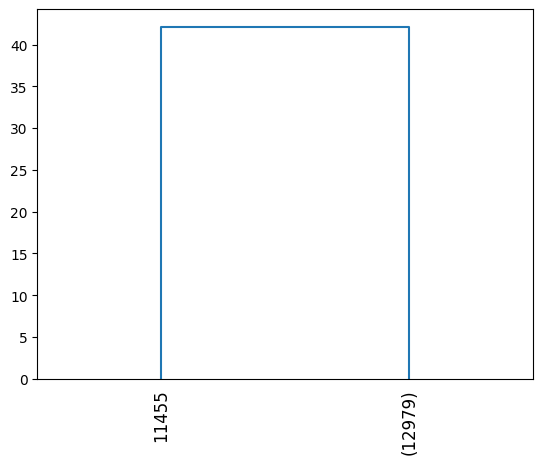

metric: cityblock, method:single, truncation_mode:lastp, level':2, k:10, silhouette: 0.5110902135660391 , DBscore:0.24635302042554058


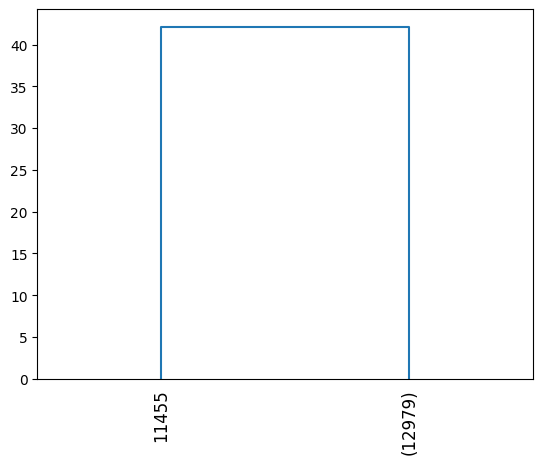

metric: cityblock, method:single, truncation_mode:lastp, level':5, k:5, silhouette: 0.737427091184732 , DBscore:0.1474685904871516


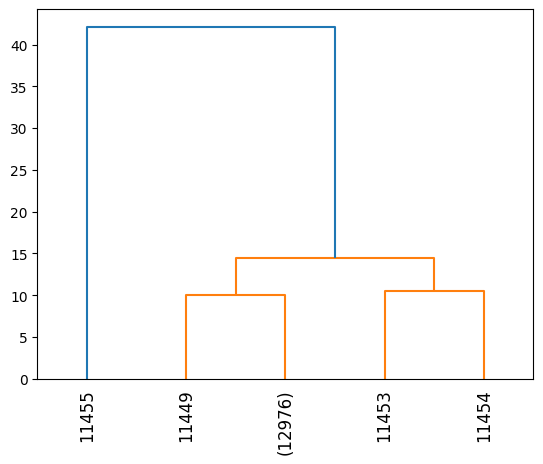

metric: cityblock, method:single, truncation_mode:lastp, level':5, k:10, silhouette: 0.5110902135660391 , DBscore:0.24635302042554058


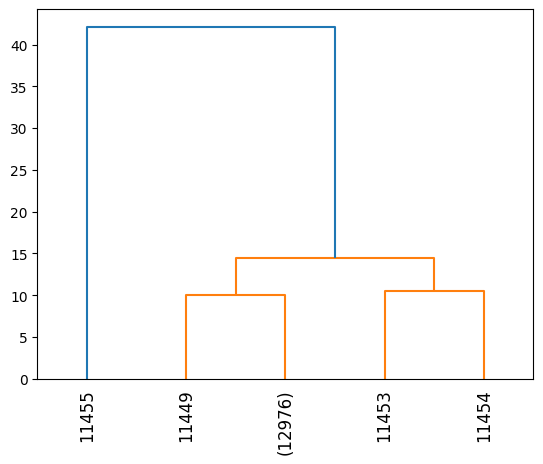

metric: cityblock, method:single, truncation_mode:lastp, level':15, k:5, silhouette: 0.737427091184732 , DBscore:0.1474685904871516


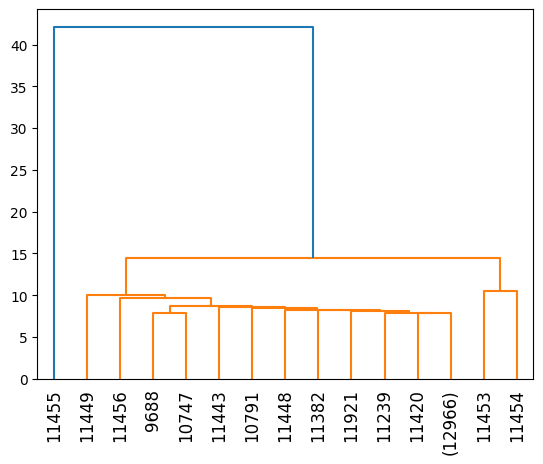

metric: cityblock, method:single, truncation_mode:lastp, level':15, k:10, silhouette: 0.5110902135660391 , DBscore:0.24635302042554058


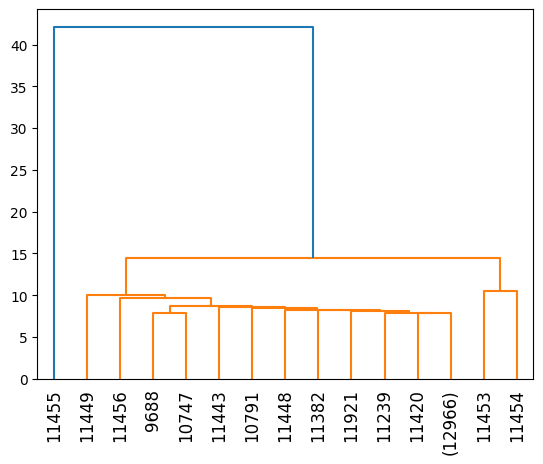

metric: cityblock, method:single, truncation_mode:level, level':2, k:5, silhouette: 0.737427091184732 , DBscore:0.1474685904871516


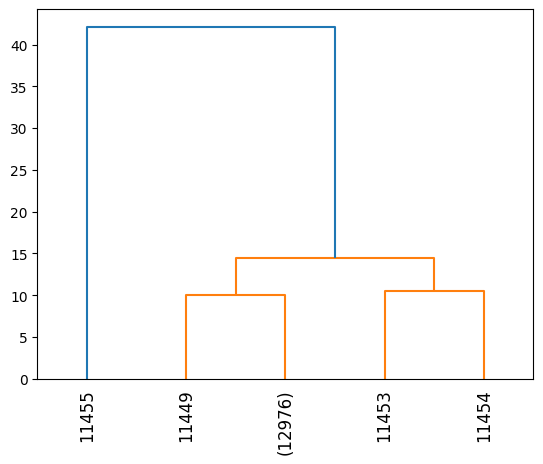

metric: cityblock, method:single, truncation_mode:level, level':2, k:10, silhouette: 0.5110902135660391 , DBscore:0.24635302042554058


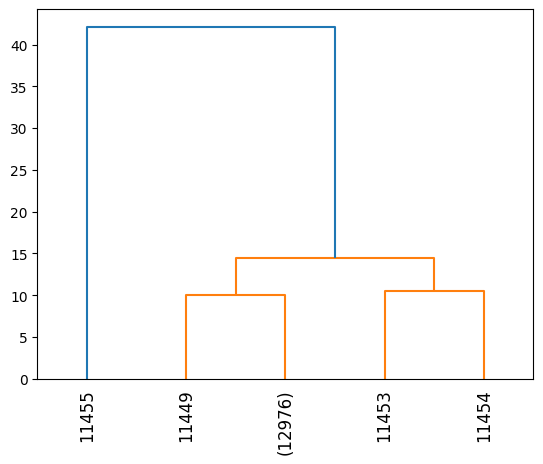

metric: cityblock, method:single, truncation_mode:level, level':5, k:5, silhouette: 0.737427091184732 , DBscore:0.1474685904871516


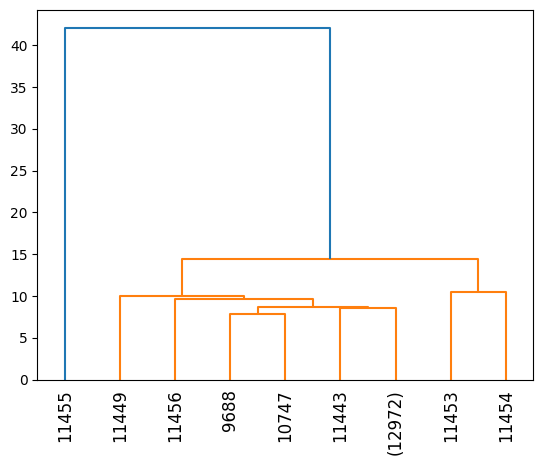

metric: cityblock, method:single, truncation_mode:level, level':5, k:10, silhouette: 0.5110902135660391 , DBscore:0.24635302042554058


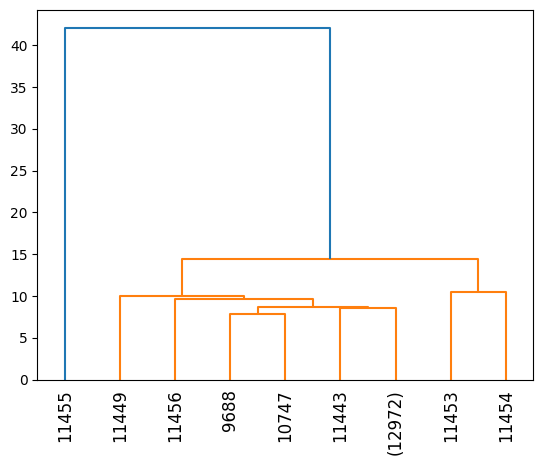

metric: cityblock, method:single, truncation_mode:level, level':15, k:5, silhouette: 0.737427091184732 , DBscore:0.1474685904871516


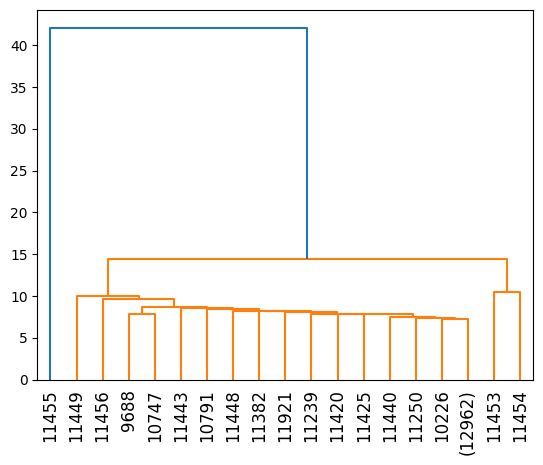

metric: cityblock, method:single, truncation_mode:level, level':15, k:10, silhouette: 0.5110902135660391 , DBscore:0.24635302042554058


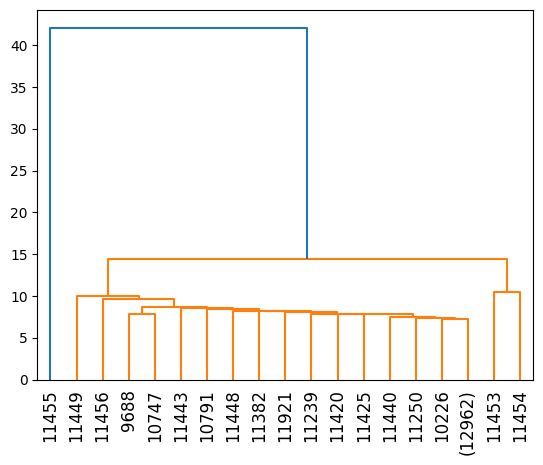

metric: cityblock, method:average, truncation_mode:None, level':2, k:5, silhouette: 0.6871068313701373 , DBscore:0.3485052488628274


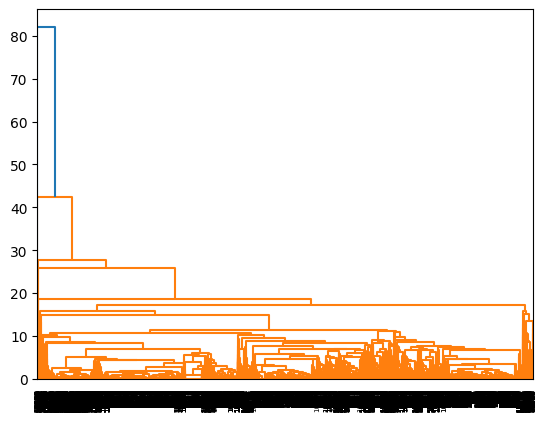

metric: cityblock, method:average, truncation_mode:None, level':2, k:10, silhouette: 0.33974454442086127 , DBscore:0.7854813001661084


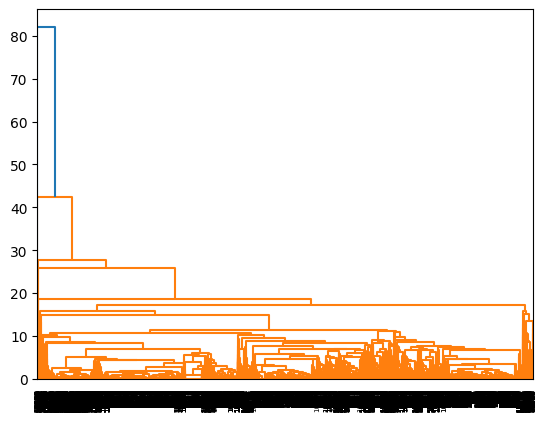

metric: cityblock, method:average, truncation_mode:None, level':5, k:5, silhouette: 0.6871068313701373 , DBscore:0.3485052488628274


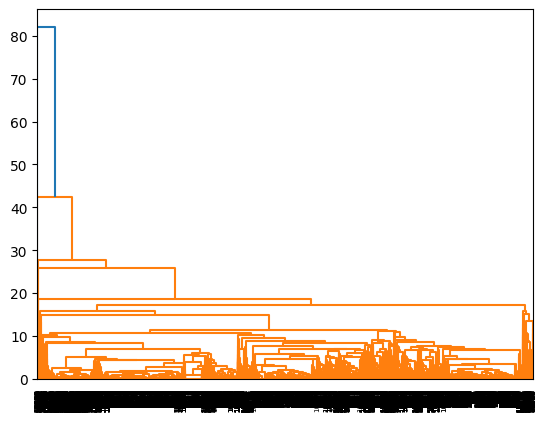

metric: cityblock, method:average, truncation_mode:None, level':5, k:10, silhouette: 0.33974454442086127 , DBscore:0.7854813001661084


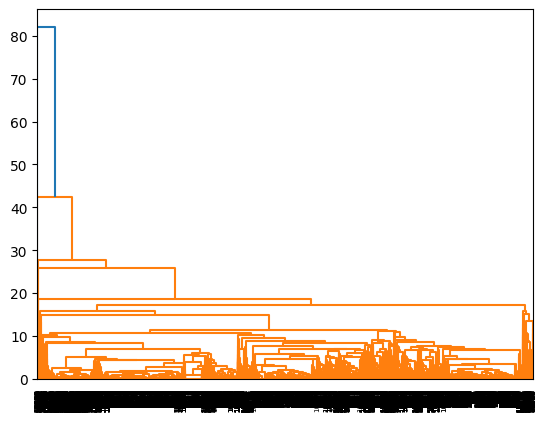

metric: cityblock, method:average, truncation_mode:None, level':15, k:5, silhouette: 0.6871068313701373 , DBscore:0.3485052488628274


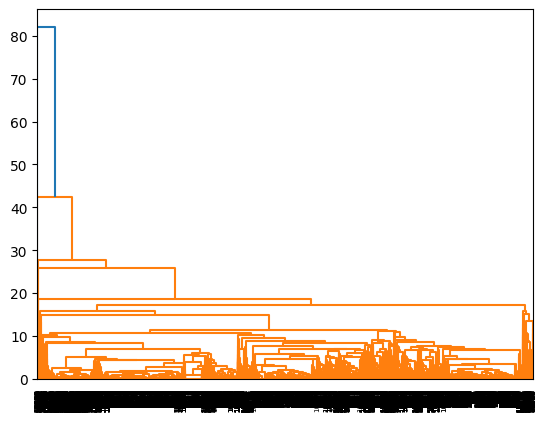

metric: cityblock, method:average, truncation_mode:None, level':15, k:10, silhouette: 0.33974454442086127 , DBscore:0.7854813001661084


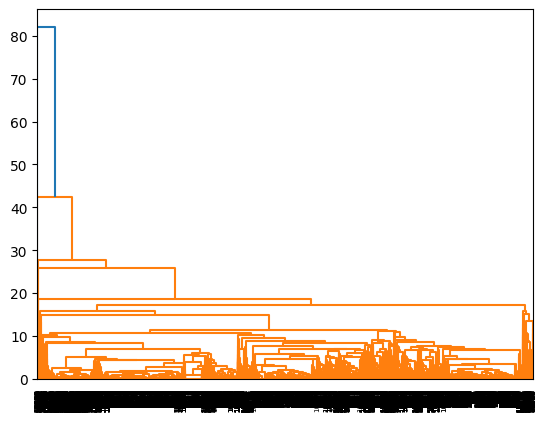

metric: cityblock, method:average, truncation_mode:lastp, level':2, k:5, silhouette: 0.6871068313701373 , DBscore:0.3485052488628274


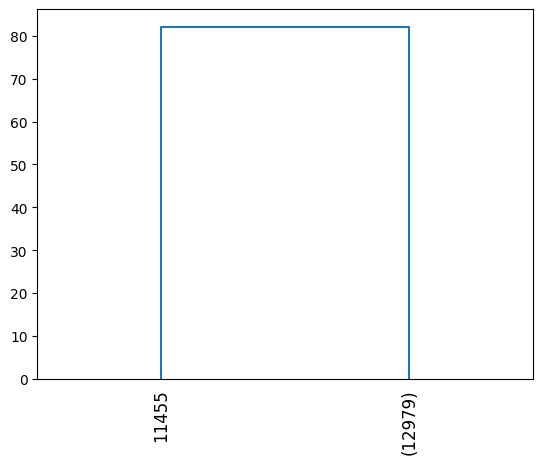

metric: cityblock, method:average, truncation_mode:lastp, level':2, k:10, silhouette: 0.33974454442086127 , DBscore:0.7854813001661084


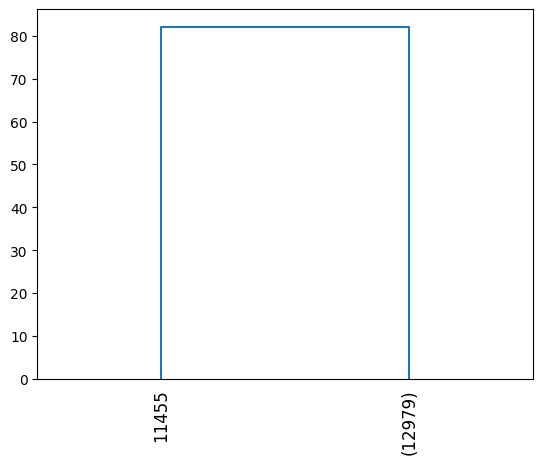

metric: cityblock, method:average, truncation_mode:lastp, level':5, k:5, silhouette: 0.6871068313701373 , DBscore:0.3485052488628274


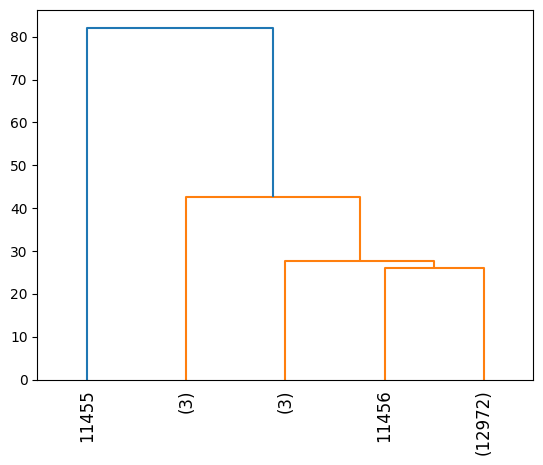

metric: cityblock, method:average, truncation_mode:lastp, level':5, k:10, silhouette: 0.33974454442086127 , DBscore:0.7854813001661084


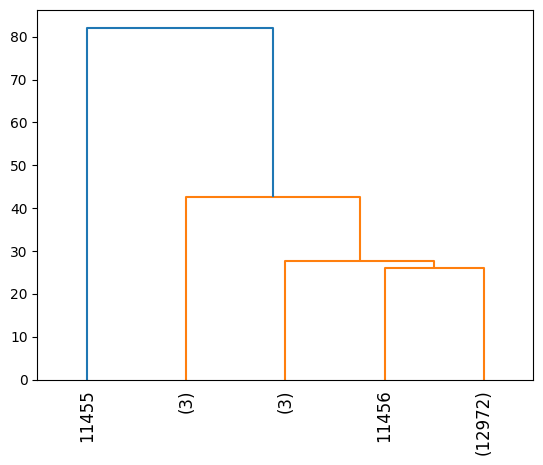

metric: cityblock, method:average, truncation_mode:lastp, level':15, k:5, silhouette: 0.6871068313701373 , DBscore:0.3485052488628274


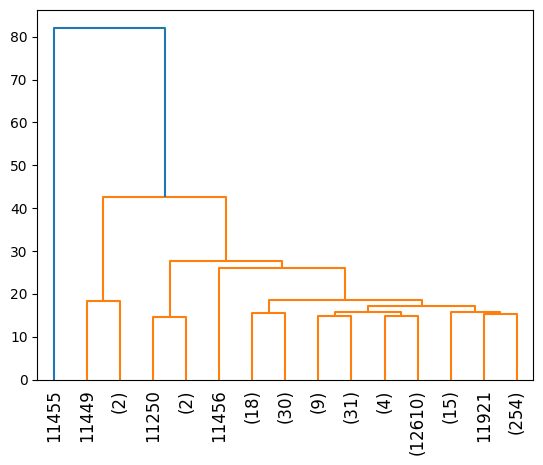

metric: cityblock, method:average, truncation_mode:lastp, level':15, k:10, silhouette: 0.33974454442086127 , DBscore:0.7854813001661084


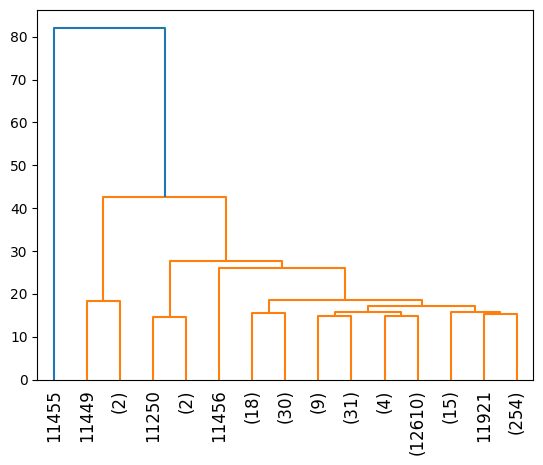

metric: cityblock, method:average, truncation_mode:level, level':2, k:5, silhouette: 0.6871068313701373 , DBscore:0.3485052488628274


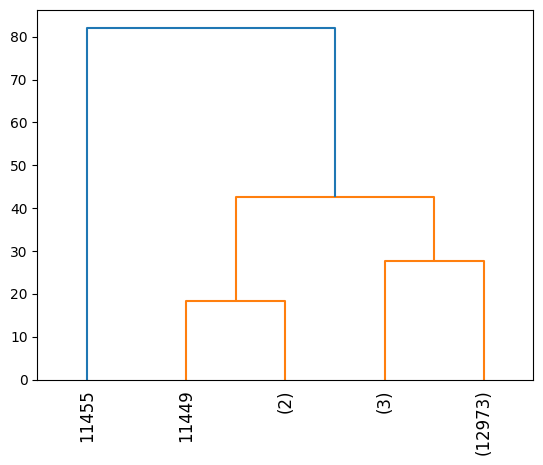

metric: cityblock, method:average, truncation_mode:level, level':2, k:10, silhouette: 0.33974454442086127 , DBscore:0.7854813001661084


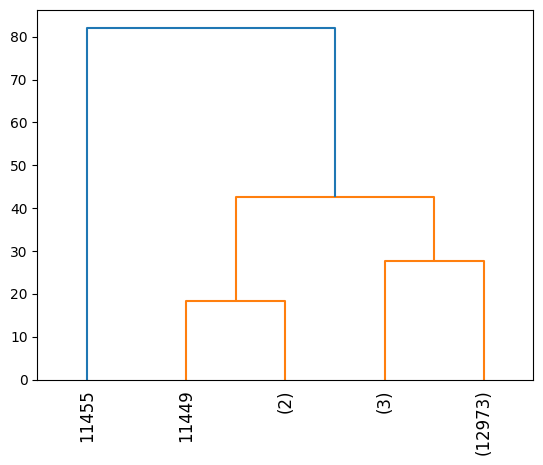

metric: cityblock, method:average, truncation_mode:level, level':5, k:5, silhouette: 0.6871068313701373 , DBscore:0.3485052488628274


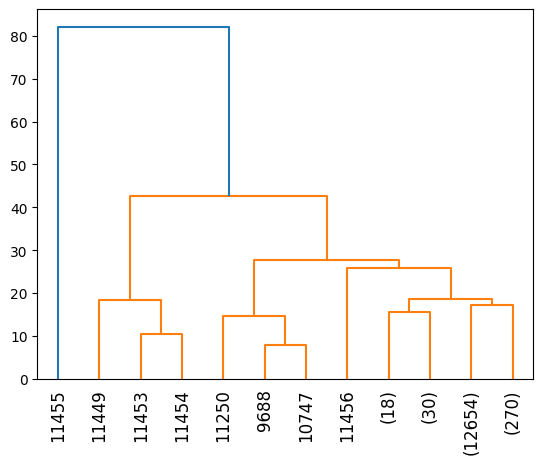

metric: cityblock, method:average, truncation_mode:level, level':5, k:10, silhouette: 0.33974454442086127 , DBscore:0.7854813001661084


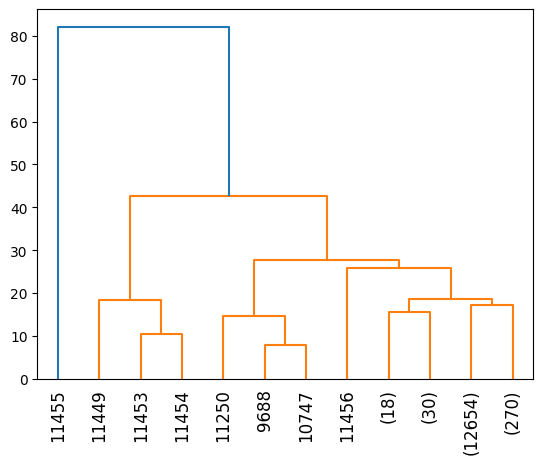

metric: cityblock, method:average, truncation_mode:level, level':15, k:5, silhouette: 0.6871068313701373 , DBscore:0.3485052488628274


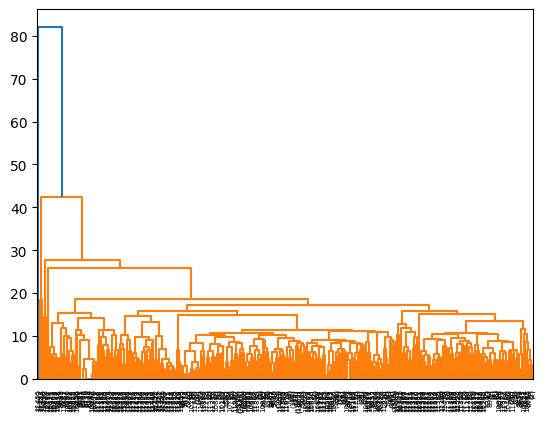

metric: cityblock, method:average, truncation_mode:level, level':15, k:10, silhouette: 0.33974454442086127 , DBscore:0.7854813001661084


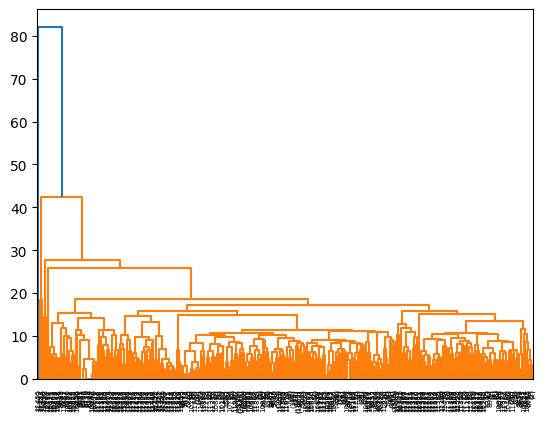

metric: cityblock, method:weighted, truncation_mode:None, level':2, k:5, silhouette: 0.42620185057066967 , DBscore:0.5404117642865203


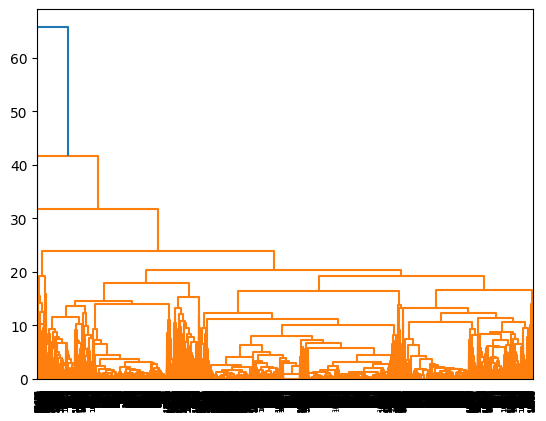

metric: cityblock, method:weighted, truncation_mode:None, level':2, k:10, silhouette: 0.29186720562640756 , DBscore:0.9832033353763509


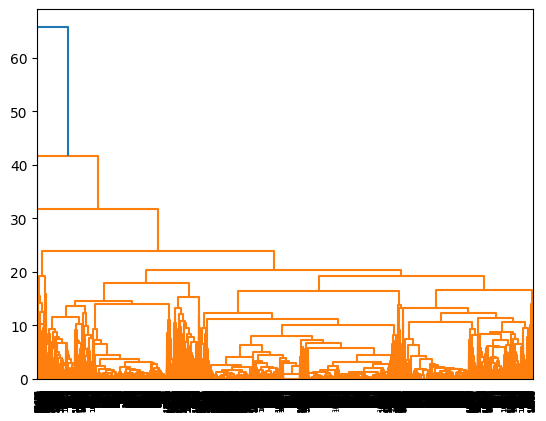

metric: cityblock, method:weighted, truncation_mode:None, level':5, k:5, silhouette: 0.42620185057066967 , DBscore:0.5404117642865203


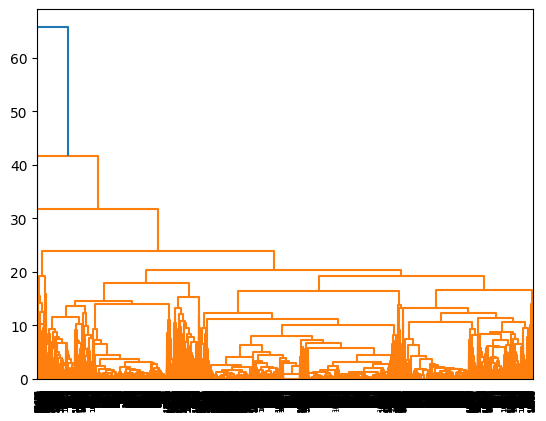

metric: cityblock, method:weighted, truncation_mode:None, level':5, k:10, silhouette: 0.29186720562640756 , DBscore:0.9832033353763509


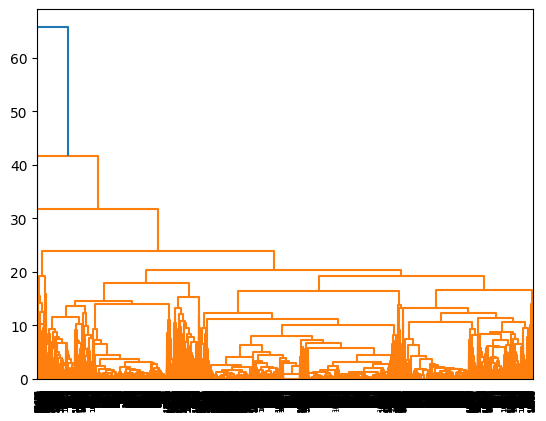

metric: cityblock, method:weighted, truncation_mode:None, level':15, k:5, silhouette: 0.42620185057066967 , DBscore:0.5404117642865203


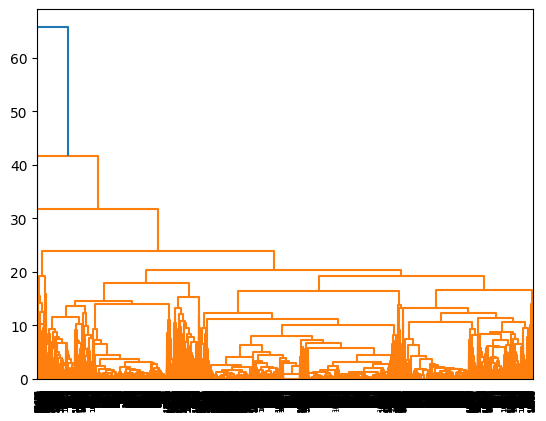

metric: cityblock, method:weighted, truncation_mode:None, level':15, k:10, silhouette: 0.29186720562640756 , DBscore:0.9832033353763509


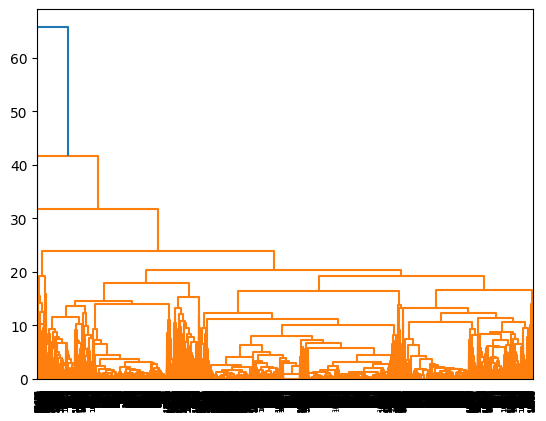

metric: cityblock, method:weighted, truncation_mode:lastp, level':2, k:5, silhouette: 0.42620185057066967 , DBscore:0.5404117642865203


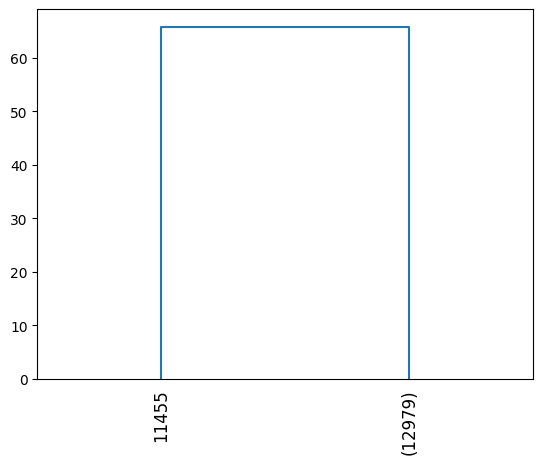

metric: cityblock, method:weighted, truncation_mode:lastp, level':2, k:10, silhouette: 0.29186720562640756 , DBscore:0.9832033353763509


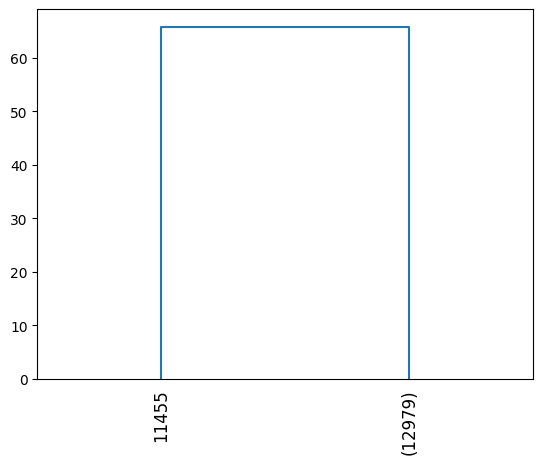

metric: cityblock, method:weighted, truncation_mode:lastp, level':5, k:5, silhouette: 0.42620185057066967 , DBscore:0.5404117642865203


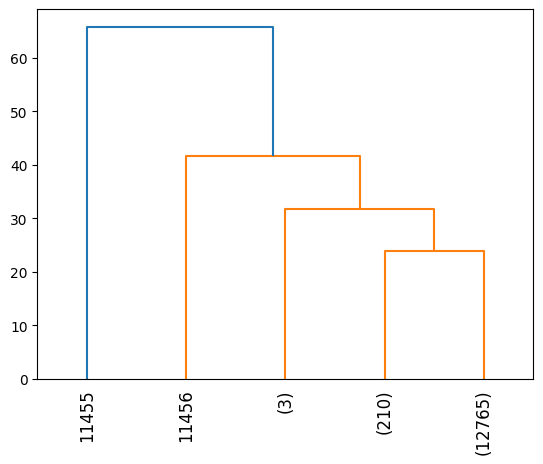

metric: cityblock, method:weighted, truncation_mode:lastp, level':5, k:10, silhouette: 0.29186720562640756 , DBscore:0.9832033353763509


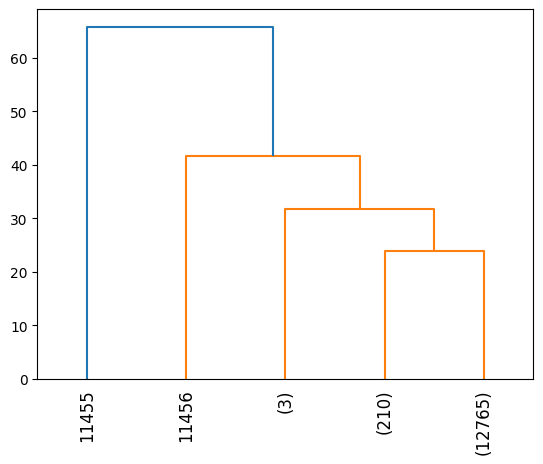

metric: cityblock, method:weighted, truncation_mode:lastp, level':15, k:5, silhouette: 0.42620185057066967 , DBscore:0.5404117642865203


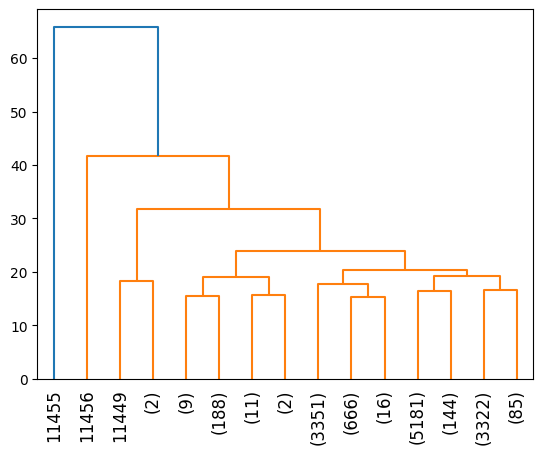

metric: cityblock, method:weighted, truncation_mode:lastp, level':15, k:10, silhouette: 0.29186720562640756 , DBscore:0.9832033353763509


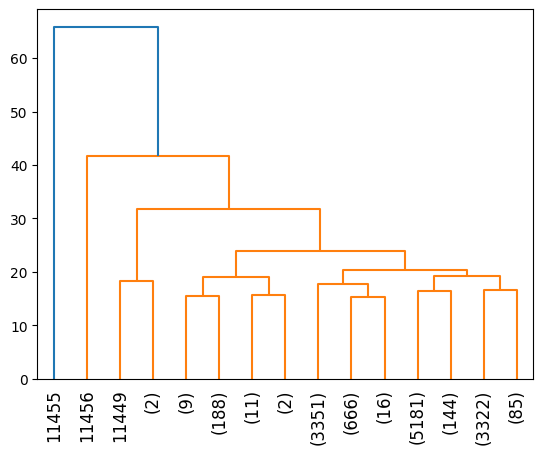

metric: cityblock, method:weighted, truncation_mode:level, level':2, k:5, silhouette: 0.42620185057066967 , DBscore:0.5404117642865203


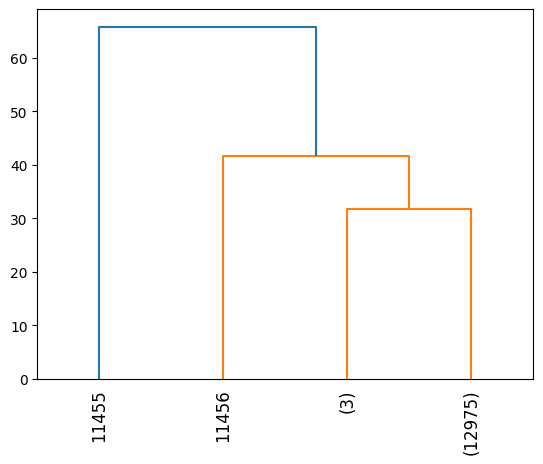

metric: cityblock, method:weighted, truncation_mode:level, level':2, k:10, silhouette: 0.29186720562640756 , DBscore:0.9832033353763509


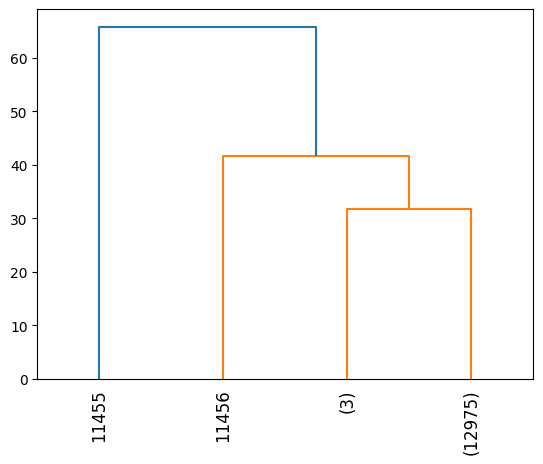

metric: cityblock, method:weighted, truncation_mode:level, level':5, k:5, silhouette: 0.42620185057066967 , DBscore:0.5404117642865203


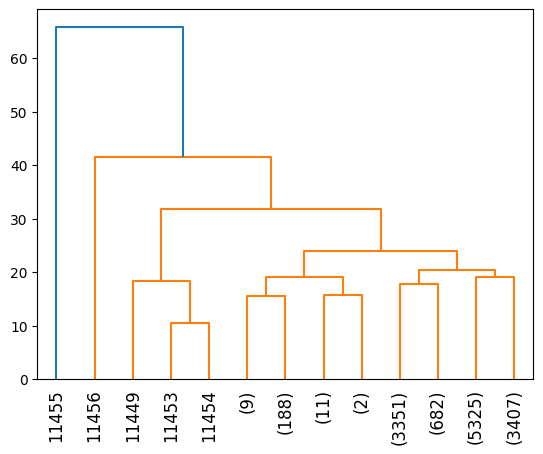

metric: cityblock, method:weighted, truncation_mode:level, level':5, k:10, silhouette: 0.29186720562640756 , DBscore:0.9832033353763509


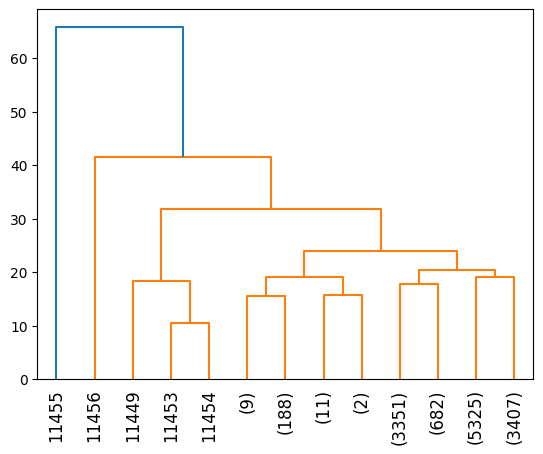

metric: cityblock, method:weighted, truncation_mode:level, level':15, k:5, silhouette: 0.42620185057066967 , DBscore:0.5404117642865203


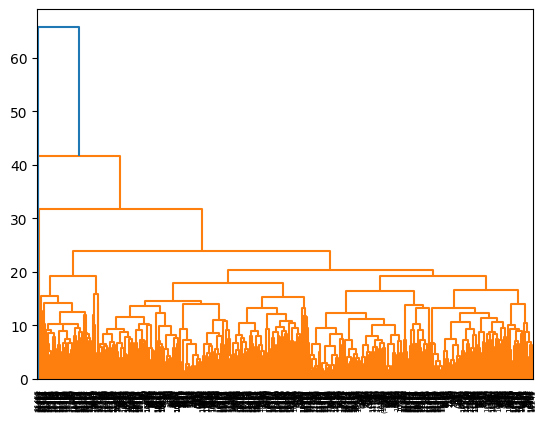

metric: cityblock, method:weighted, truncation_mode:level, level':15, k:10, silhouette: 0.29186720562640756 , DBscore:0.9832033353763509


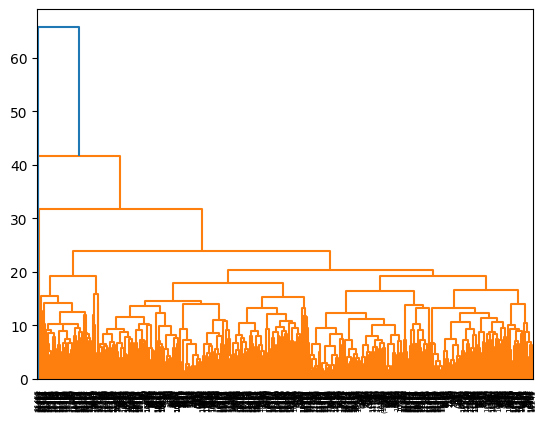

metric: correlation, method:complete, truncation_mode:None, level':2, k:5, silhouette: 0.2786875322254602 , DBscore:1.3006680212630362


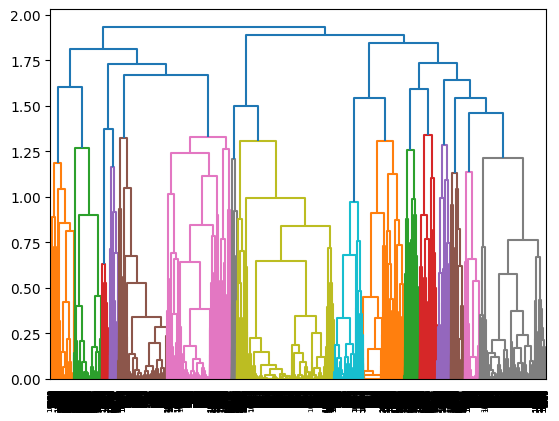

metric: correlation, method:complete, truncation_mode:None, level':2, k:10, silhouette: 0.2257365846529886 , DBscore:1.7775327640390461


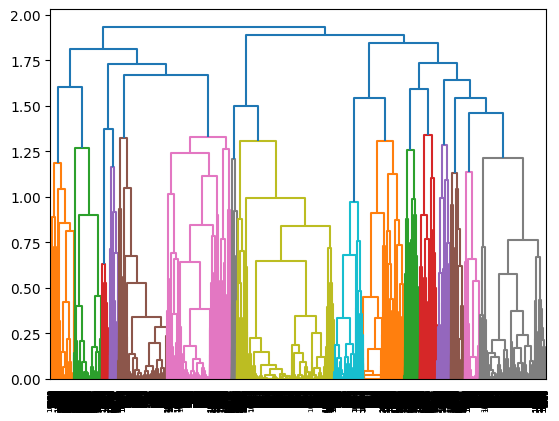

metric: correlation, method:complete, truncation_mode:None, level':5, k:5, silhouette: 0.2786875322254602 , DBscore:1.3006680212630362


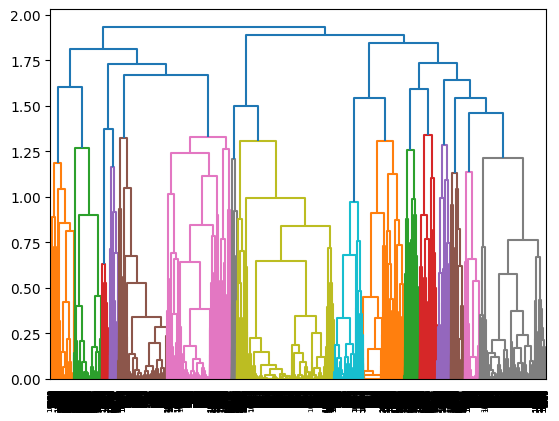

metric: correlation, method:complete, truncation_mode:None, level':5, k:10, silhouette: 0.2257365846529886 , DBscore:1.7775327640390461


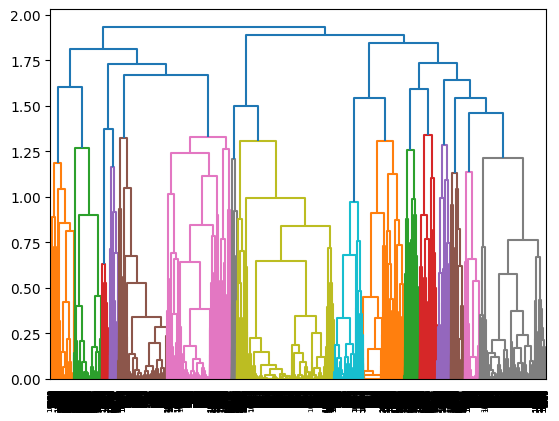

metric: correlation, method:complete, truncation_mode:None, level':15, k:5, silhouette: 0.2786875322254602 , DBscore:1.3006680212630362


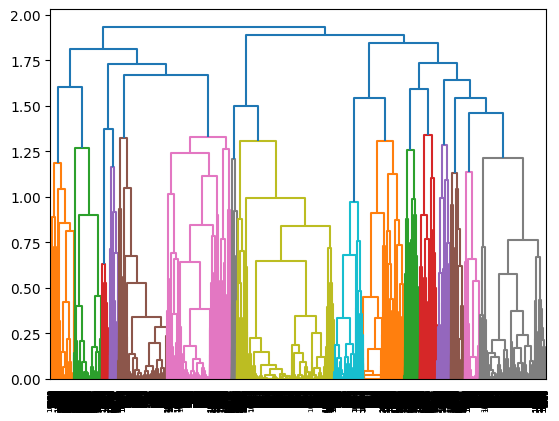

metric: correlation, method:complete, truncation_mode:None, level':15, k:10, silhouette: 0.2257365846529886 , DBscore:1.7775327640390461


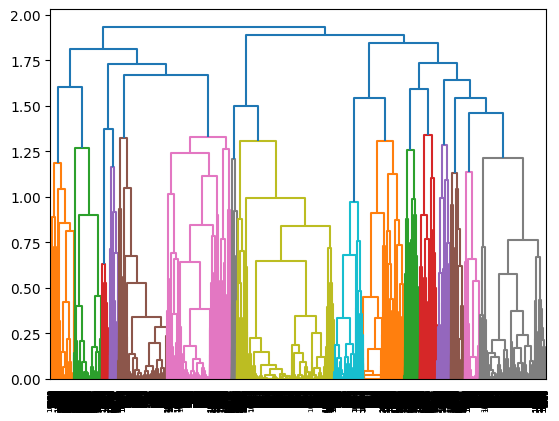

metric: correlation, method:complete, truncation_mode:lastp, level':2, k:5, silhouette: 0.2786875322254602 , DBscore:1.3006680212630362


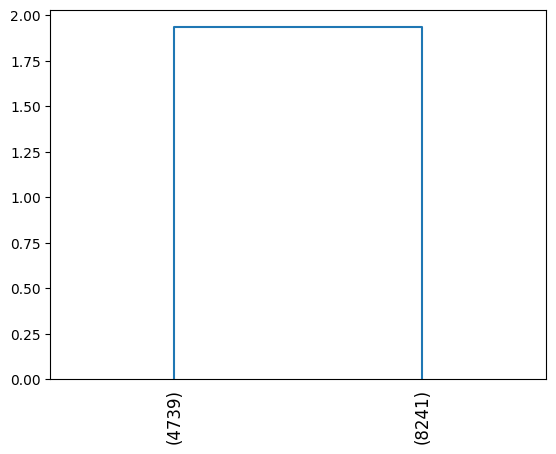

metric: correlation, method:complete, truncation_mode:lastp, level':2, k:10, silhouette: 0.2257365846529886 , DBscore:1.7775327640390461


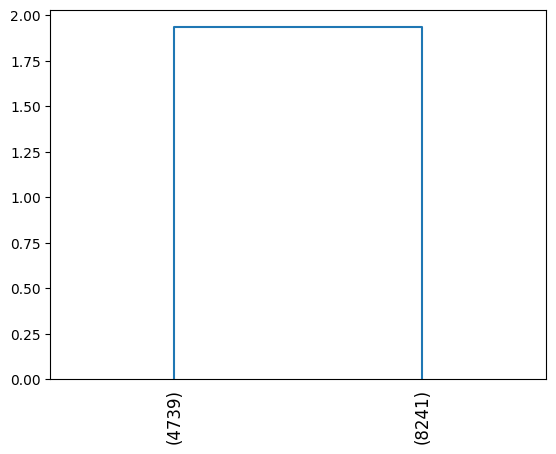

metric: correlation, method:complete, truncation_mode:lastp, level':5, k:5, silhouette: 0.2786875322254602 , DBscore:1.3006680212630362


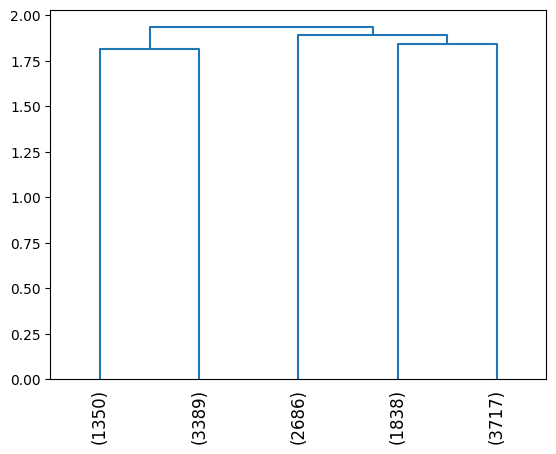

metric: correlation, method:complete, truncation_mode:lastp, level':5, k:10, silhouette: 0.2257365846529886 , DBscore:1.7775327640390461


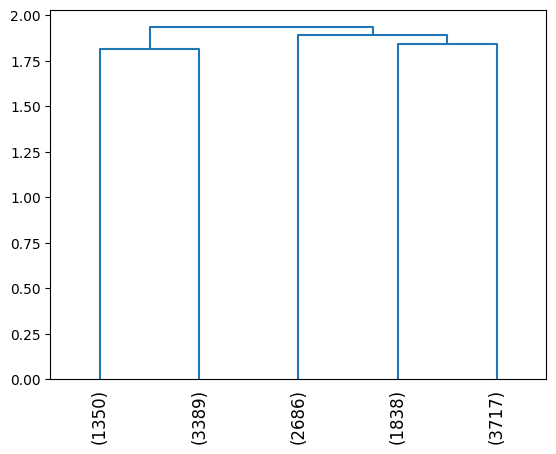

metric: correlation, method:complete, truncation_mode:lastp, level':15, k:5, silhouette: 0.2786875322254602 , DBscore:1.3006680212630362


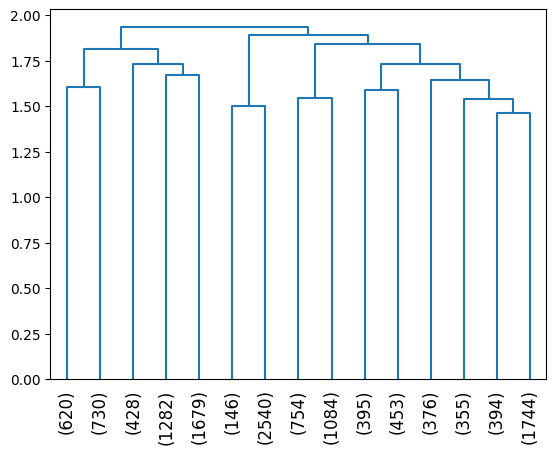

metric: correlation, method:complete, truncation_mode:lastp, level':15, k:10, silhouette: 0.2257365846529886 , DBscore:1.7775327640390461


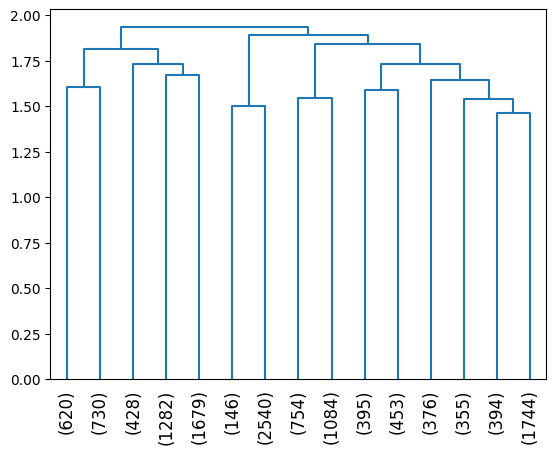

metric: correlation, method:complete, truncation_mode:level, level':2, k:5, silhouette: 0.2786875322254602 , DBscore:1.3006680212630362


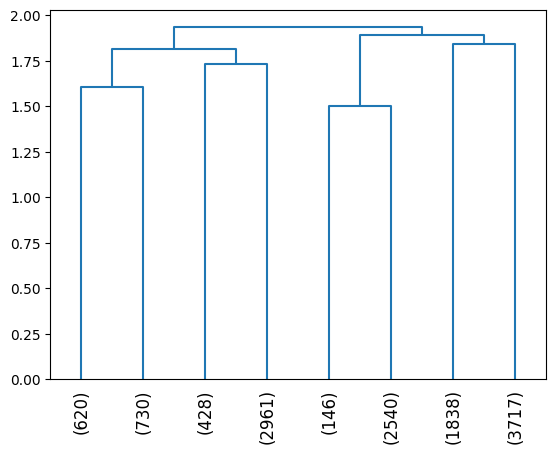

metric: correlation, method:complete, truncation_mode:level, level':2, k:10, silhouette: 0.2257365846529886 , DBscore:1.7775327640390461


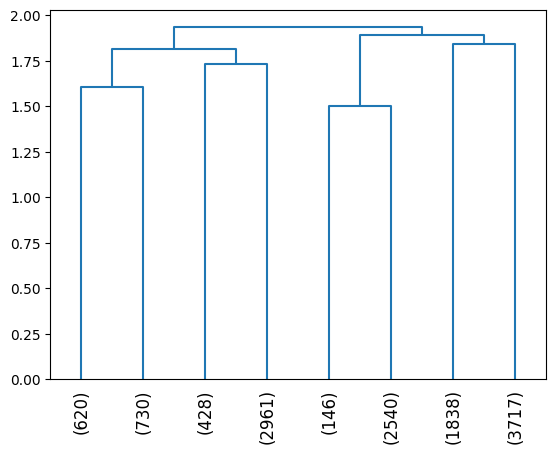

metric: correlation, method:complete, truncation_mode:level, level':5, k:5, silhouette: 0.2786875322254602 , DBscore:1.3006680212630362


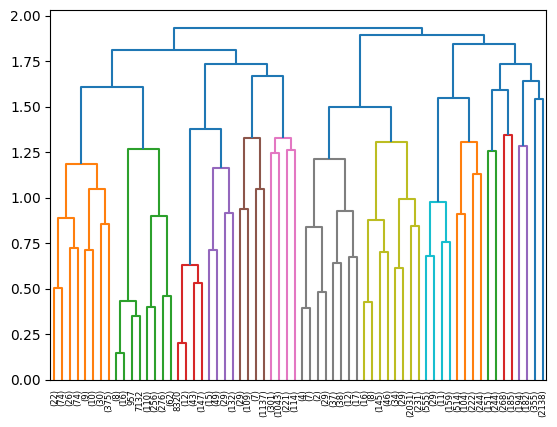

metric: correlation, method:complete, truncation_mode:level, level':5, k:10, silhouette: 0.2257365846529886 , DBscore:1.7775327640390461


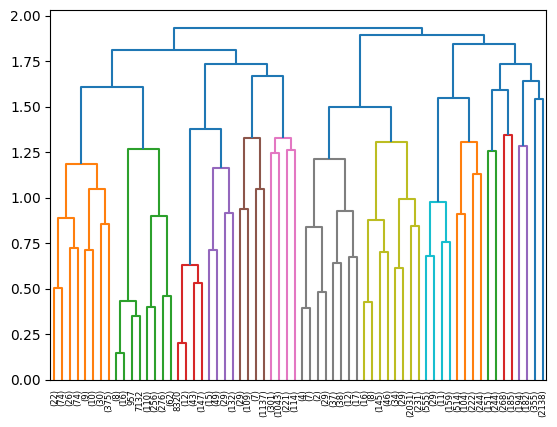

metric: correlation, method:complete, truncation_mode:level, level':15, k:5, silhouette: 0.2786875322254602 , DBscore:1.3006680212630362


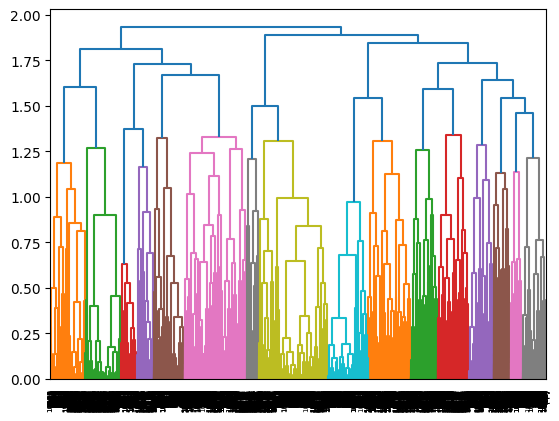

metric: correlation, method:complete, truncation_mode:level, level':15, k:10, silhouette: 0.2257365846529886 , DBscore:1.7775327640390461


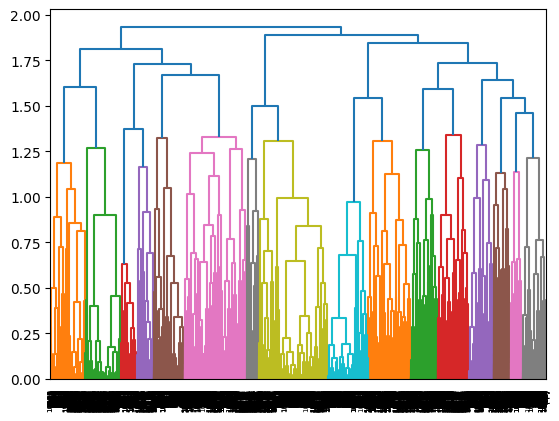

metric: correlation, method:single, truncation_mode:None, level':2, k:5, silhouette: -0.049592848889287305 , DBscore:1.049356040523684


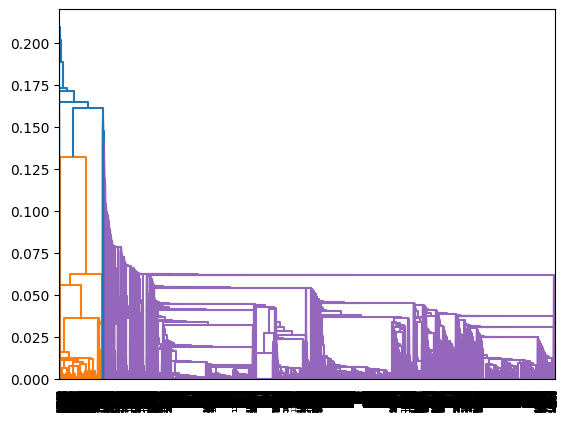

metric: correlation, method:single, truncation_mode:None, level':2, k:10, silhouette: -0.14191155849424014 , DBscore:1.0431001941153055


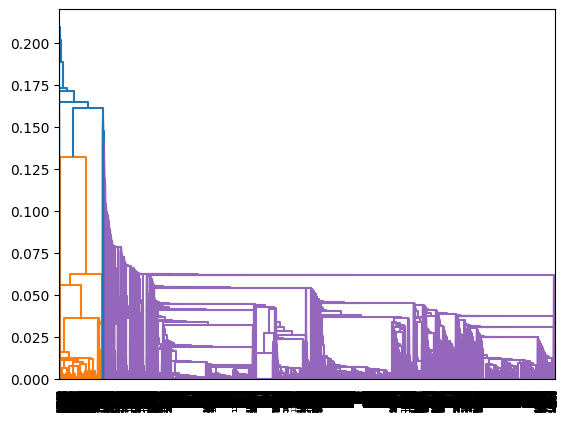

metric: correlation, method:single, truncation_mode:None, level':5, k:5, silhouette: -0.049592848889287305 , DBscore:1.049356040523684


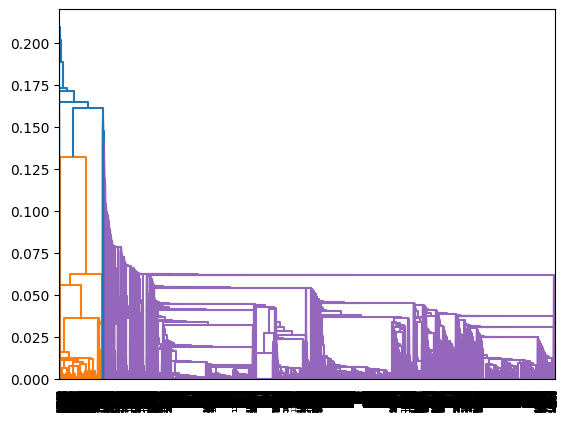

metric: correlation, method:single, truncation_mode:None, level':5, k:10, silhouette: -0.14191155849424014 , DBscore:1.0431001941153055


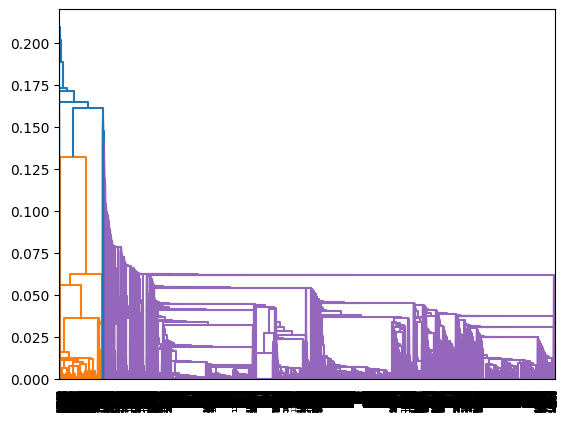

metric: correlation, method:single, truncation_mode:None, level':15, k:5, silhouette: -0.049592848889287305 , DBscore:1.049356040523684


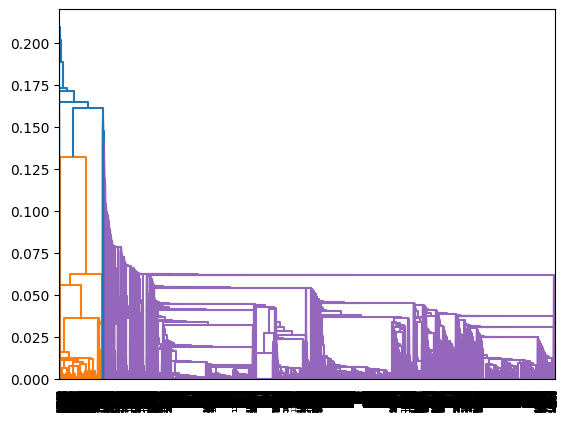

metric: correlation, method:single, truncation_mode:None, level':15, k:10, silhouette: -0.14191155849424014 , DBscore:1.0431001941153055


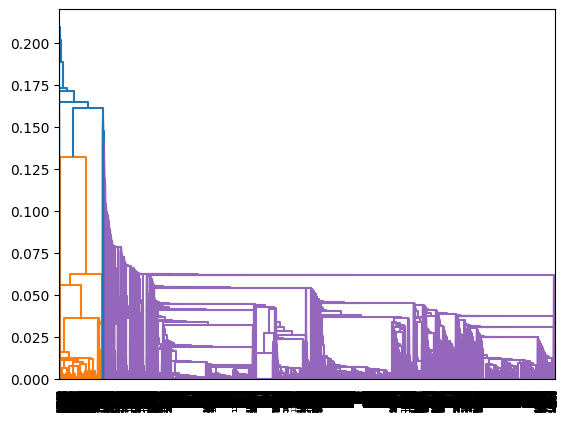

metric: correlation, method:single, truncation_mode:lastp, level':2, k:5, silhouette: -0.049592848889287305 , DBscore:1.049356040523684


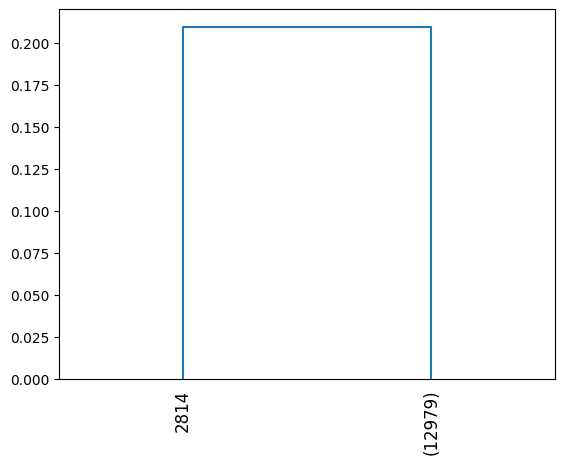

metric: correlation, method:single, truncation_mode:lastp, level':2, k:10, silhouette: -0.14191155849424014 , DBscore:1.0431001941153055


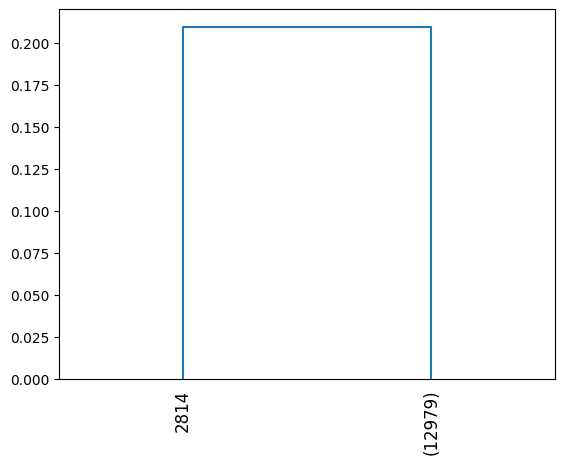

metric: correlation, method:single, truncation_mode:lastp, level':5, k:5, silhouette: -0.049592848889287305 , DBscore:1.049356040523684


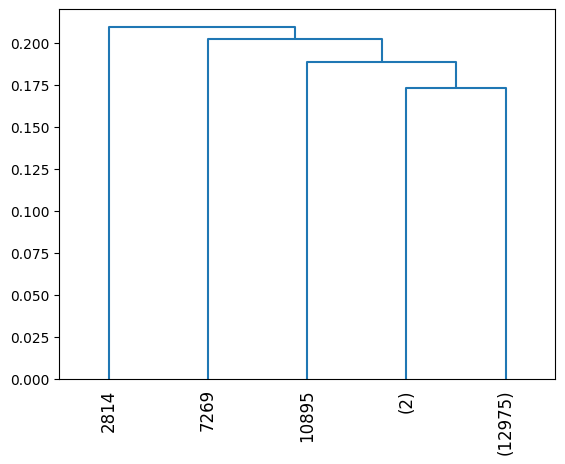

metric: correlation, method:single, truncation_mode:lastp, level':5, k:10, silhouette: -0.14191155849424014 , DBscore:1.0431001941153055


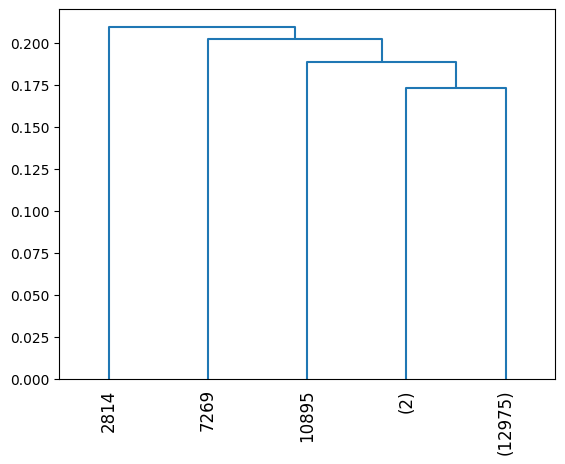

metric: correlation, method:single, truncation_mode:lastp, level':15, k:5, silhouette: -0.049592848889287305 , DBscore:1.049356040523684


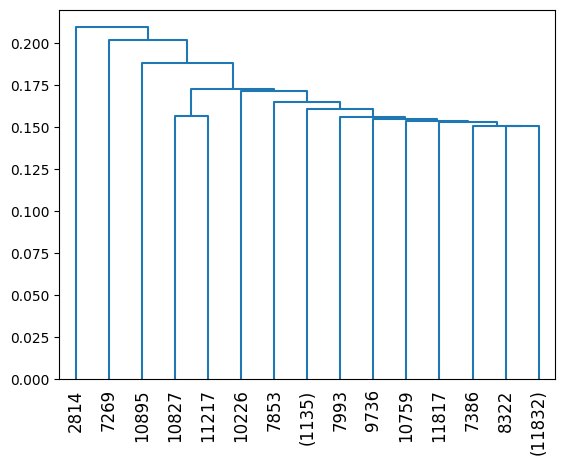

metric: correlation, method:single, truncation_mode:lastp, level':15, k:10, silhouette: -0.14191155849424014 , DBscore:1.0431001941153055


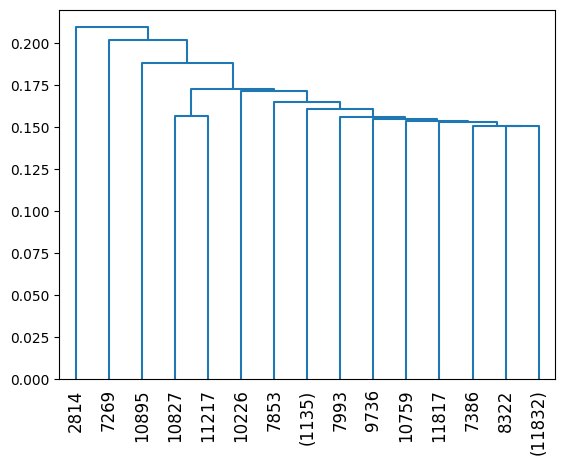

metric: correlation, method:single, truncation_mode:level, level':2, k:5, silhouette: -0.049592848889287305 , DBscore:1.049356040523684


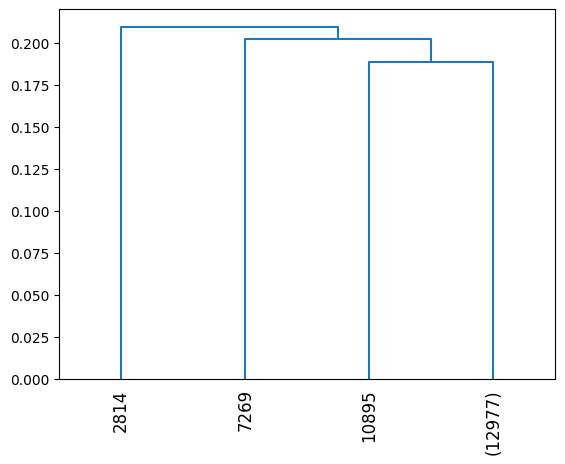

metric: correlation, method:single, truncation_mode:level, level':2, k:10, silhouette: -0.14191155849424014 , DBscore:1.0431001941153055


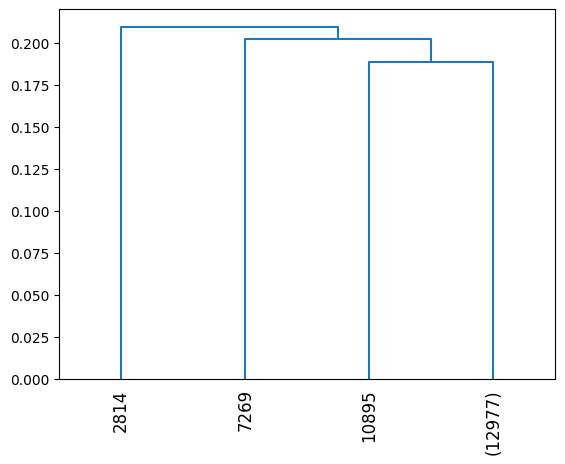

metric: correlation, method:single, truncation_mode:level, level':5, k:5, silhouette: -0.049592848889287305 , DBscore:1.049356040523684


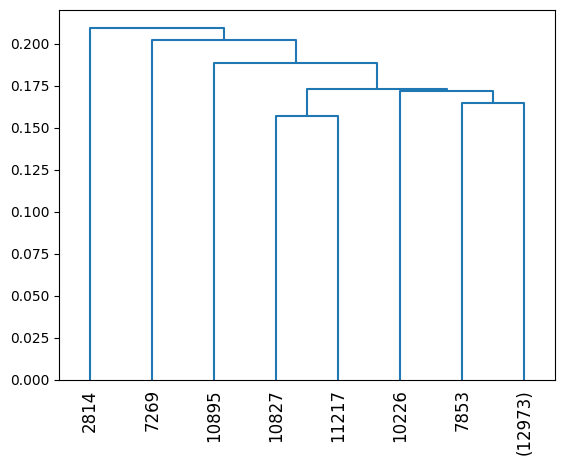

metric: correlation, method:single, truncation_mode:level, level':5, k:10, silhouette: -0.14191155849424014 , DBscore:1.0431001941153055


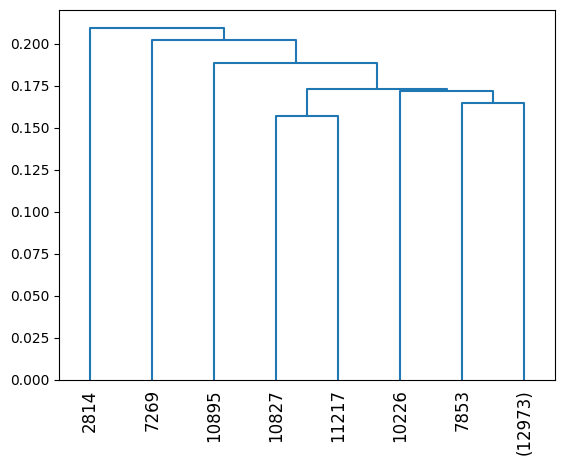

metric: correlation, method:single, truncation_mode:level, level':15, k:5, silhouette: -0.049592848889287305 , DBscore:1.049356040523684


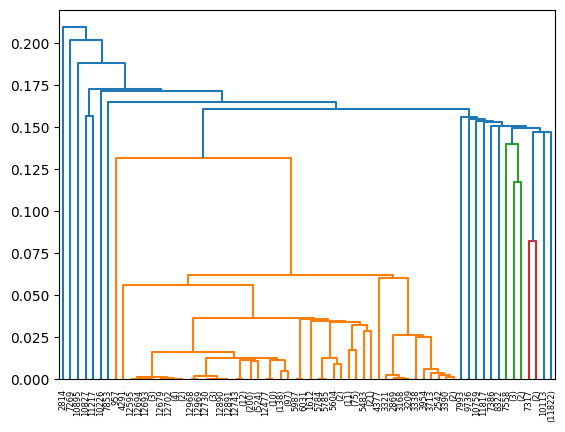

metric: correlation, method:single, truncation_mode:level, level':15, k:10, silhouette: -0.14191155849424014 , DBscore:1.0431001941153055


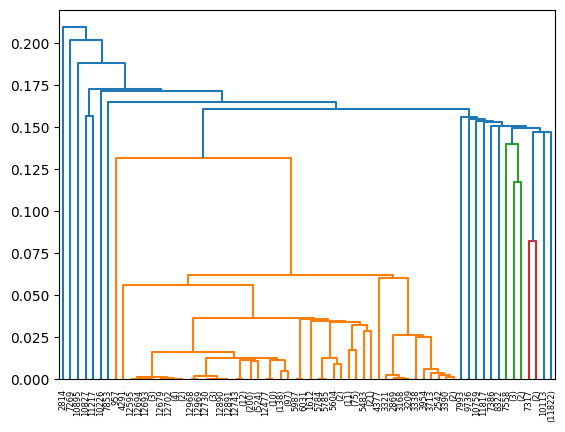

metric: correlation, method:average, truncation_mode:None, level':2, k:5, silhouette: 0.296252788433651 , DBscore:1.3836243151956125


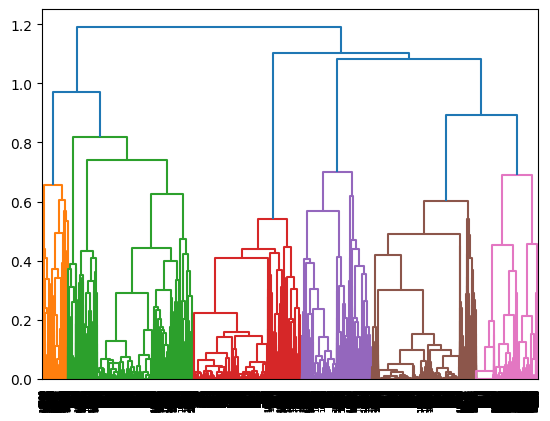

metric: correlation, method:average, truncation_mode:None, level':2, k:10, silhouette: 0.26327937139617386 , DBscore:1.3410905197231542


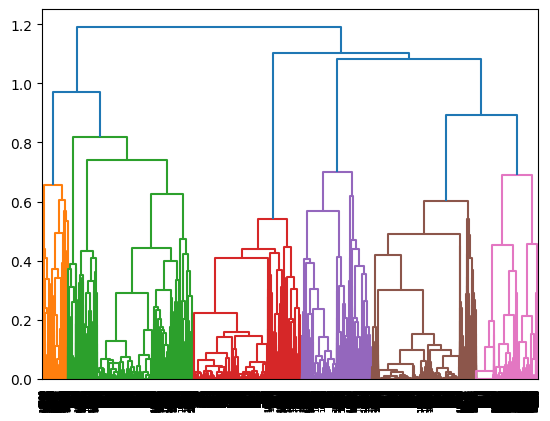

metric: correlation, method:average, truncation_mode:None, level':5, k:5, silhouette: 0.296252788433651 , DBscore:1.3836243151956125


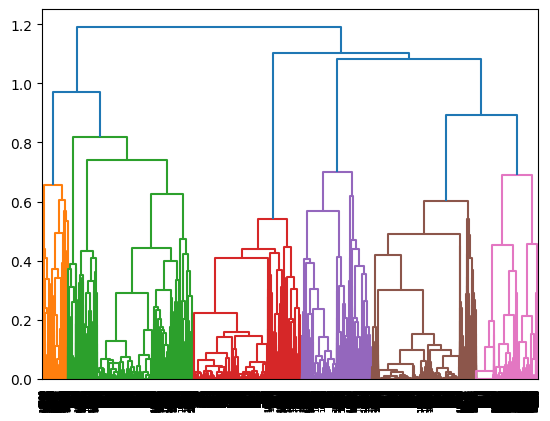

metric: correlation, method:average, truncation_mode:None, level':5, k:10, silhouette: 0.26327937139617386 , DBscore:1.3410905197231542


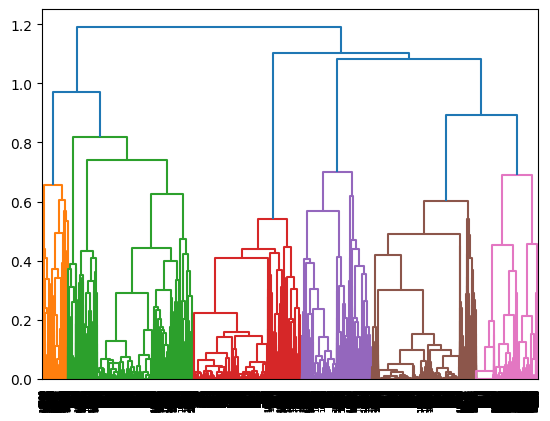

metric: correlation, method:average, truncation_mode:None, level':15, k:5, silhouette: 0.296252788433651 , DBscore:1.3836243151956125


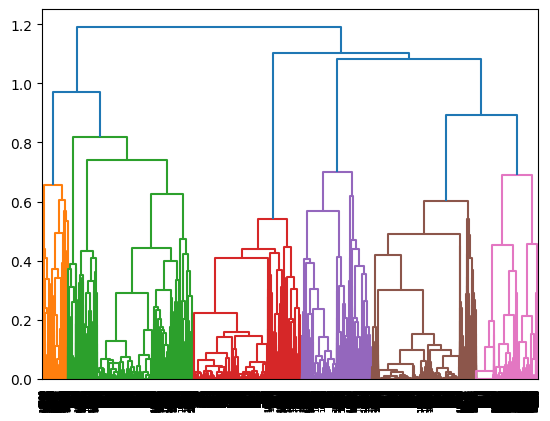

metric: correlation, method:average, truncation_mode:None, level':15, k:10, silhouette: 0.26327937139617386 , DBscore:1.3410905197231542


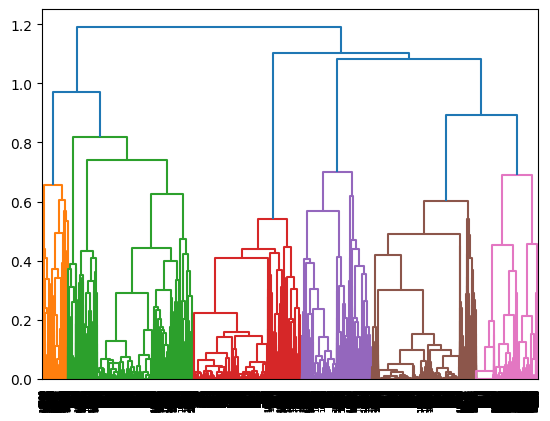

metric: correlation, method:average, truncation_mode:lastp, level':2, k:5, silhouette: 0.296252788433651 , DBscore:1.3836243151956125


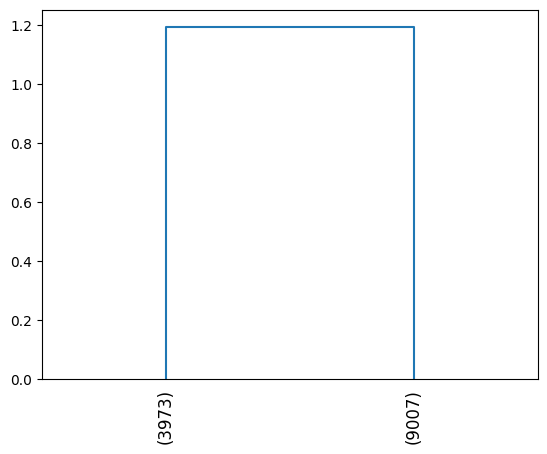

metric: correlation, method:average, truncation_mode:lastp, level':2, k:10, silhouette: 0.26327937139617386 , DBscore:1.3410905197231542


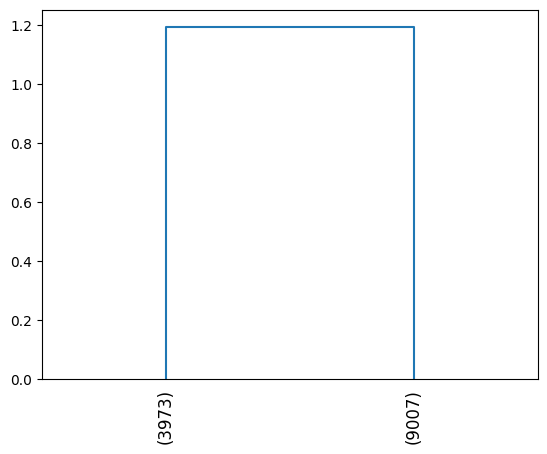

metric: correlation, method:average, truncation_mode:lastp, level':5, k:5, silhouette: 0.296252788433651 , DBscore:1.3836243151956125


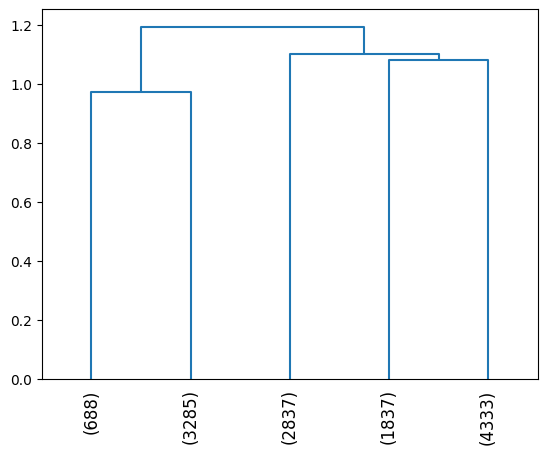

metric: correlation, method:average, truncation_mode:lastp, level':5, k:10, silhouette: 0.26327937139617386 , DBscore:1.3410905197231542


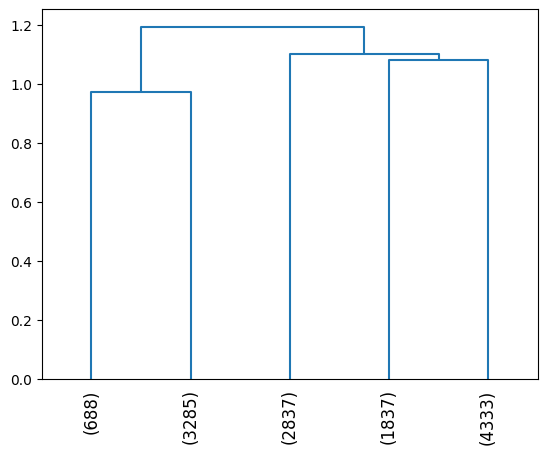

metric: correlation, method:average, truncation_mode:lastp, level':15, k:5, silhouette: 0.296252788433651 , DBscore:1.3836243151956125


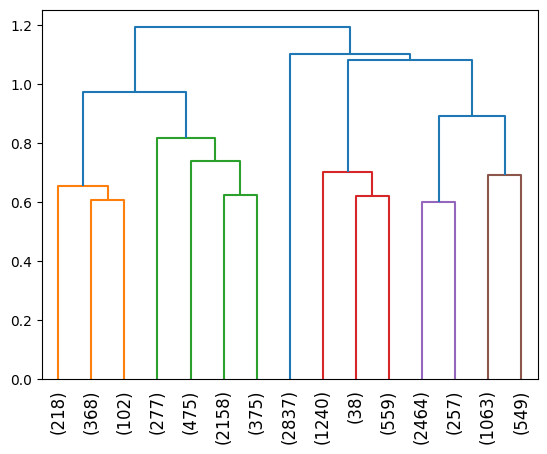

metric: correlation, method:average, truncation_mode:lastp, level':15, k:10, silhouette: 0.26327937139617386 , DBscore:1.3410905197231542


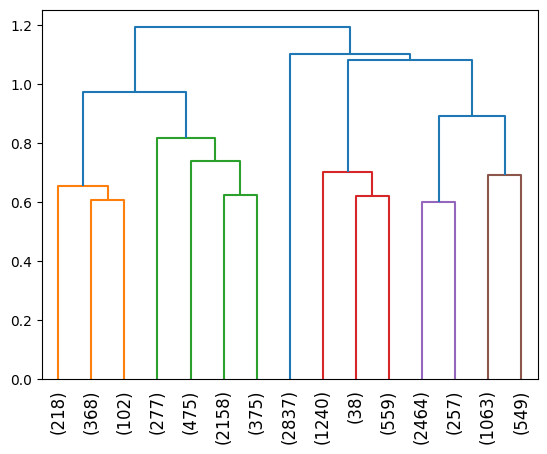

metric: correlation, method:average, truncation_mode:level, level':2, k:5, silhouette: 0.296252788433651 , DBscore:1.3836243151956125


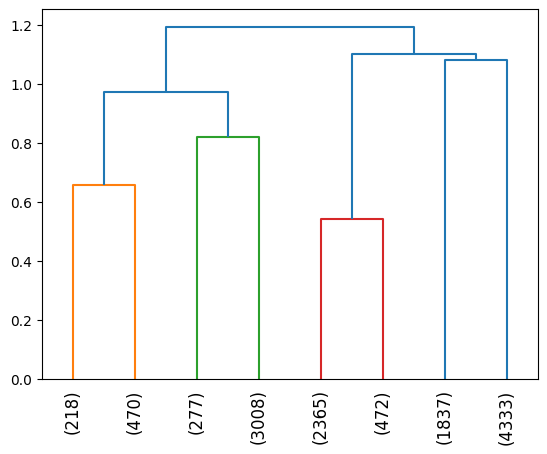

metric: correlation, method:average, truncation_mode:level, level':2, k:10, silhouette: 0.26327937139617386 , DBscore:1.3410905197231542


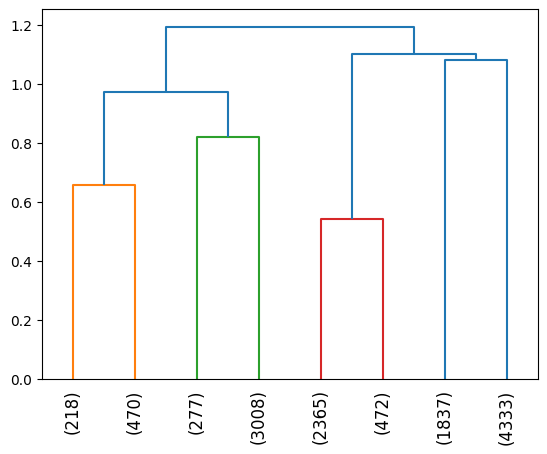

metric: correlation, method:average, truncation_mode:level, level':5, k:5, silhouette: 0.296252788433651 , DBscore:1.3836243151956125


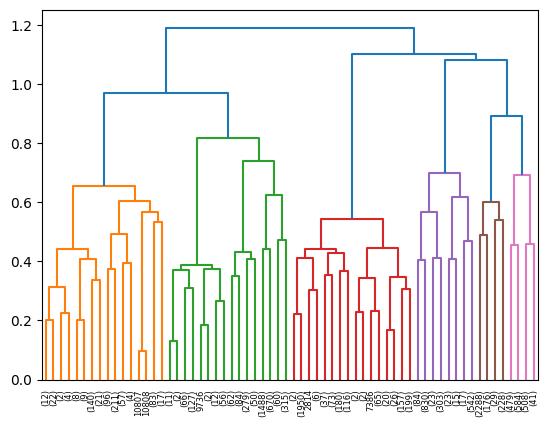

metric: correlation, method:average, truncation_mode:level, level':5, k:10, silhouette: 0.26327937139617386 , DBscore:1.3410905197231542


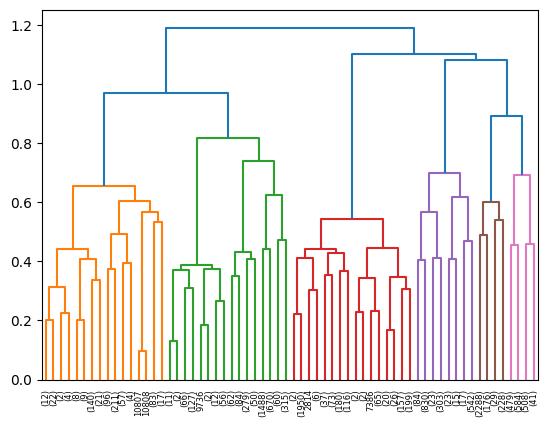

metric: correlation, method:average, truncation_mode:level, level':15, k:5, silhouette: 0.296252788433651 , DBscore:1.3836243151956125


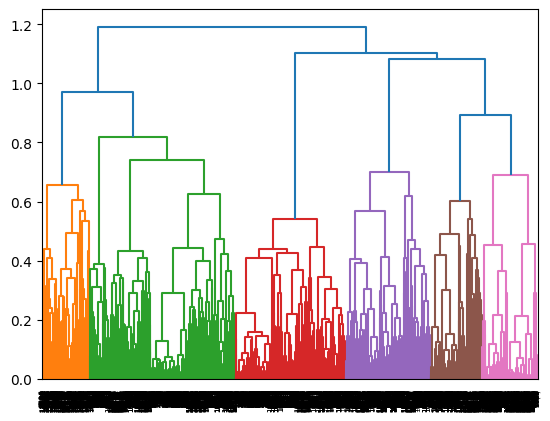

metric: correlation, method:average, truncation_mode:level, level':15, k:10, silhouette: 0.26327937139617386 , DBscore:1.3410905197231542


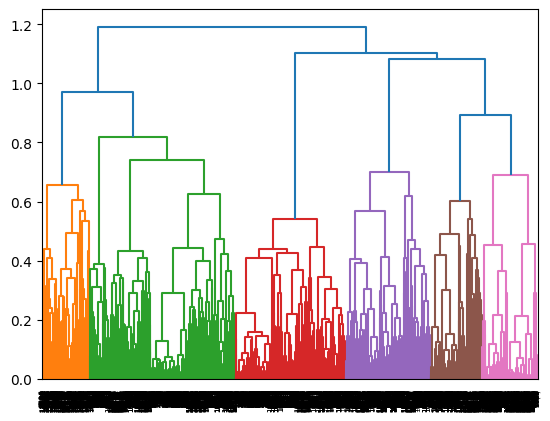

metric: correlation, method:weighted, truncation_mode:None, level':2, k:5, silhouette: 0.2589355057625014 , DBscore:1.4509696821004128


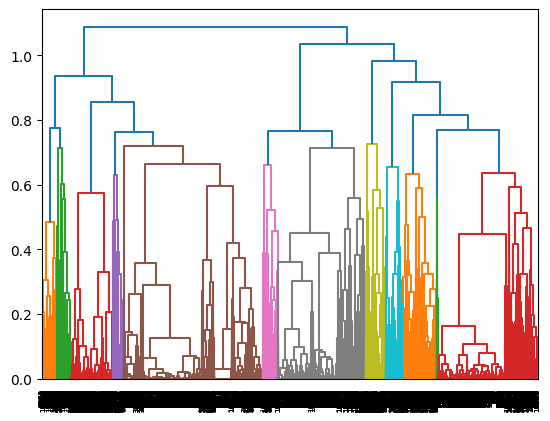

metric: correlation, method:weighted, truncation_mode:None, level':2, k:10, silhouette: 0.22064955120377627 , DBscore:1.467150600196305


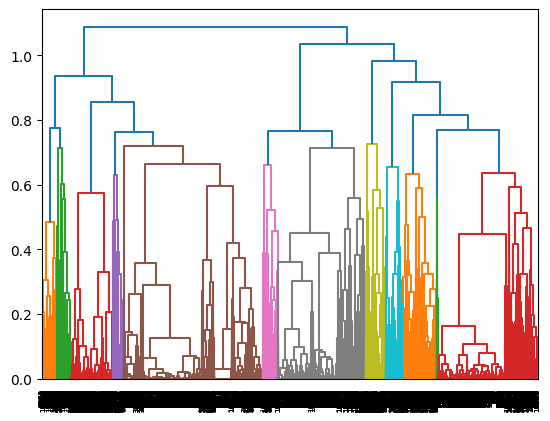

metric: correlation, method:weighted, truncation_mode:None, level':5, k:5, silhouette: 0.2589355057625014 , DBscore:1.4509696821004128


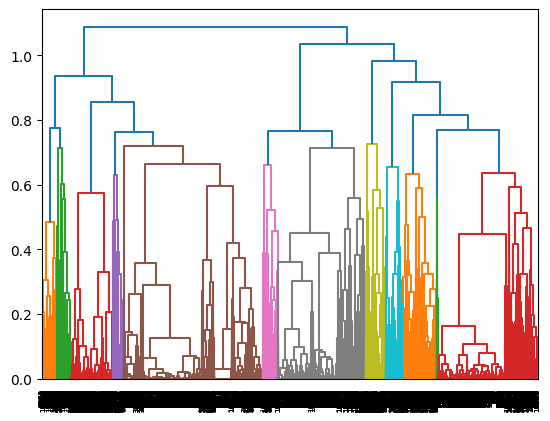

metric: correlation, method:weighted, truncation_mode:None, level':5, k:10, silhouette: 0.22064955120377627 , DBscore:1.467150600196305


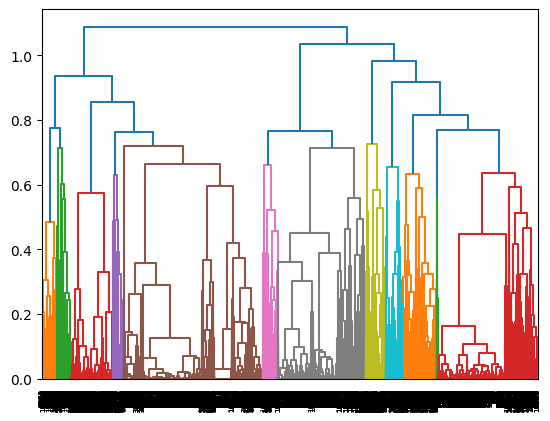

metric: correlation, method:weighted, truncation_mode:None, level':15, k:5, silhouette: 0.2589355057625014 , DBscore:1.4509696821004128


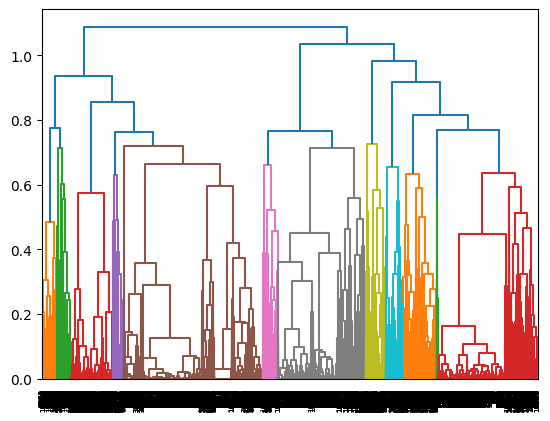

metric: correlation, method:weighted, truncation_mode:None, level':15, k:10, silhouette: 0.22064955120377627 , DBscore:1.467150600196305


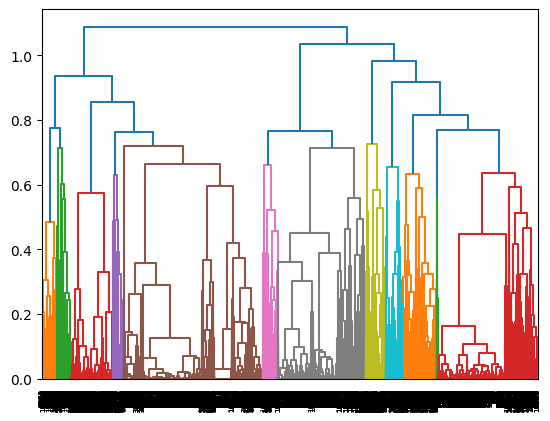

metric: correlation, method:weighted, truncation_mode:lastp, level':2, k:5, silhouette: 0.2589355057625014 , DBscore:1.4509696821004128


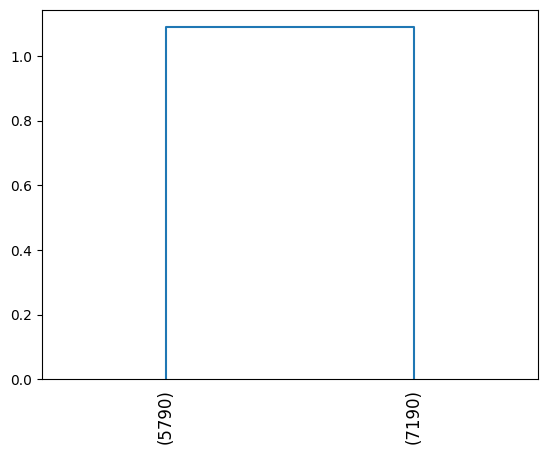

metric: correlation, method:weighted, truncation_mode:lastp, level':2, k:10, silhouette: 0.22064955120377627 , DBscore:1.467150600196305


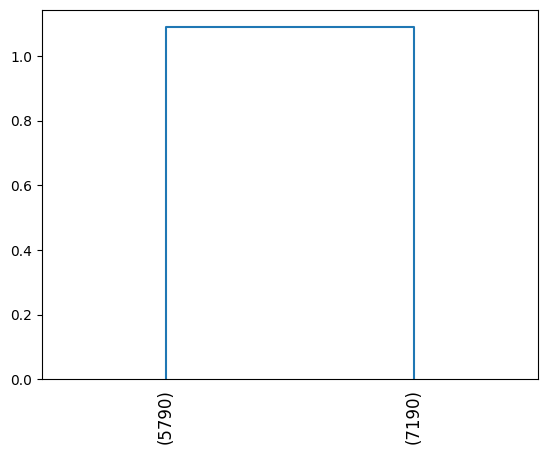

metric: correlation, method:weighted, truncation_mode:lastp, level':5, k:5, silhouette: 0.2589355057625014 , DBscore:1.4509696821004128


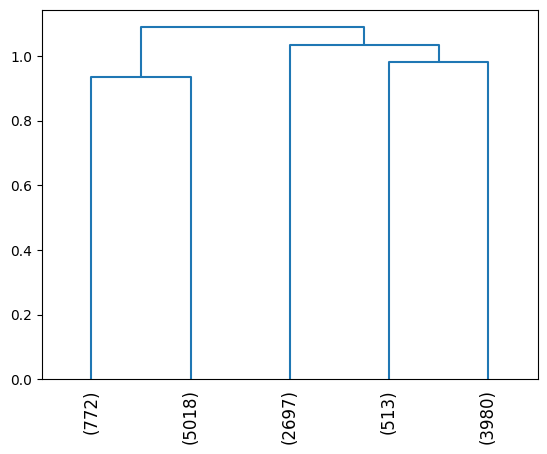

metric: correlation, method:weighted, truncation_mode:lastp, level':5, k:10, silhouette: 0.22064955120377627 , DBscore:1.467150600196305


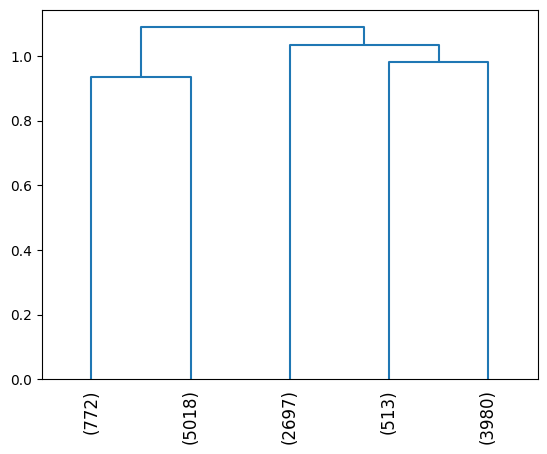

metric: correlation, method:weighted, truncation_mode:lastp, level':15, k:5, silhouette: 0.2589355057625014 , DBscore:1.4509696821004128


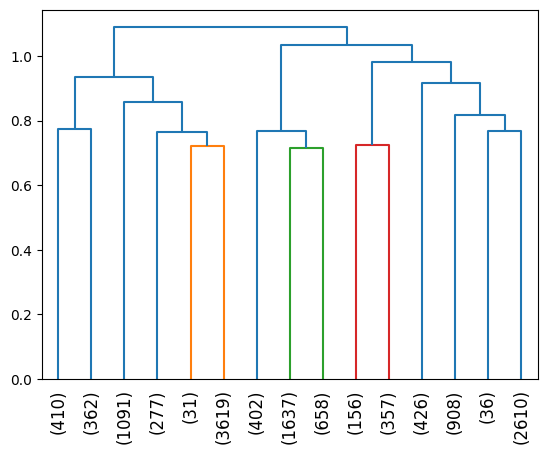

metric: correlation, method:weighted, truncation_mode:lastp, level':15, k:10, silhouette: 0.22064955120377627 , DBscore:1.467150600196305


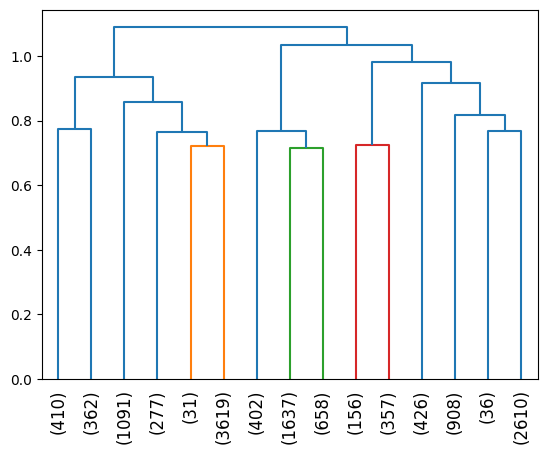

metric: correlation, method:weighted, truncation_mode:level, level':2, k:5, silhouette: 0.2589355057625014 , DBscore:1.4509696821004128


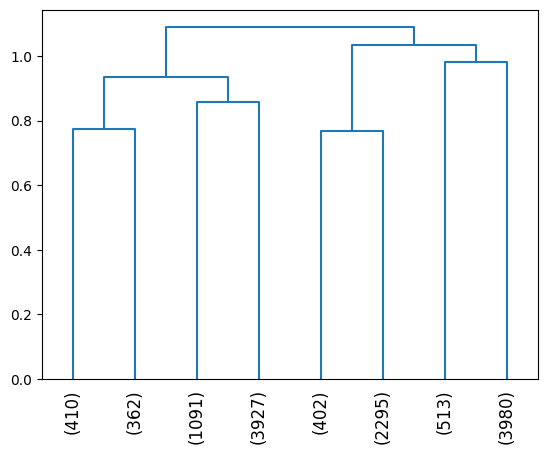

metric: correlation, method:weighted, truncation_mode:level, level':2, k:10, silhouette: 0.22064955120377627 , DBscore:1.467150600196305


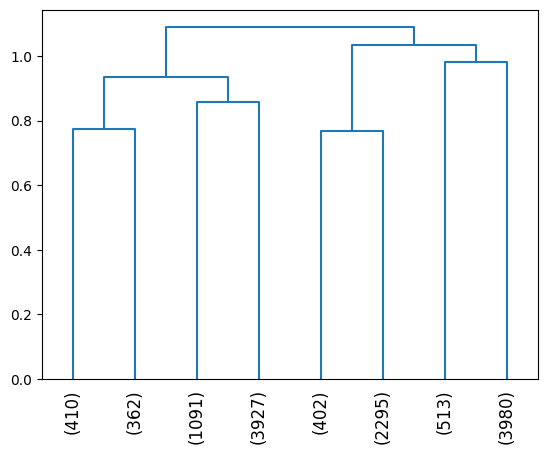

metric: correlation, method:weighted, truncation_mode:level, level':5, k:5, silhouette: 0.2589355057625014 , DBscore:1.4509696821004128


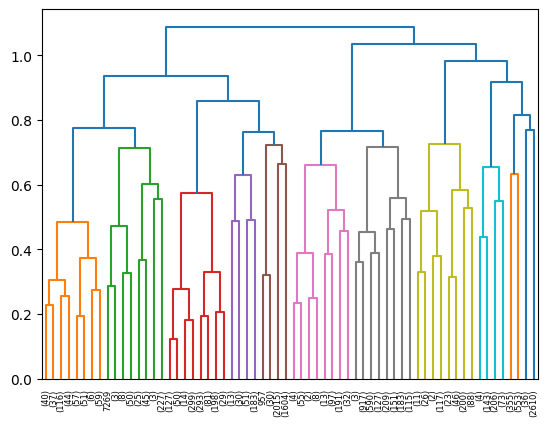

metric: correlation, method:weighted, truncation_mode:level, level':5, k:10, silhouette: 0.22064955120377627 , DBscore:1.467150600196305


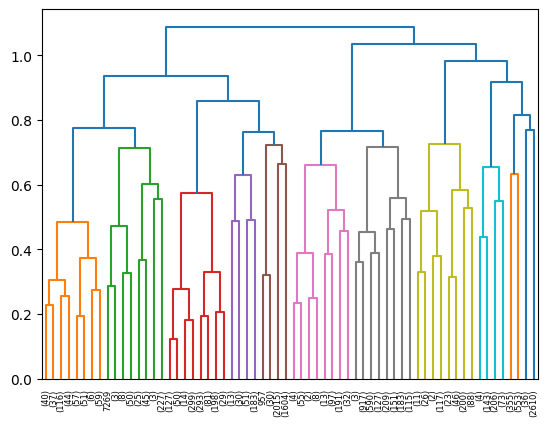

metric: correlation, method:weighted, truncation_mode:level, level':15, k:5, silhouette: 0.2589355057625014 , DBscore:1.4509696821004128


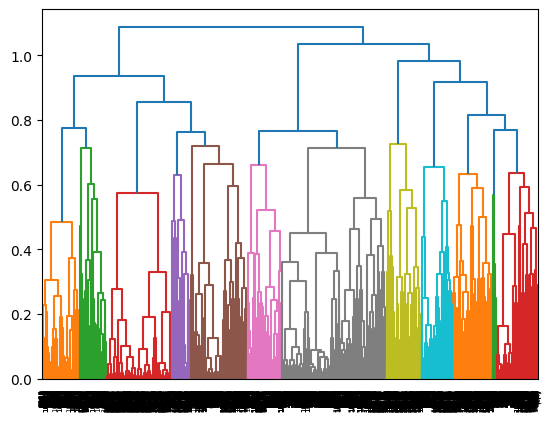

metric: correlation, method:weighted, truncation_mode:level, level':15, k:10, silhouette: 0.22064955120377627 , DBscore:1.467150600196305


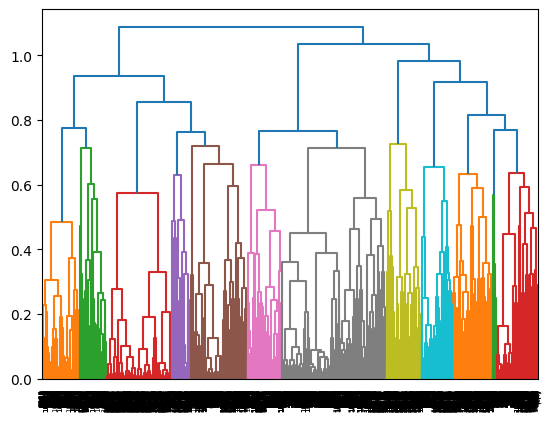

metric: cosine, method:complete, truncation_mode:None, level':2, k:5, silhouette: 0.2355831776076553 , DBscore:1.4969265879575846


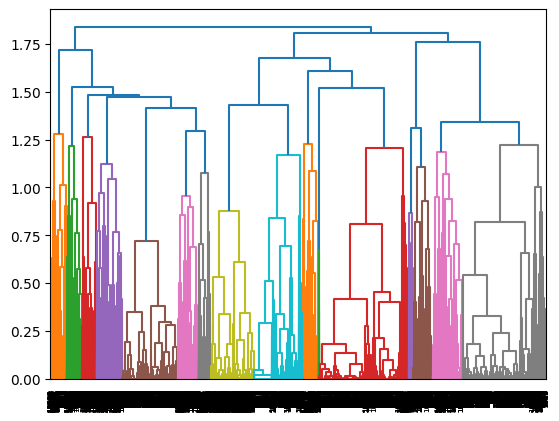

metric: cosine, method:complete, truncation_mode:None, level':2, k:10, silhouette: 0.2299365438988861 , DBscore:1.6369420669344144


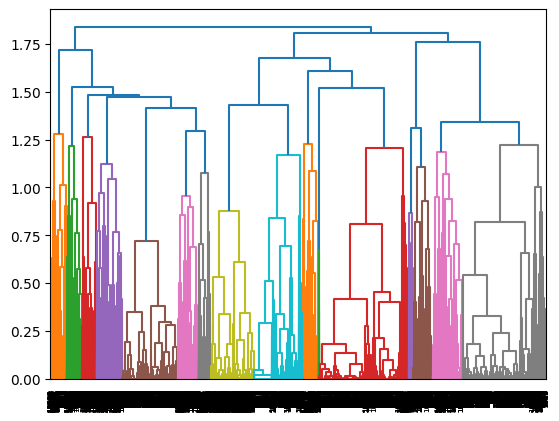

metric: cosine, method:complete, truncation_mode:None, level':5, k:5, silhouette: 0.2355831776076553 , DBscore:1.4969265879575846


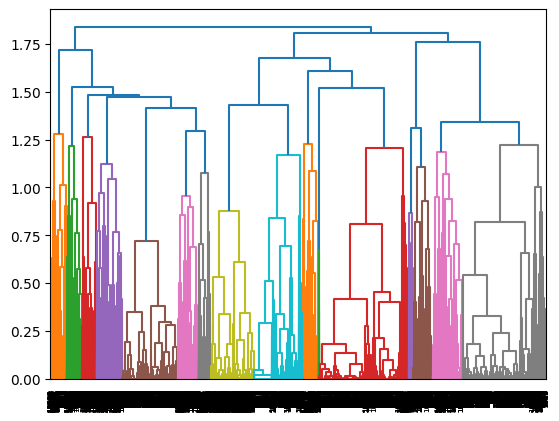

metric: cosine, method:complete, truncation_mode:None, level':5, k:10, silhouette: 0.2299365438988861 , DBscore:1.6369420669344144


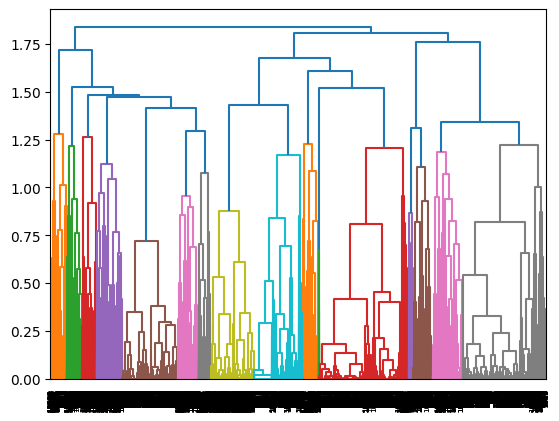

metric: cosine, method:complete, truncation_mode:None, level':15, k:5, silhouette: 0.2355831776076553 , DBscore:1.4969265879575846


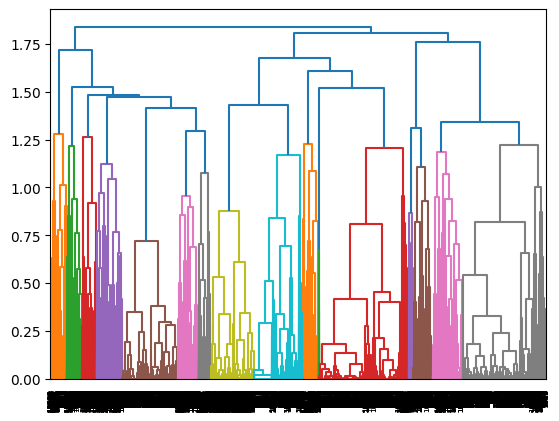

metric: cosine, method:complete, truncation_mode:None, level':15, k:10, silhouette: 0.2299365438988861 , DBscore:1.6369420669344144


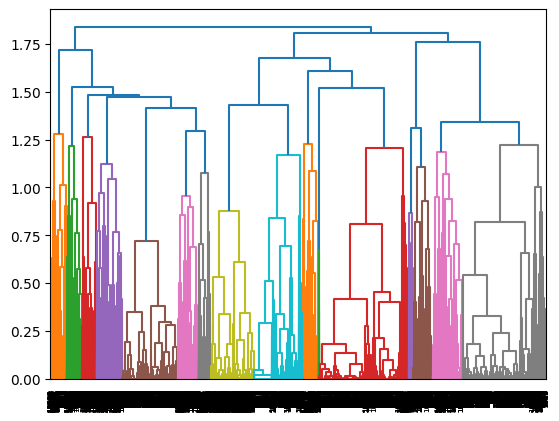

metric: cosine, method:complete, truncation_mode:lastp, level':2, k:5, silhouette: 0.2355831776076553 , DBscore:1.4969265879575846


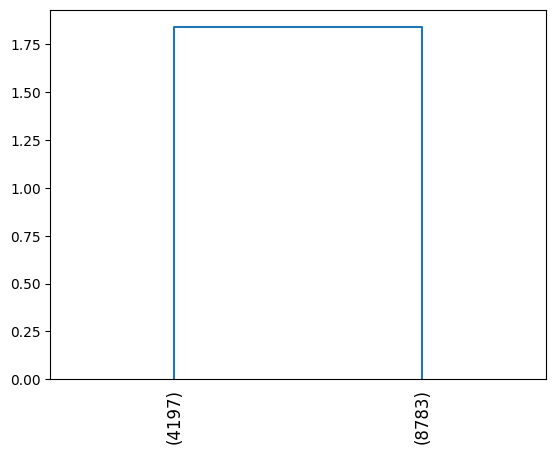

metric: cosine, method:complete, truncation_mode:lastp, level':2, k:10, silhouette: 0.2299365438988861 , DBscore:1.6369420669344144


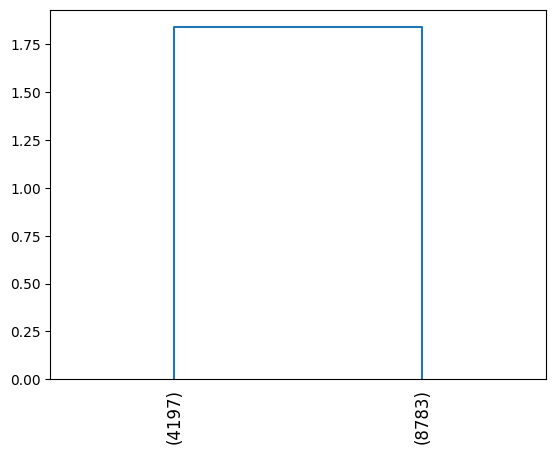

metric: cosine, method:complete, truncation_mode:lastp, level':5, k:5, silhouette: 0.2355831776076553 , DBscore:1.4969265879575846


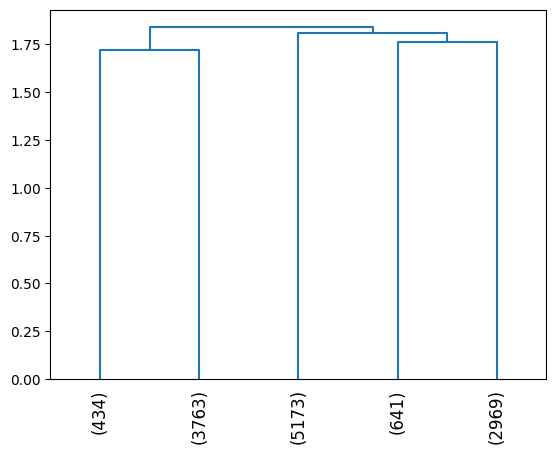

metric: cosine, method:complete, truncation_mode:lastp, level':5, k:10, silhouette: 0.2299365438988861 , DBscore:1.6369420669344144


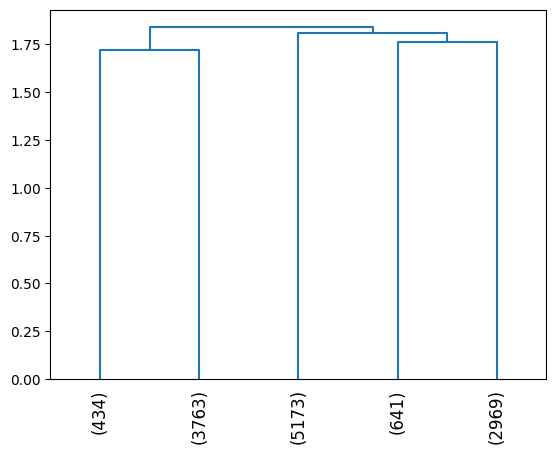

metric: cosine, method:complete, truncation_mode:lastp, level':15, k:5, silhouette: 0.2355831776076553 , DBscore:1.4969265879575846


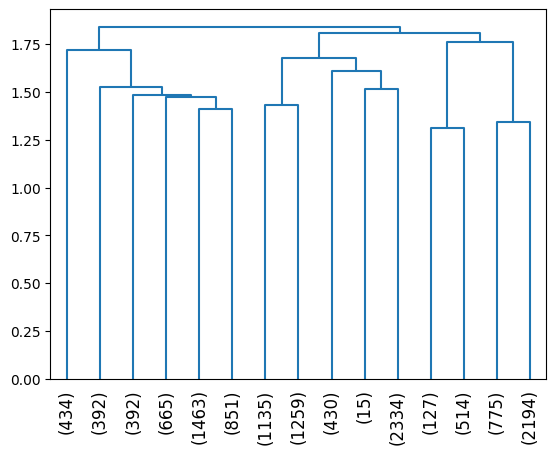

metric: cosine, method:complete, truncation_mode:lastp, level':15, k:10, silhouette: 0.2299365438988861 , DBscore:1.6369420669344144


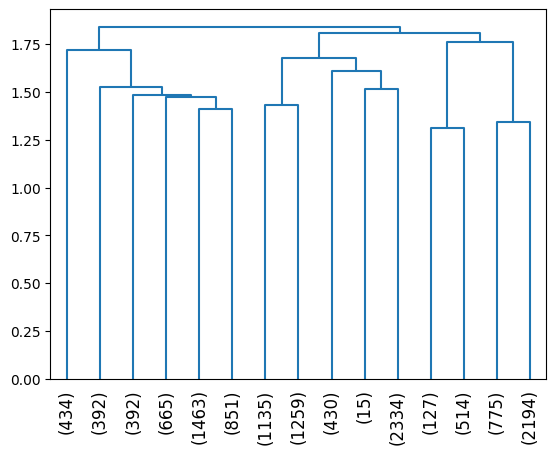

metric: cosine, method:complete, truncation_mode:level, level':2, k:5, silhouette: 0.2355831776076553 , DBscore:1.4969265879575846


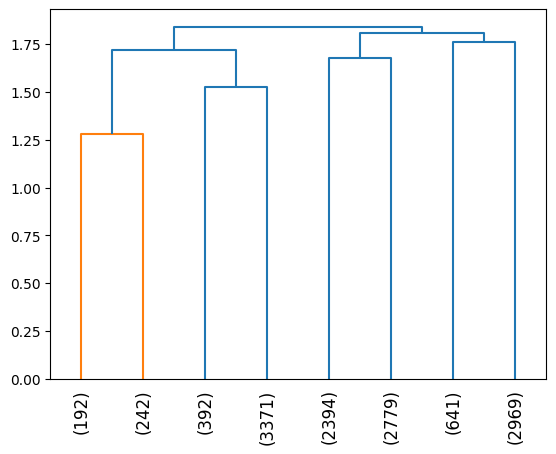

metric: cosine, method:complete, truncation_mode:level, level':2, k:10, silhouette: 0.2299365438988861 , DBscore:1.6369420669344144


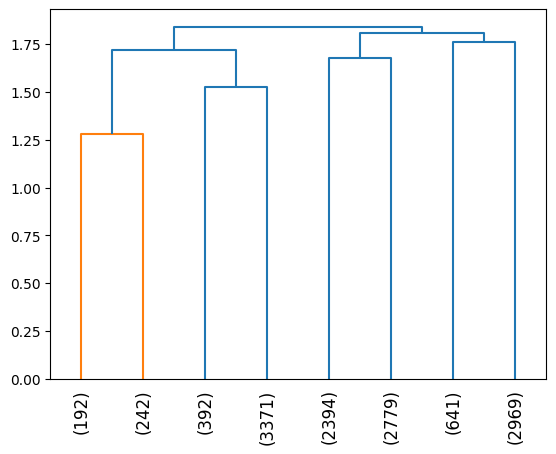

metric: cosine, method:complete, truncation_mode:level, level':5, k:5, silhouette: 0.2355831776076553 , DBscore:1.4969265879575846


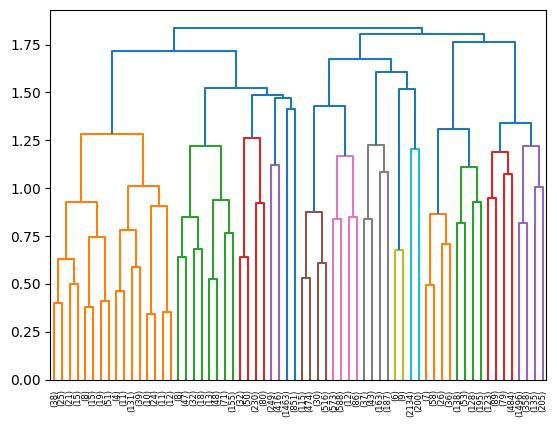

metric: cosine, method:complete, truncation_mode:level, level':5, k:10, silhouette: 0.2299365438988861 , DBscore:1.6369420669344144


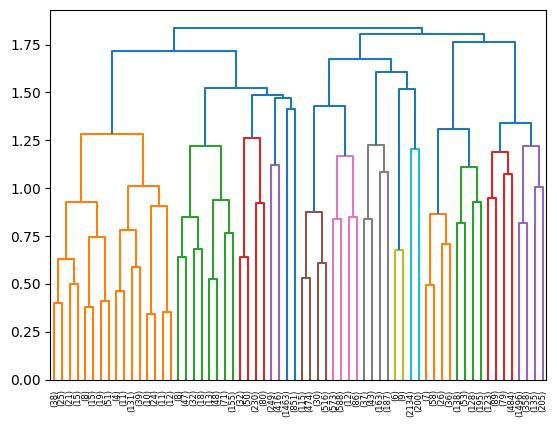

metric: cosine, method:complete, truncation_mode:level, level':15, k:5, silhouette: 0.2355831776076553 , DBscore:1.4969265879575846


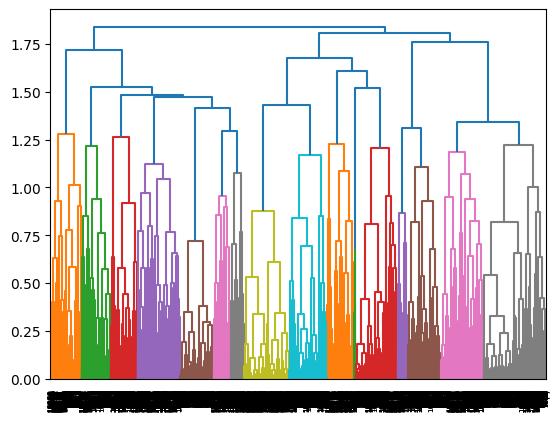

metric: cosine, method:complete, truncation_mode:level, level':15, k:10, silhouette: 0.2299365438988861 , DBscore:1.6369420669344144


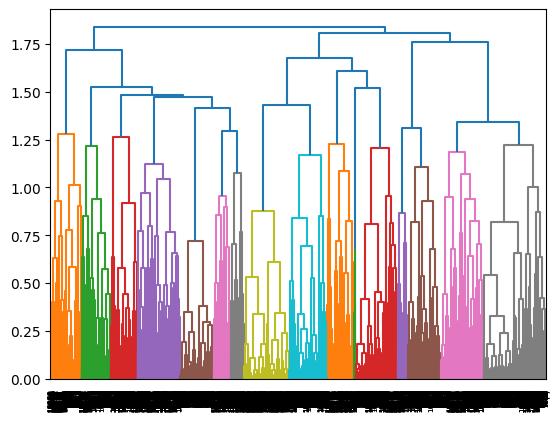

metric: cosine, method:single, truncation_mode:None, level':2, k:5, silhouette: -0.0954200509565859 , DBscore:1.2815686077568305


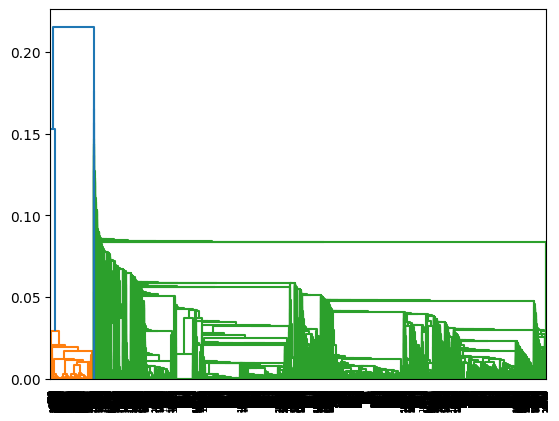

metric: cosine, method:single, truncation_mode:None, level':2, k:10, silhouette: -0.1879862282771113 , DBscore:1.1709667525342695


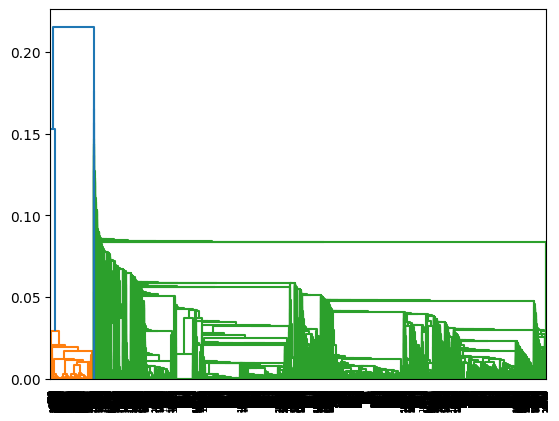

metric: cosine, method:single, truncation_mode:None, level':5, k:5, silhouette: -0.0954200509565859 , DBscore:1.2815686077568305


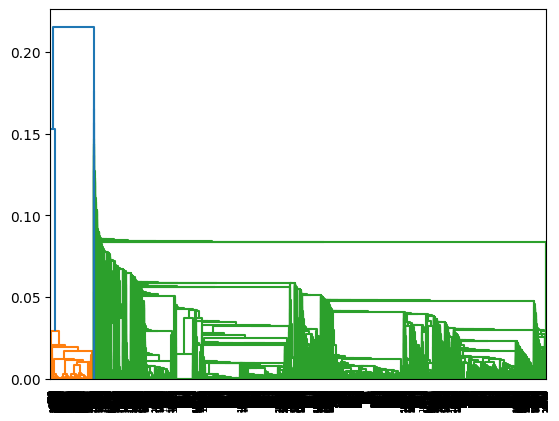

metric: cosine, method:single, truncation_mode:None, level':5, k:10, silhouette: -0.1879862282771113 , DBscore:1.1709667525342695


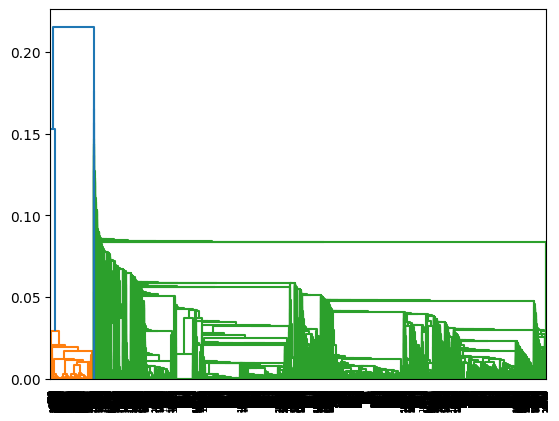

metric: cosine, method:single, truncation_mode:None, level':15, k:5, silhouette: -0.0954200509565859 , DBscore:1.2815686077568305


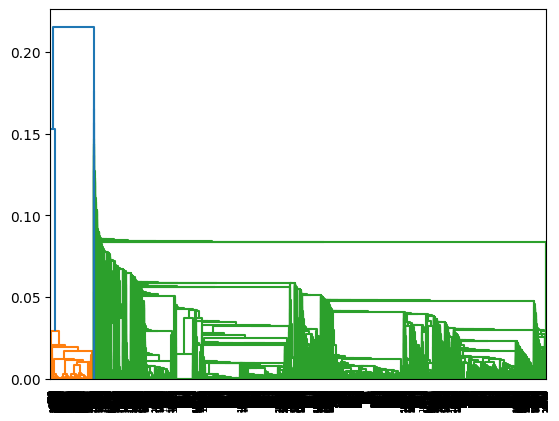

metric: cosine, method:single, truncation_mode:None, level':15, k:10, silhouette: -0.1879862282771113 , DBscore:1.1709667525342695


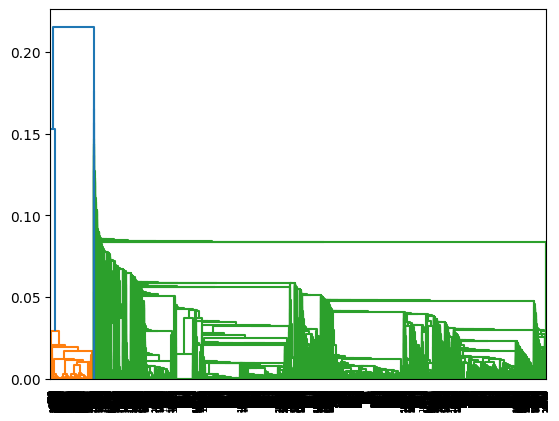

metric: cosine, method:single, truncation_mode:lastp, level':2, k:5, silhouette: -0.0954200509565859 , DBscore:1.2815686077568305


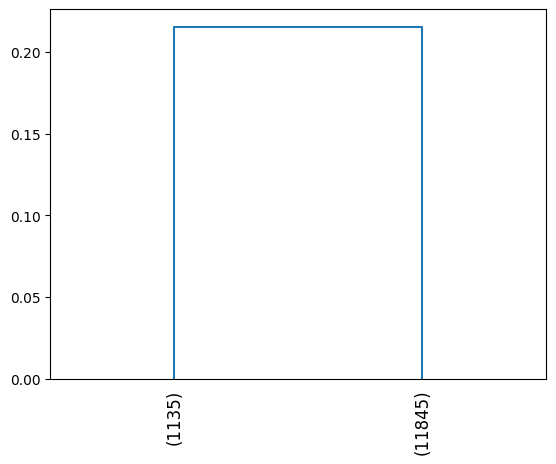

metric: cosine, method:single, truncation_mode:lastp, level':2, k:10, silhouette: -0.1879862282771113 , DBscore:1.1709667525342695


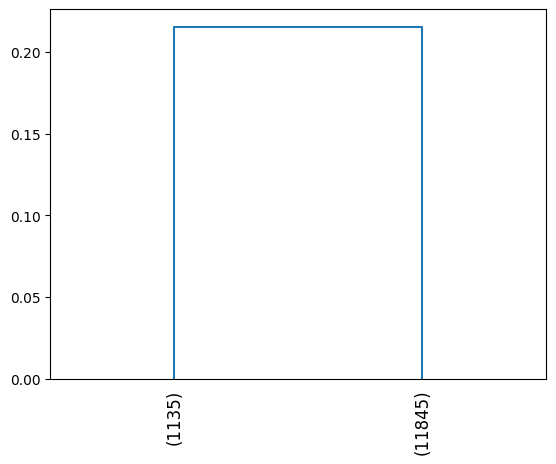

metric: cosine, method:single, truncation_mode:lastp, level':5, k:5, silhouette: -0.0954200509565859 , DBscore:1.2815686077568305


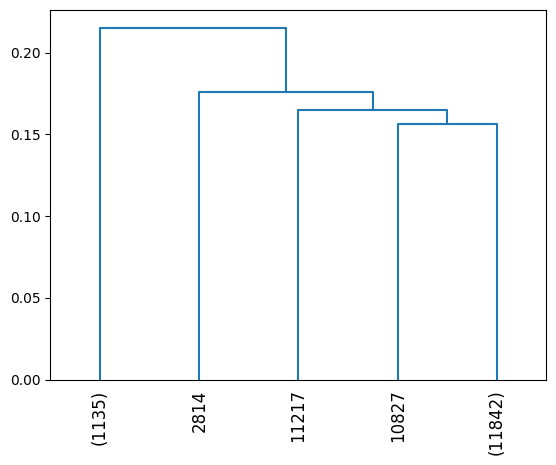

metric: cosine, method:single, truncation_mode:lastp, level':5, k:10, silhouette: -0.1879862282771113 , DBscore:1.1709667525342695


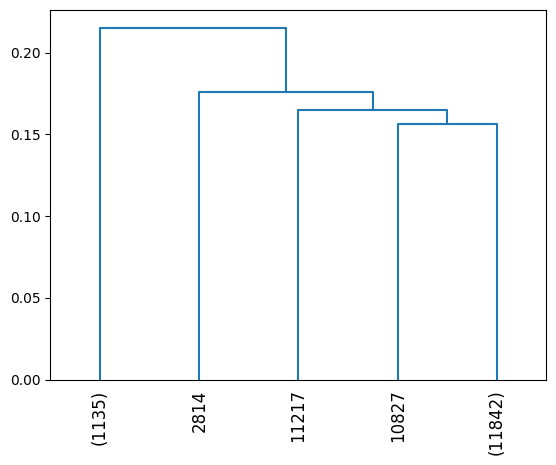

metric: cosine, method:single, truncation_mode:lastp, level':15, k:5, silhouette: -0.0954200509565859 , DBscore:1.2815686077568305


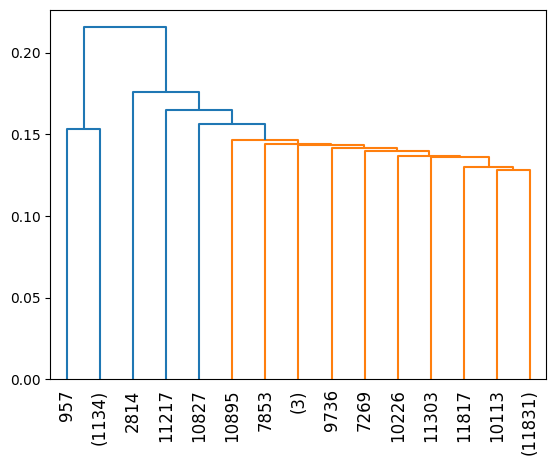

metric: cosine, method:single, truncation_mode:lastp, level':15, k:10, silhouette: -0.1879862282771113 , DBscore:1.1709667525342695


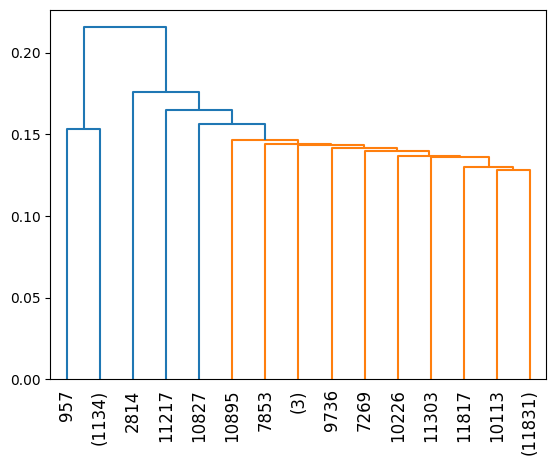

metric: cosine, method:single, truncation_mode:level, level':2, k:5, silhouette: -0.0954200509565859 , DBscore:1.2815686077568305


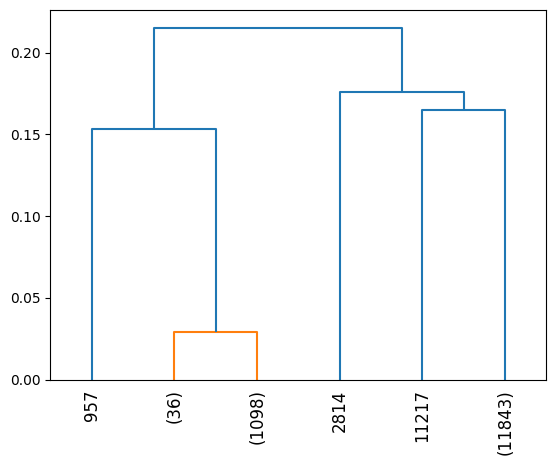

metric: cosine, method:single, truncation_mode:level, level':2, k:10, silhouette: -0.1879862282771113 , DBscore:1.1709667525342695


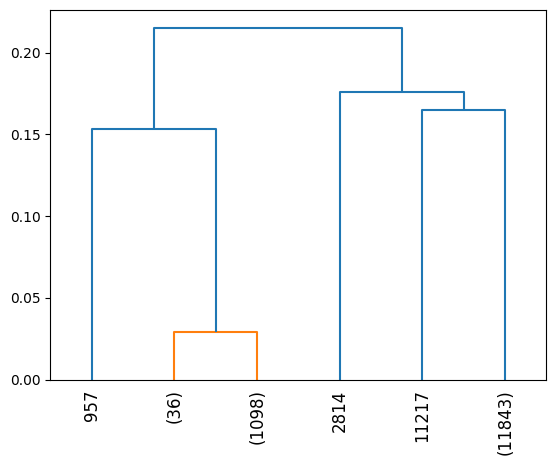

metric: cosine, method:single, truncation_mode:level, level':5, k:5, silhouette: -0.0954200509565859 , DBscore:1.2815686077568305


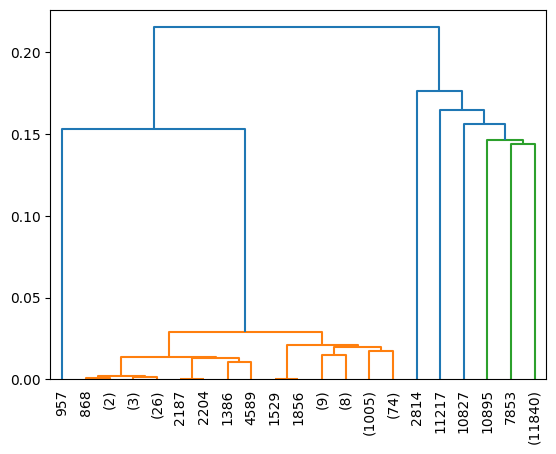

metric: cosine, method:single, truncation_mode:level, level':5, k:10, silhouette: -0.1879862282771113 , DBscore:1.1709667525342695


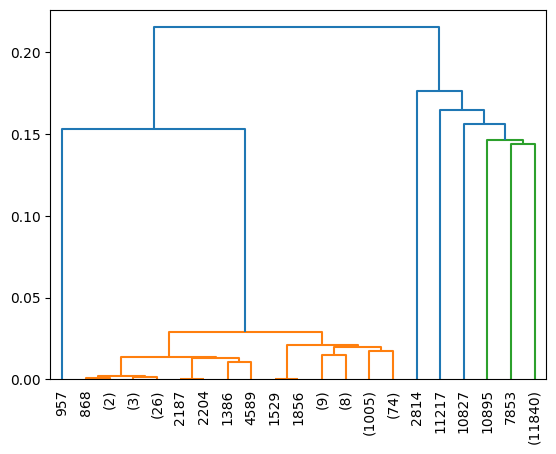

metric: cosine, method:single, truncation_mode:level, level':15, k:5, silhouette: -0.0954200509565859 , DBscore:1.2815686077568305


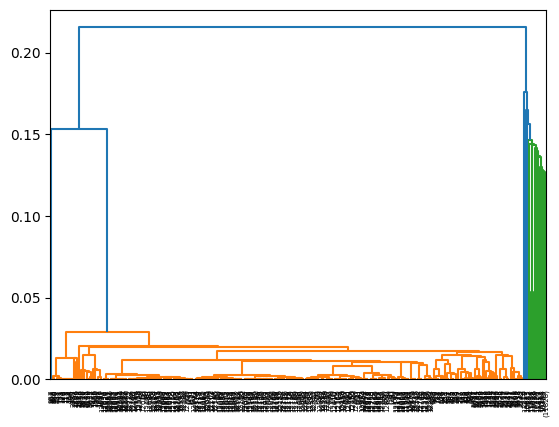

metric: cosine, method:single, truncation_mode:level, level':15, k:10, silhouette: -0.1879862282771113 , DBscore:1.1709667525342695


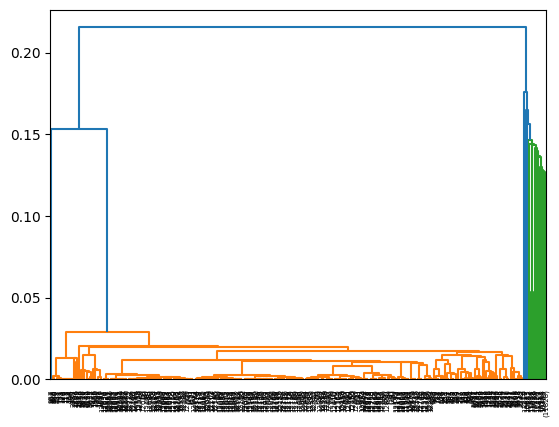

metric: cosine, method:average, truncation_mode:None, level':2, k:5, silhouette: 0.29424723290692256 , DBscore:1.3227296883835122


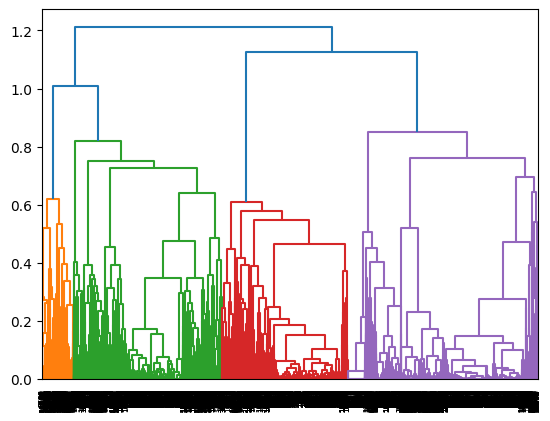

metric: cosine, method:average, truncation_mode:None, level':2, k:10, silhouette: 0.3109387972325357 , DBscore:1.2849800533681264


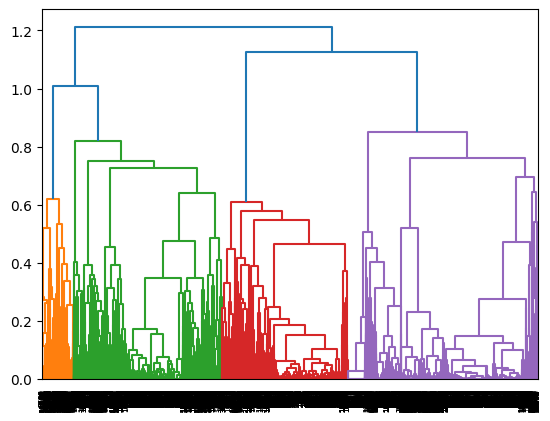

metric: cosine, method:average, truncation_mode:None, level':5, k:5, silhouette: 0.29424723290692256 , DBscore:1.3227296883835122


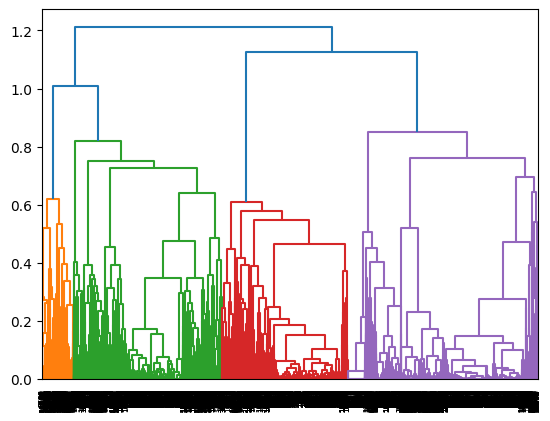

metric: cosine, method:average, truncation_mode:None, level':5, k:10, silhouette: 0.3109387972325357 , DBscore:1.2849800533681264


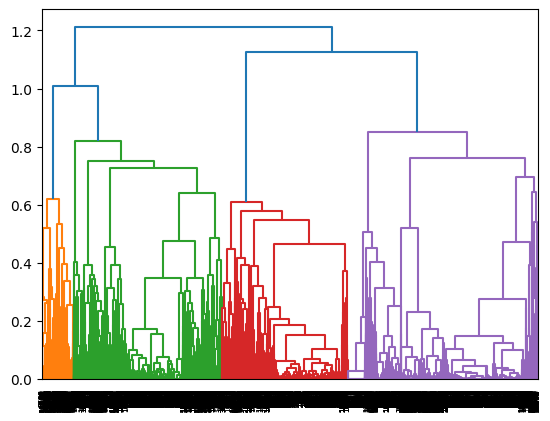

metric: cosine, method:average, truncation_mode:None, level':15, k:5, silhouette: 0.29424723290692256 , DBscore:1.3227296883835122


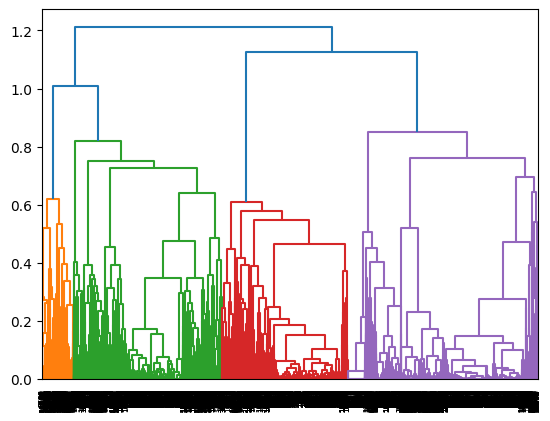

metric: cosine, method:average, truncation_mode:None, level':15, k:10, silhouette: 0.3109387972325357 , DBscore:1.2849800533681264


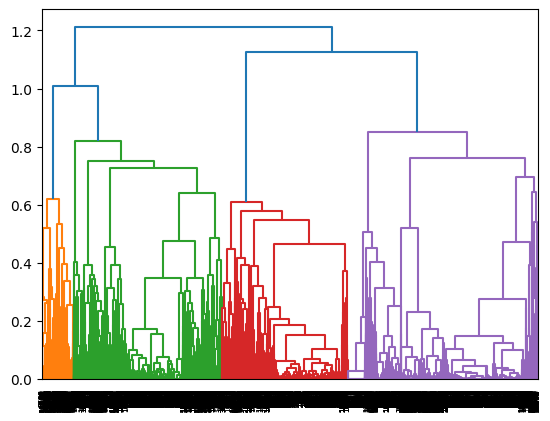

metric: cosine, method:average, truncation_mode:lastp, level':2, k:5, silhouette: 0.29424723290692256 , DBscore:1.3227296883835122


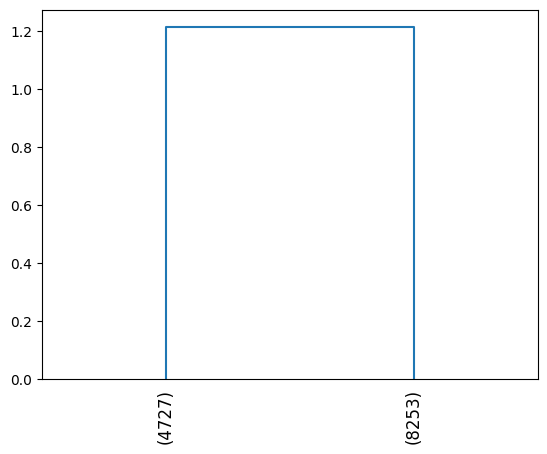

metric: cosine, method:average, truncation_mode:lastp, level':2, k:10, silhouette: 0.3109387972325357 , DBscore:1.2849800533681264


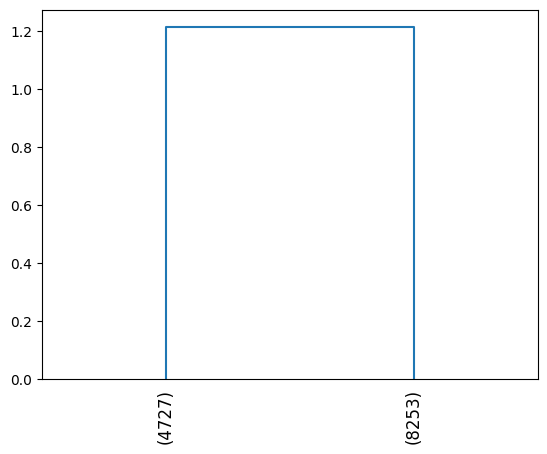

metric: cosine, method:average, truncation_mode:lastp, level':5, k:5, silhouette: 0.29424723290692256 , DBscore:1.3227296883835122


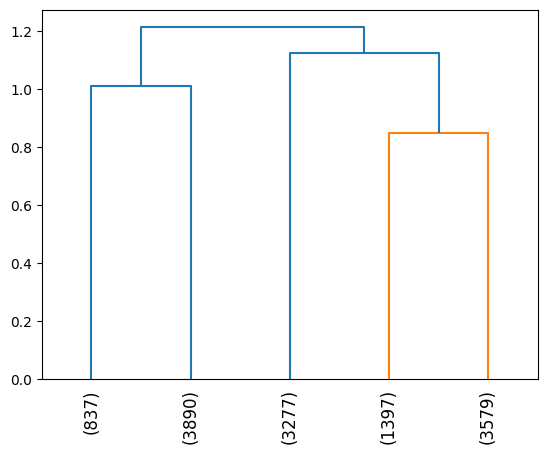

metric: cosine, method:average, truncation_mode:lastp, level':5, k:10, silhouette: 0.3109387972325357 , DBscore:1.2849800533681264


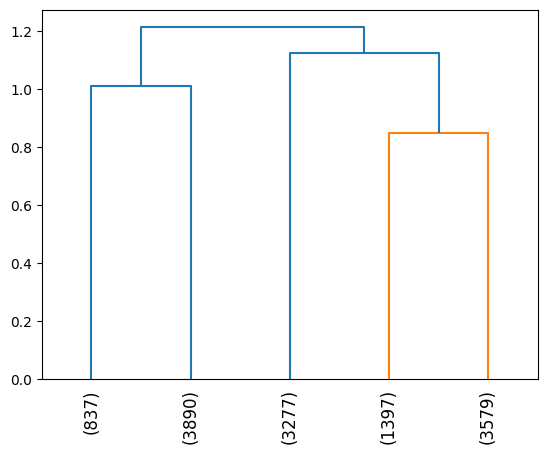

metric: cosine, method:average, truncation_mode:lastp, level':15, k:5, silhouette: 0.29424723290692256 , DBscore:1.3227296883835122


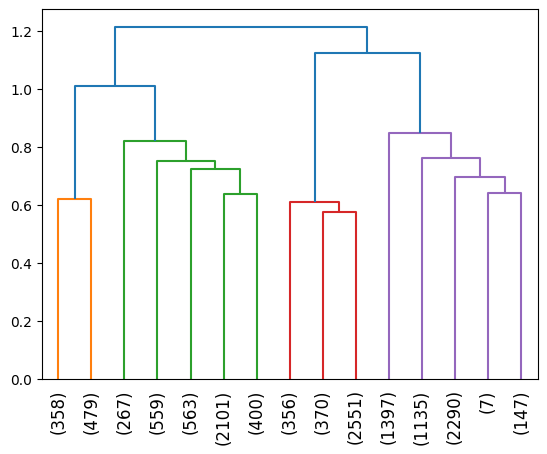

metric: cosine, method:average, truncation_mode:lastp, level':15, k:10, silhouette: 0.3109387972325357 , DBscore:1.2849800533681264


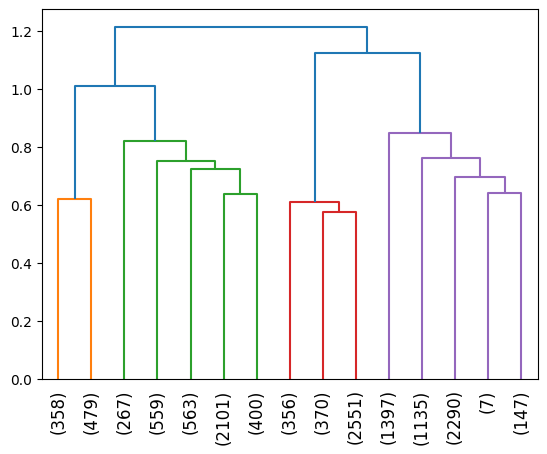

metric: cosine, method:average, truncation_mode:level, level':2, k:5, silhouette: 0.29424723290692256 , DBscore:1.3227296883835122


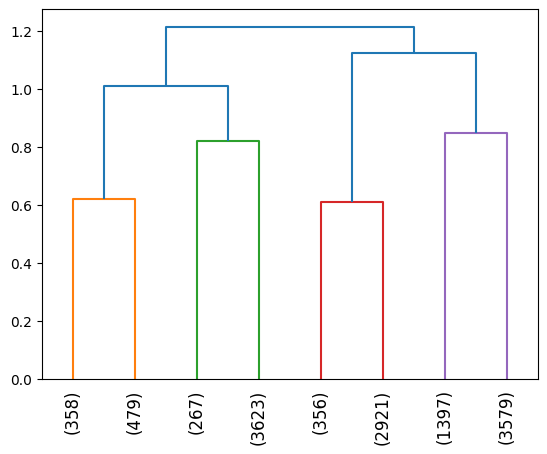

metric: cosine, method:average, truncation_mode:level, level':2, k:10, silhouette: 0.3109387972325357 , DBscore:1.2849800533681264


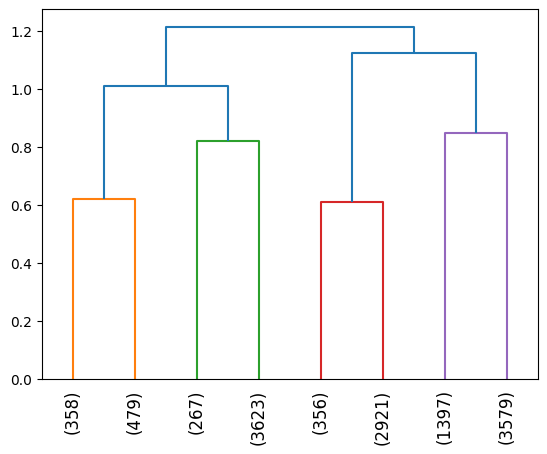

metric: cosine, method:average, truncation_mode:level, level':5, k:5, silhouette: 0.29424723290692256 , DBscore:1.3227296883835122


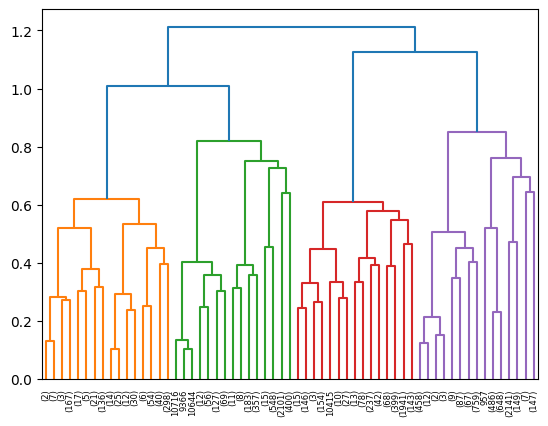

metric: cosine, method:average, truncation_mode:level, level':5, k:10, silhouette: 0.3109387972325357 , DBscore:1.2849800533681264


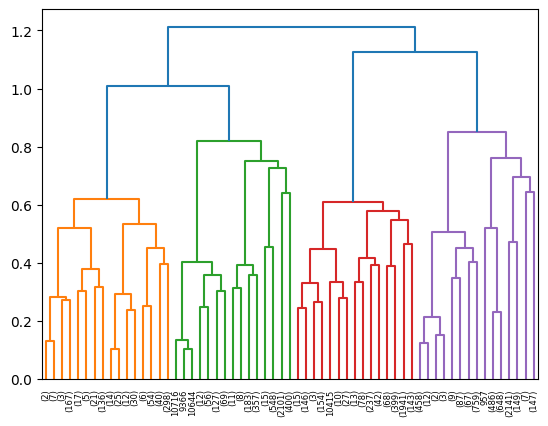

metric: cosine, method:average, truncation_mode:level, level':15, k:5, silhouette: 0.29424723290692256 , DBscore:1.3227296883835122


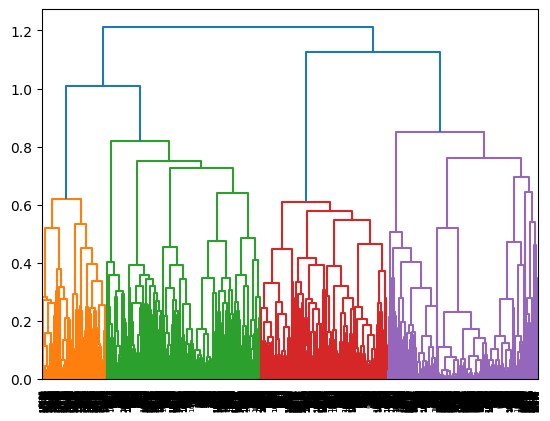

metric: cosine, method:average, truncation_mode:level, level':15, k:10, silhouette: 0.3109387972325357 , DBscore:1.2849800533681264


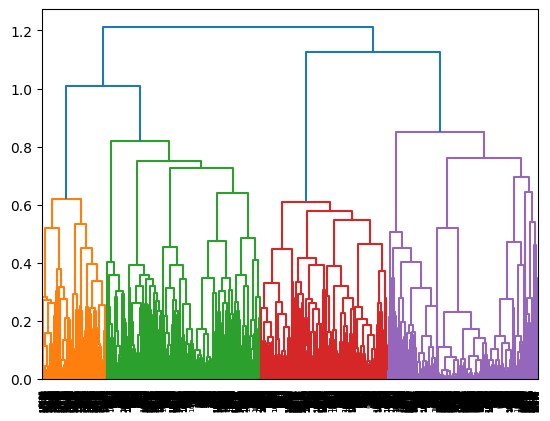

metric: cosine, method:weighted, truncation_mode:None, level':2, k:5, silhouette: 0.2099602001150448 , DBscore:1.342257365696228


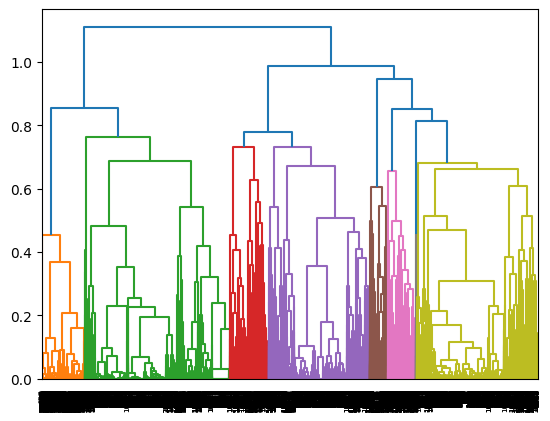

metric: cosine, method:weighted, truncation_mode:None, level':2, k:10, silhouette: 0.22439484927360903 , DBscore:1.6340727965009414


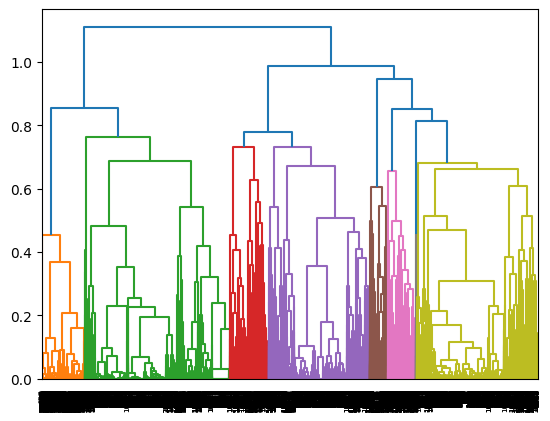

metric: cosine, method:weighted, truncation_mode:None, level':5, k:5, silhouette: 0.2099602001150448 , DBscore:1.342257365696228


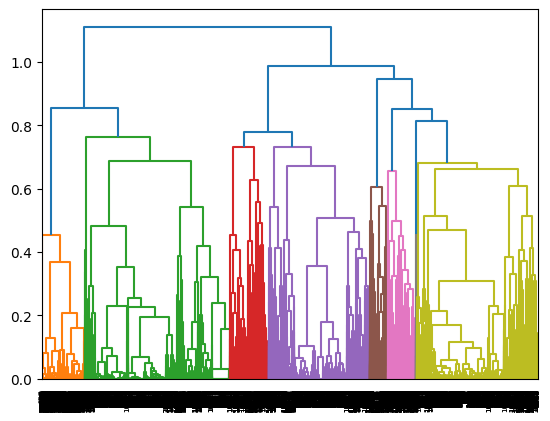

metric: cosine, method:weighted, truncation_mode:None, level':5, k:10, silhouette: 0.22439484927360903 , DBscore:1.6340727965009414


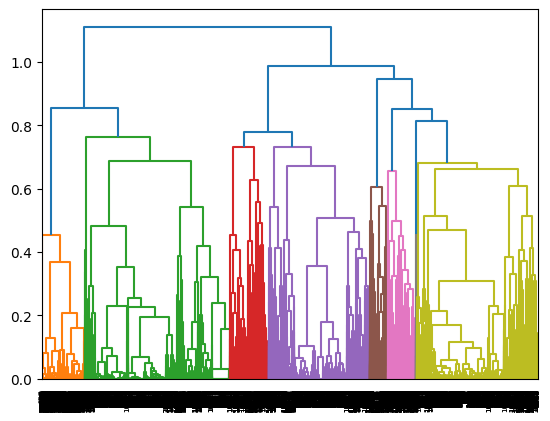

metric: cosine, method:weighted, truncation_mode:None, level':15, k:5, silhouette: 0.2099602001150448 , DBscore:1.342257365696228


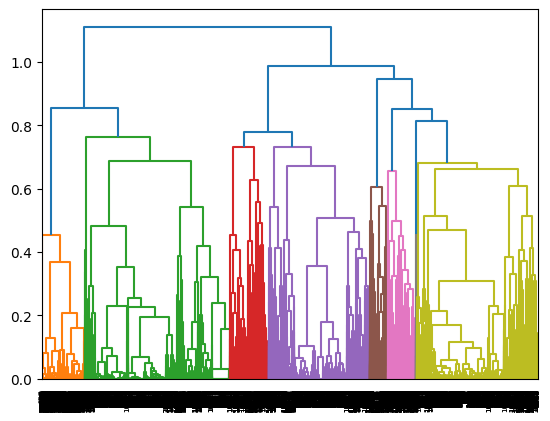

metric: cosine, method:weighted, truncation_mode:None, level':15, k:10, silhouette: 0.22439484927360903 , DBscore:1.6340727965009414


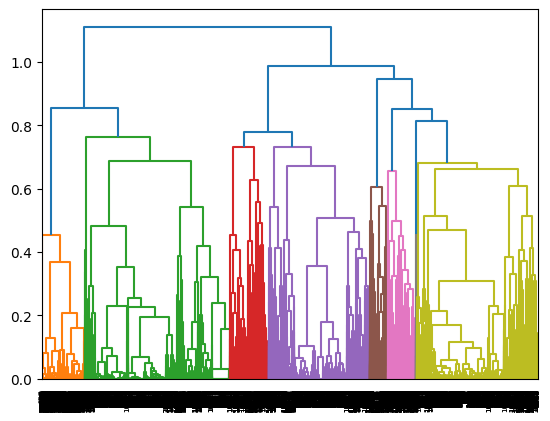

metric: cosine, method:weighted, truncation_mode:lastp, level':2, k:5, silhouette: 0.2099602001150448 , DBscore:1.342257365696228


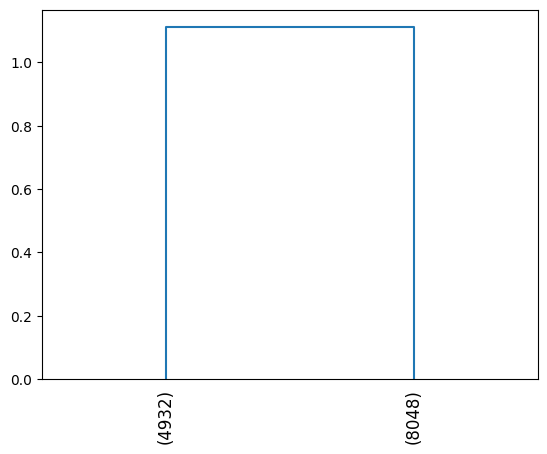

metric: cosine, method:weighted, truncation_mode:lastp, level':2, k:10, silhouette: 0.22439484927360903 , DBscore:1.6340727965009414


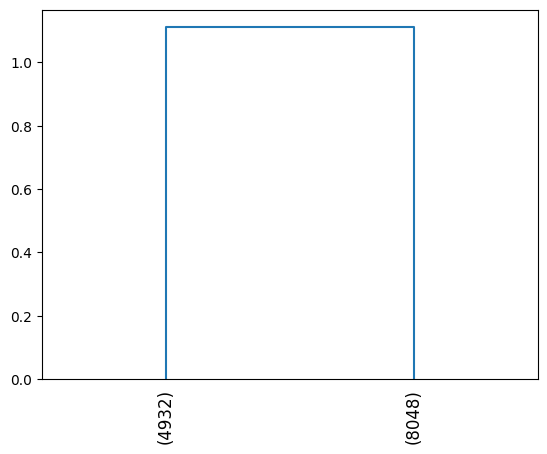

metric: cosine, method:weighted, truncation_mode:lastp, level':5, k:5, silhouette: 0.2099602001150448 , DBscore:1.342257365696228


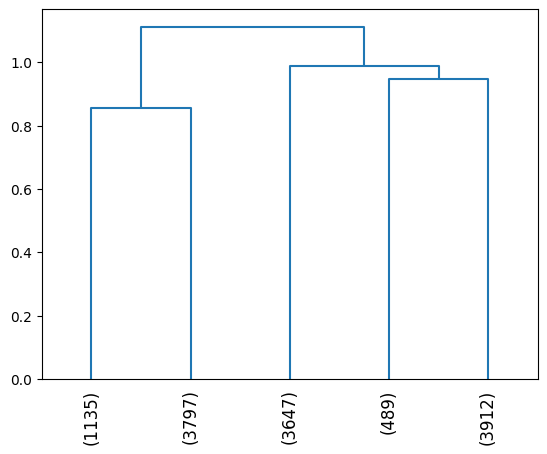

metric: cosine, method:weighted, truncation_mode:lastp, level':5, k:10, silhouette: 0.22439484927360903 , DBscore:1.6340727965009414


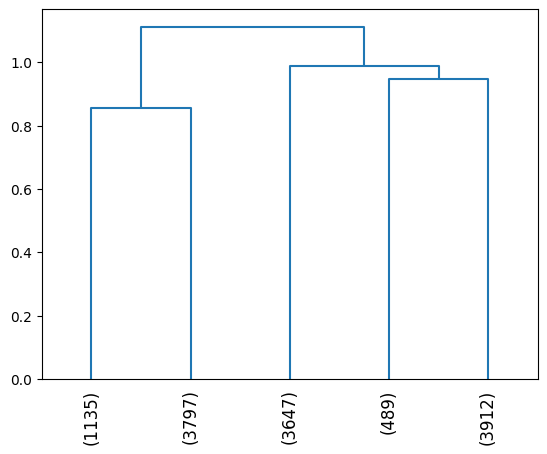

metric: cosine, method:weighted, truncation_mode:lastp, level':15, k:5, silhouette: 0.2099602001150448 , DBscore:1.342257365696228


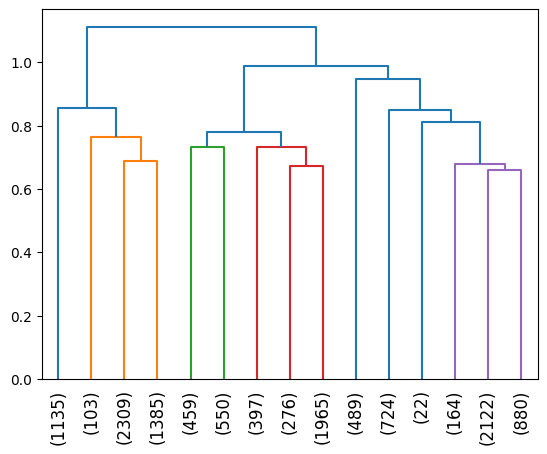

metric: cosine, method:weighted, truncation_mode:lastp, level':15, k:10, silhouette: 0.22439484927360903 , DBscore:1.6340727965009414


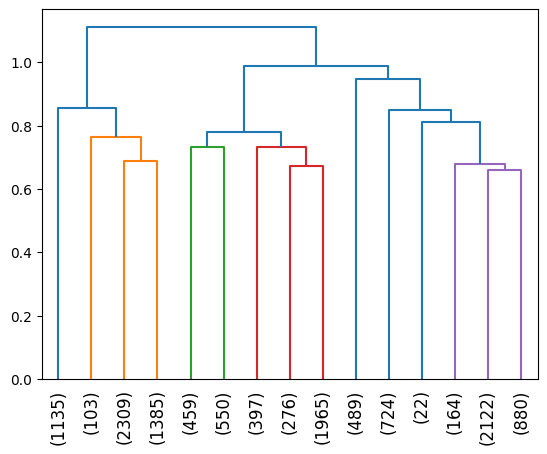

metric: cosine, method:weighted, truncation_mode:level, level':2, k:5, silhouette: 0.2099602001150448 , DBscore:1.342257365696228


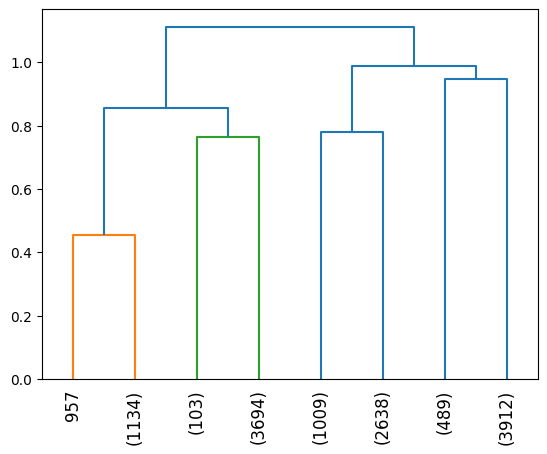

metric: cosine, method:weighted, truncation_mode:level, level':2, k:10, silhouette: 0.22439484927360903 , DBscore:1.6340727965009414


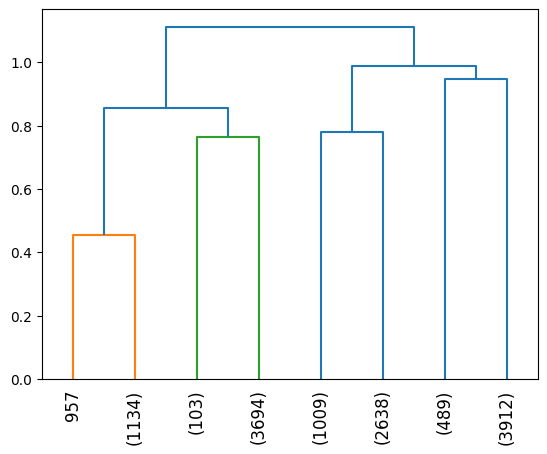

metric: cosine, method:weighted, truncation_mode:level, level':5, k:5, silhouette: 0.2099602001150448 , DBscore:1.342257365696228


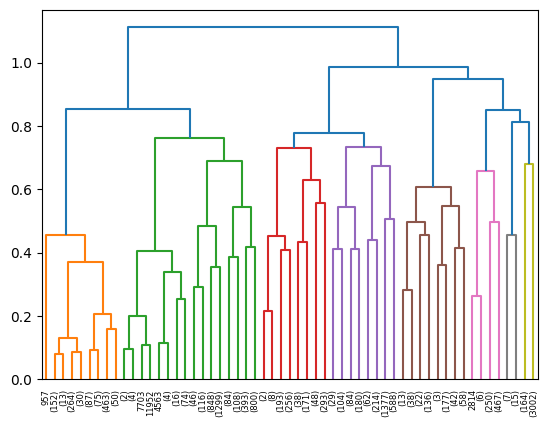

metric: cosine, method:weighted, truncation_mode:level, level':5, k:10, silhouette: 0.22439484927360903 , DBscore:1.6340727965009414


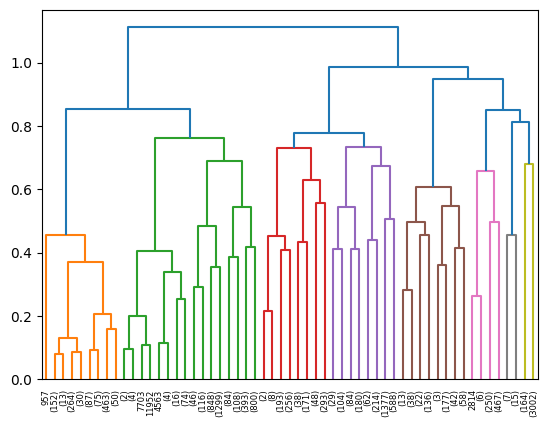

metric: cosine, method:weighted, truncation_mode:level, level':15, k:5, silhouette: 0.2099602001150448 , DBscore:1.342257365696228


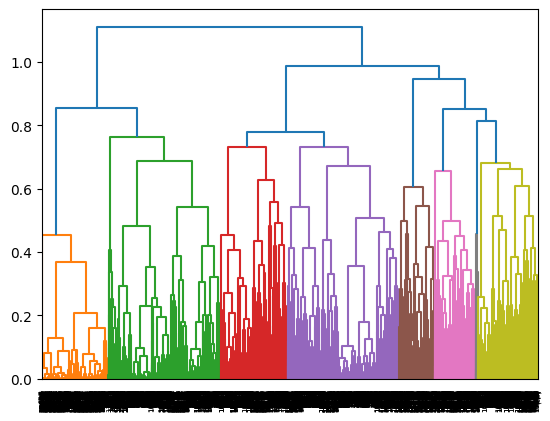

metric: cosine, method:weighted, truncation_mode:level, level':15, k:10, silhouette: 0.22439484927360903 , DBscore:1.6340727965009414


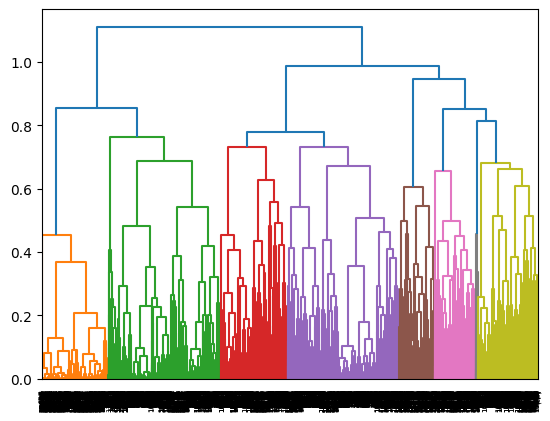

metric: euclidean, method:complete, truncation_mode:None, level':2, k:5, silhouette: 0.43671031701221025 , DBscore:0.5824488725990793


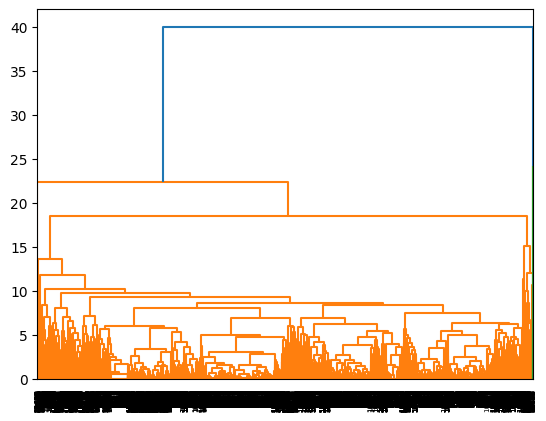

metric: euclidean, method:complete, truncation_mode:None, level':2, k:10, silhouette: 0.30817036736214193 , DBscore:1.000875560853193


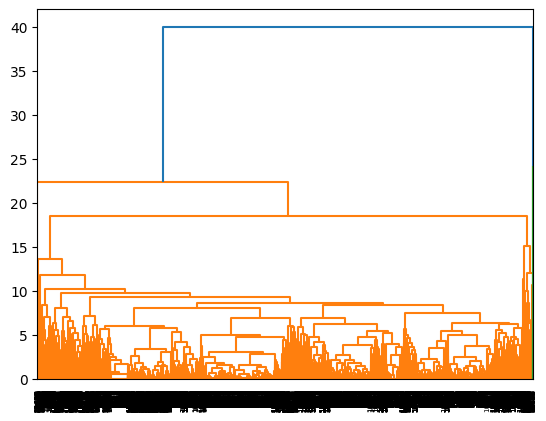

metric: euclidean, method:complete, truncation_mode:None, level':5, k:5, silhouette: 0.43671031701221025 , DBscore:0.5824488725990793


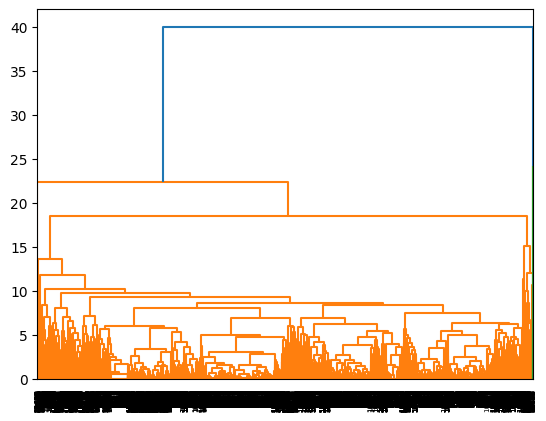

metric: euclidean, method:complete, truncation_mode:None, level':5, k:10, silhouette: 0.30817036736214193 , DBscore:1.000875560853193


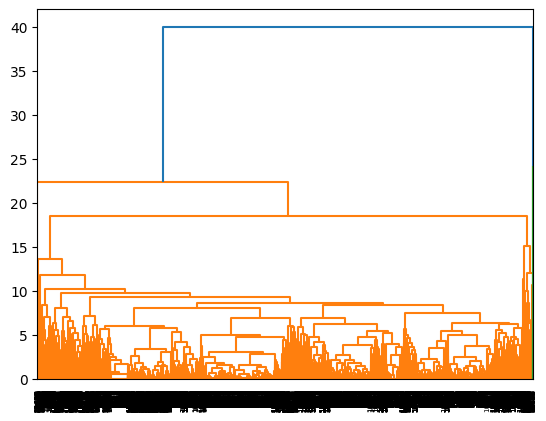

metric: euclidean, method:complete, truncation_mode:None, level':15, k:5, silhouette: 0.43671031701221025 , DBscore:0.5824488725990793


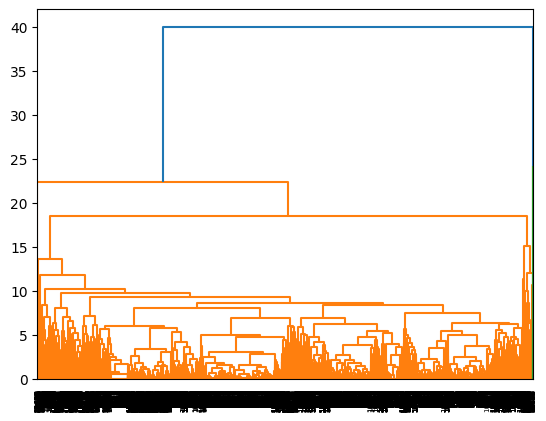

metric: euclidean, method:complete, truncation_mode:None, level':15, k:10, silhouette: 0.30817036736214193 , DBscore:1.000875560853193


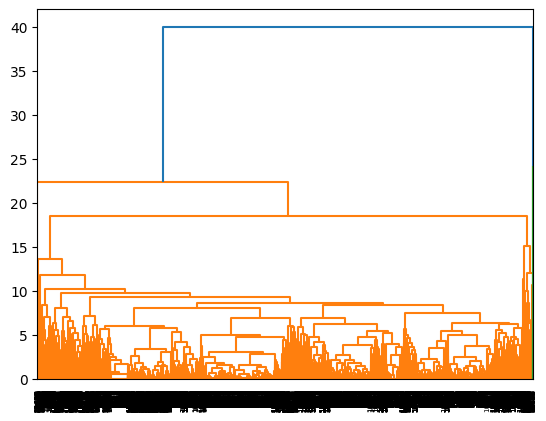

metric: euclidean, method:complete, truncation_mode:lastp, level':2, k:5, silhouette: 0.43671031701221025 , DBscore:0.5824488725990793


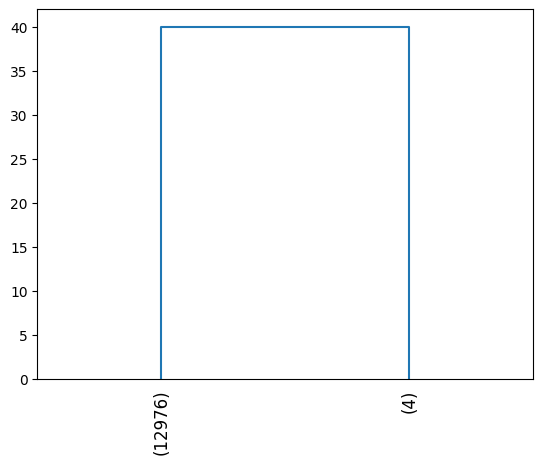

metric: euclidean, method:complete, truncation_mode:lastp, level':2, k:10, silhouette: 0.30817036736214193 , DBscore:1.000875560853193


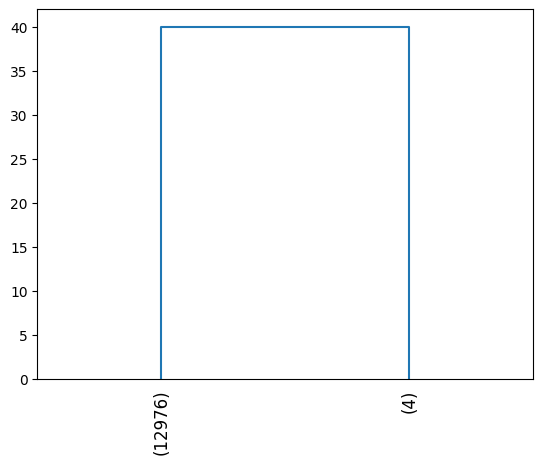

metric: euclidean, method:complete, truncation_mode:lastp, level':5, k:5, silhouette: 0.43671031701221025 , DBscore:0.5824488725990793


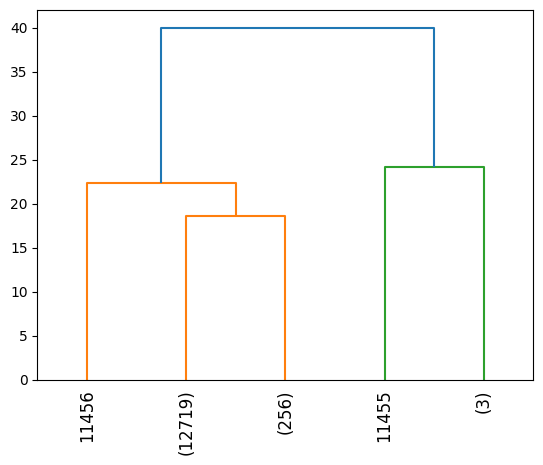

metric: euclidean, method:complete, truncation_mode:lastp, level':5, k:10, silhouette: 0.30817036736214193 , DBscore:1.000875560853193


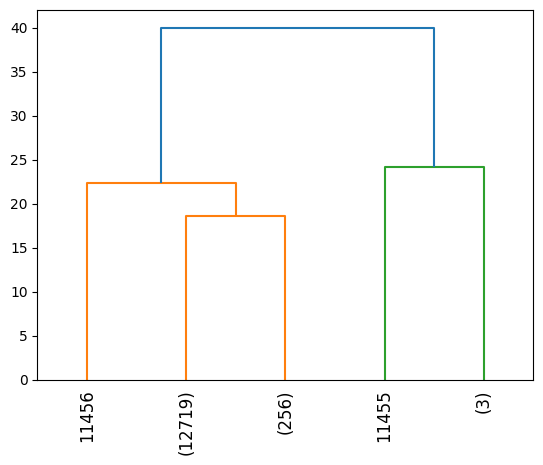

metric: euclidean, method:complete, truncation_mode:lastp, level':15, k:5, silhouette: 0.43671031701221025 , DBscore:0.5824488725990793


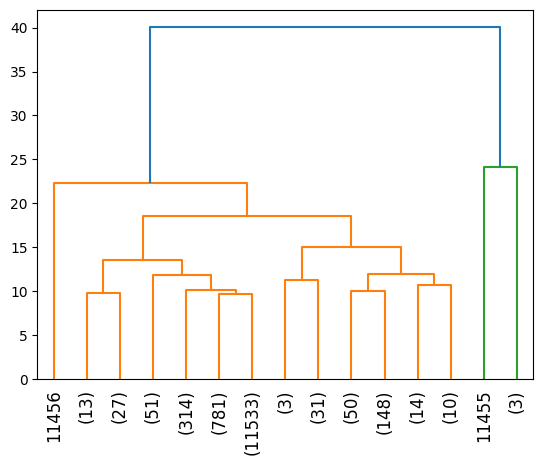

metric: euclidean, method:complete, truncation_mode:lastp, level':15, k:10, silhouette: 0.30817036736214193 , DBscore:1.000875560853193


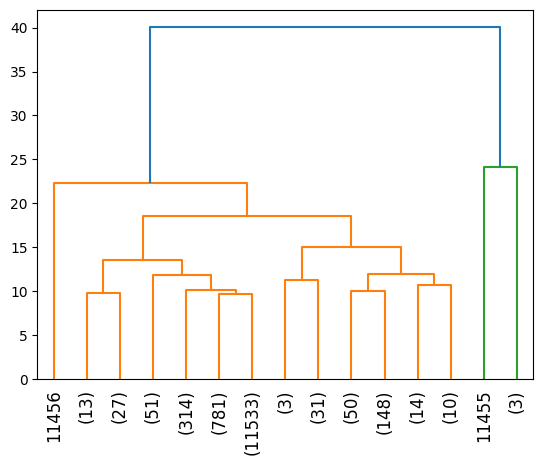

metric: euclidean, method:complete, truncation_mode:level, level':2, k:5, silhouette: 0.43671031701221025 , DBscore:0.5824488725990793


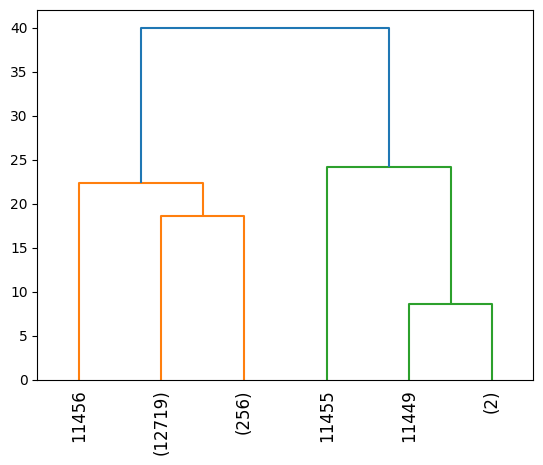

metric: euclidean, method:complete, truncation_mode:level, level':2, k:10, silhouette: 0.30817036736214193 , DBscore:1.000875560853193


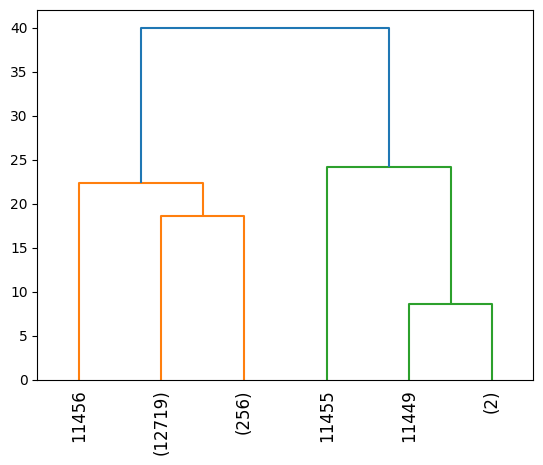

metric: euclidean, method:complete, truncation_mode:level, level':5, k:5, silhouette: 0.43671031701221025 , DBscore:0.5824488725990793


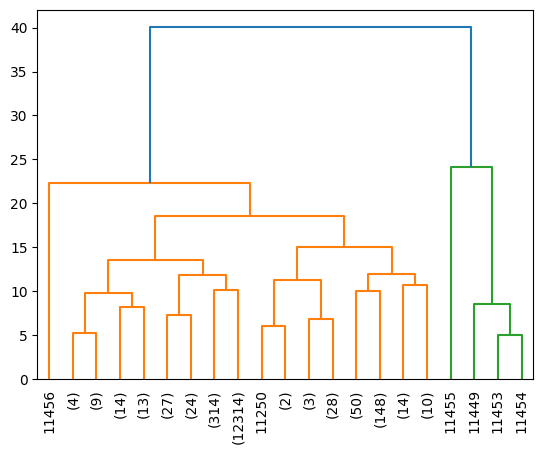

metric: euclidean, method:complete, truncation_mode:level, level':5, k:10, silhouette: 0.30817036736214193 , DBscore:1.000875560853193


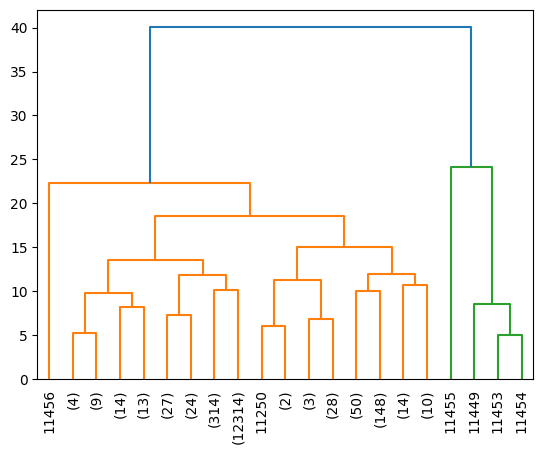

metric: euclidean, method:complete, truncation_mode:level, level':15, k:5, silhouette: 0.43671031701221025 , DBscore:0.5824488725990793


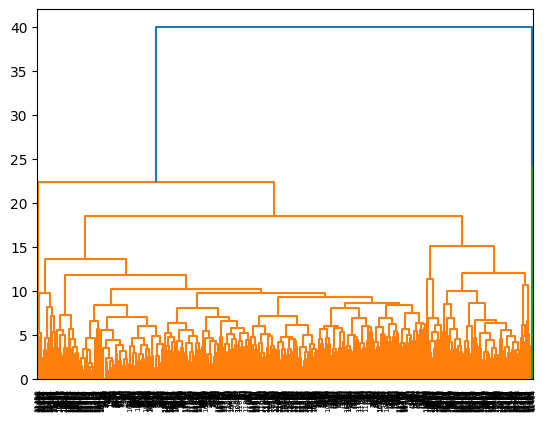

metric: euclidean, method:complete, truncation_mode:level, level':15, k:10, silhouette: 0.30817036736214193 , DBscore:1.000875560853193


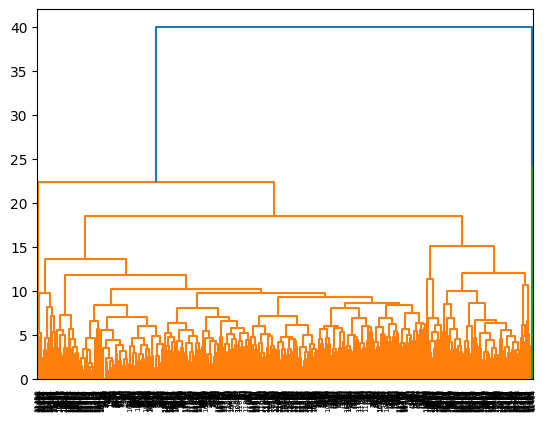

metric: euclidean, method:single, truncation_mode:None, level':2, k:5, silhouette: 0.7280077334608617 , DBscore:0.19872861451307725


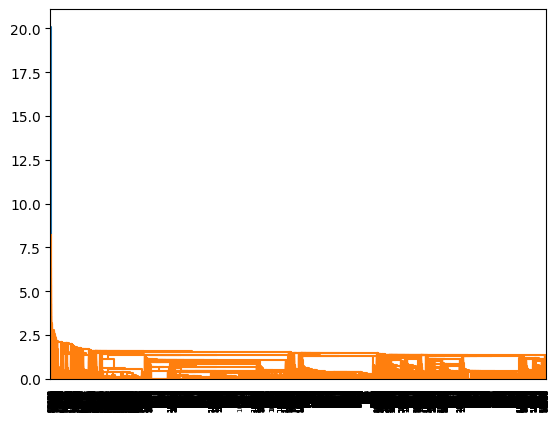

metric: euclidean, method:single, truncation_mode:None, level':2, k:10, silhouette: 0.5328157383233203 , DBscore:0.2321317317964497


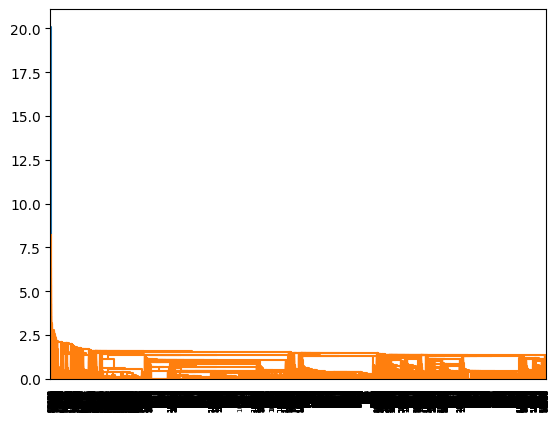

metric: euclidean, method:single, truncation_mode:None, level':5, k:5, silhouette: 0.7280077334608617 , DBscore:0.19872861451307725


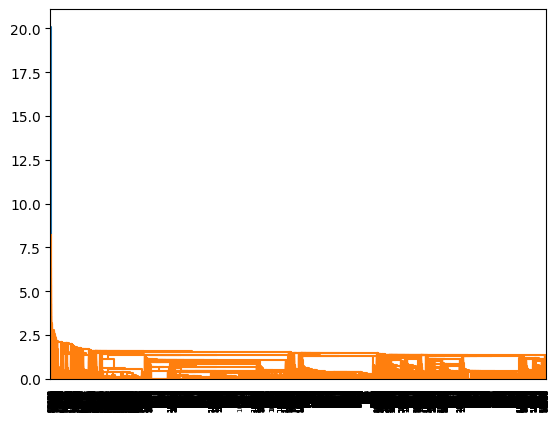

metric: euclidean, method:single, truncation_mode:None, level':5, k:10, silhouette: 0.5328157383233203 , DBscore:0.2321317317964497


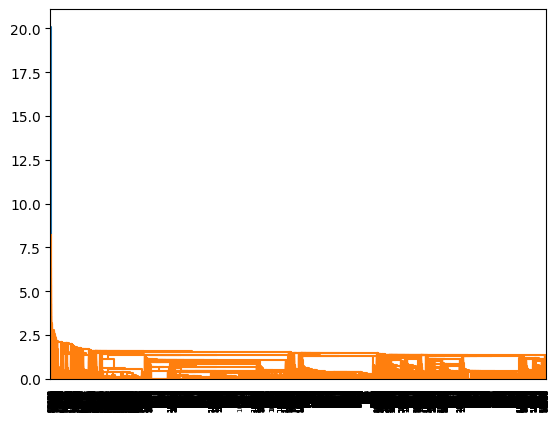

metric: euclidean, method:single, truncation_mode:None, level':15, k:5, silhouette: 0.7280077334608617 , DBscore:0.19872861451307725


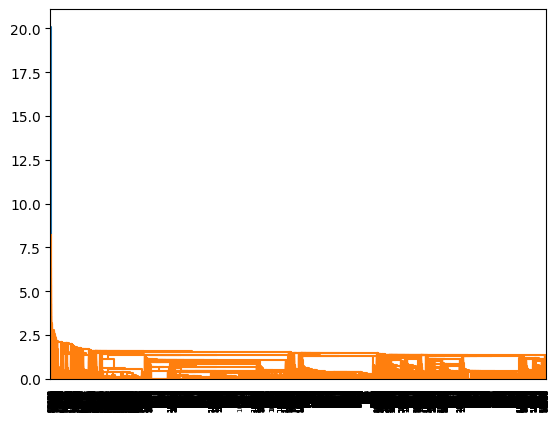

metric: euclidean, method:single, truncation_mode:None, level':15, k:10, silhouette: 0.5328157383233203 , DBscore:0.2321317317964497


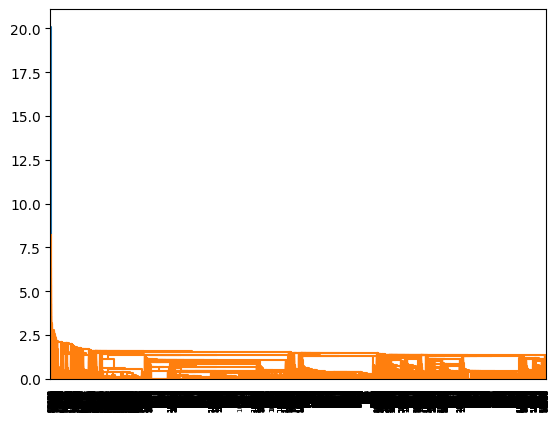

metric: euclidean, method:single, truncation_mode:lastp, level':2, k:5, silhouette: 0.7280077334608617 , DBscore:0.19872861451307725


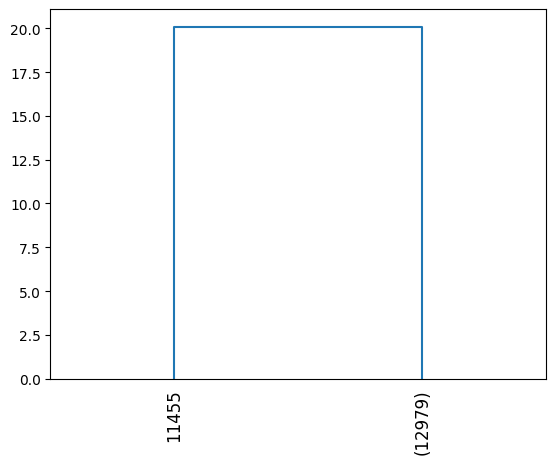

metric: euclidean, method:single, truncation_mode:lastp, level':2, k:10, silhouette: 0.5328157383233203 , DBscore:0.2321317317964497


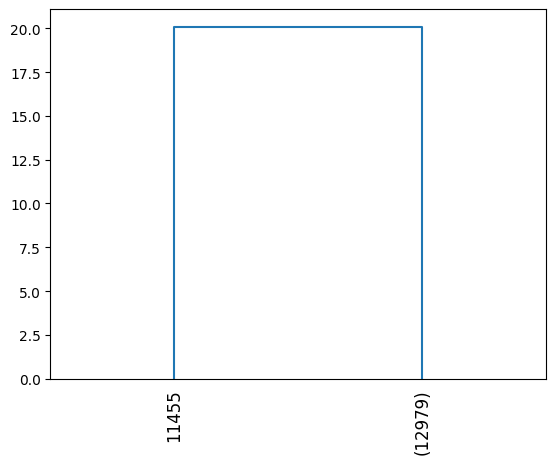

metric: euclidean, method:single, truncation_mode:lastp, level':5, k:5, silhouette: 0.7280077334608617 , DBscore:0.19872861451307725


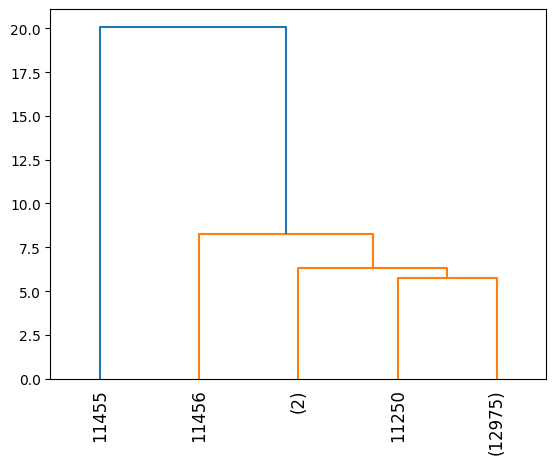

metric: euclidean, method:single, truncation_mode:lastp, level':5, k:10, silhouette: 0.5328157383233203 , DBscore:0.2321317317964497


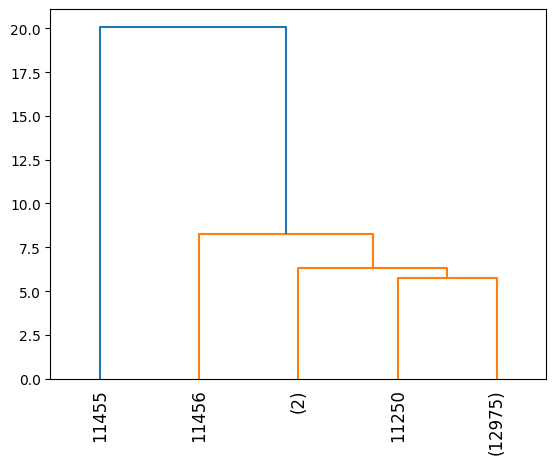

metric: euclidean, method:single, truncation_mode:lastp, level':15, k:5, silhouette: 0.7280077334608617 , DBscore:0.19872861451307725


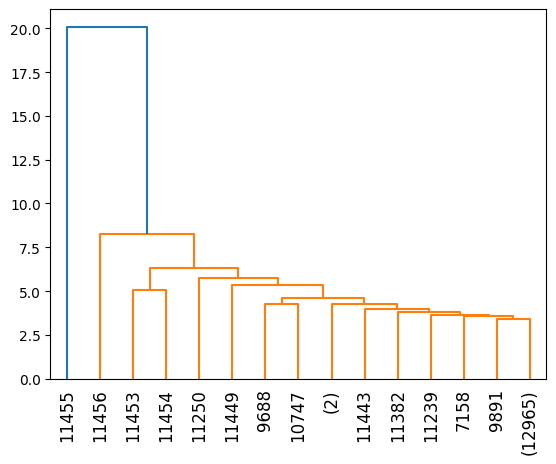

metric: euclidean, method:single, truncation_mode:lastp, level':15, k:10, silhouette: 0.5328157383233203 , DBscore:0.2321317317964497


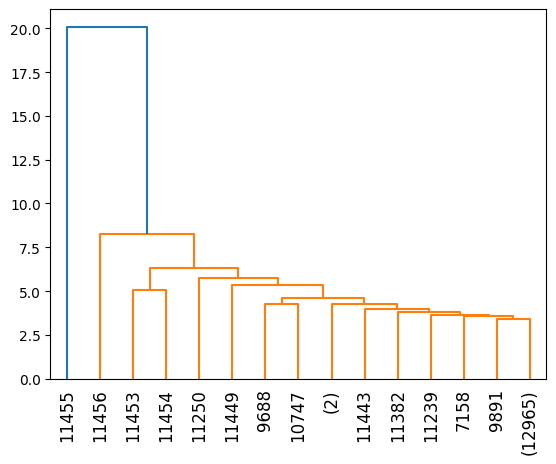

metric: euclidean, method:single, truncation_mode:level, level':2, k:5, silhouette: 0.7280077334608617 , DBscore:0.19872861451307725


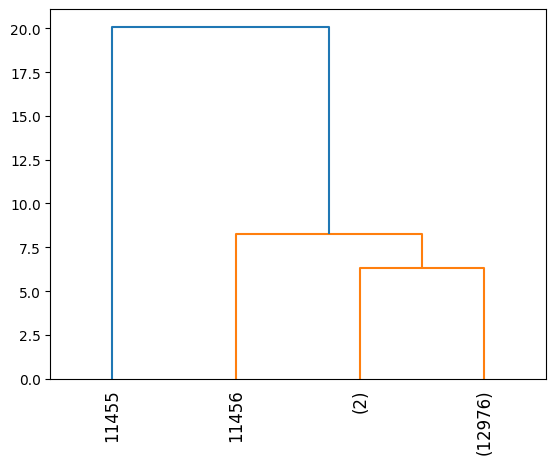

metric: euclidean, method:single, truncation_mode:level, level':2, k:10, silhouette: 0.5328157383233203 , DBscore:0.2321317317964497


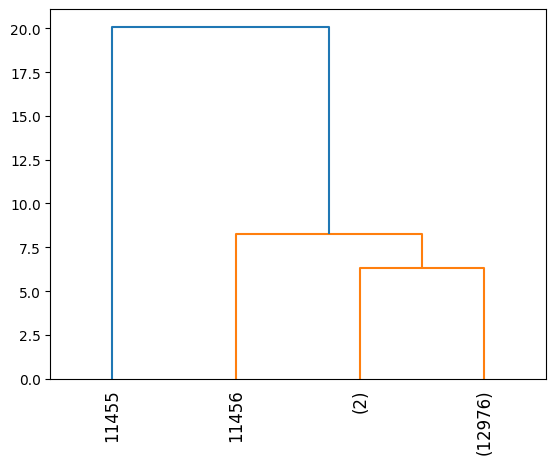

metric: euclidean, method:single, truncation_mode:level, level':5, k:5, silhouette: 0.7280077334608617 , DBscore:0.19872861451307725


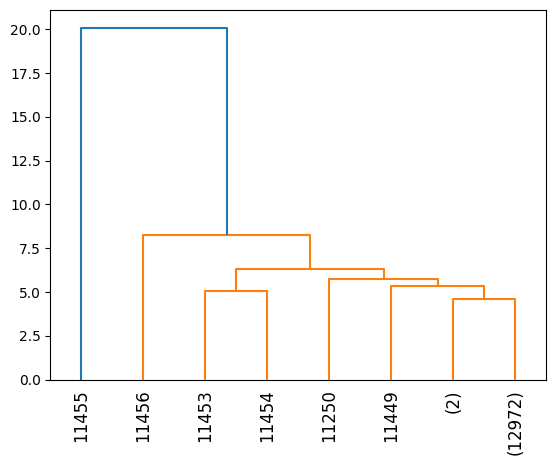

metric: euclidean, method:single, truncation_mode:level, level':5, k:10, silhouette: 0.5328157383233203 , DBscore:0.2321317317964497


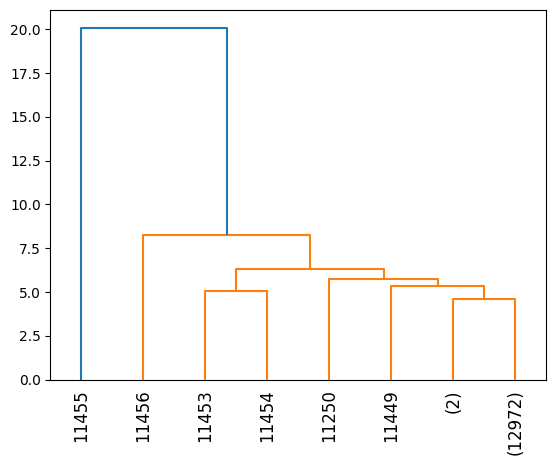

metric: euclidean, method:single, truncation_mode:level, level':15, k:5, silhouette: 0.7280077334608617 , DBscore:0.19872861451307725


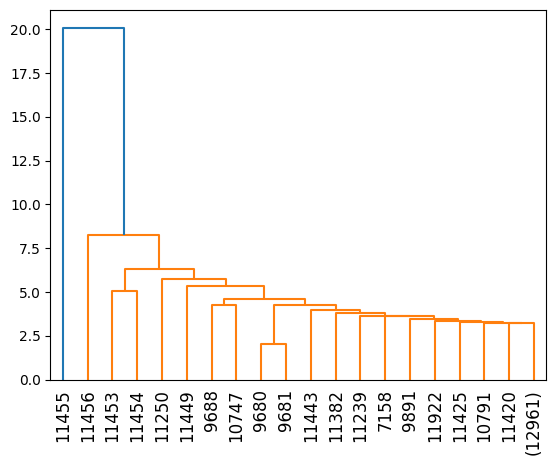

metric: euclidean, method:single, truncation_mode:level, level':15, k:10, silhouette: 0.5328157383233203 , DBscore:0.2321317317964497


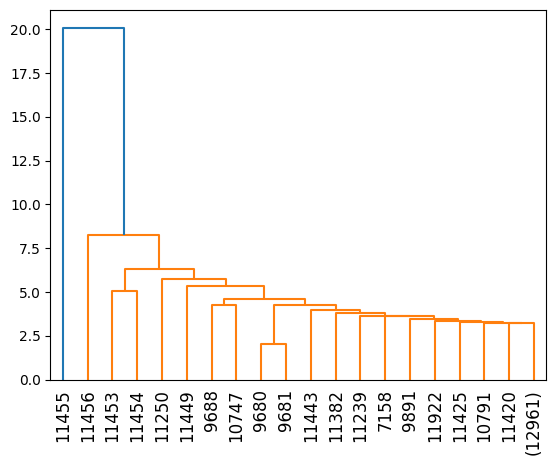

metric: euclidean, method:average, truncation_mode:None, level':2, k:5, silhouette: 0.5983763114854691 , DBscore:0.5096562655321224


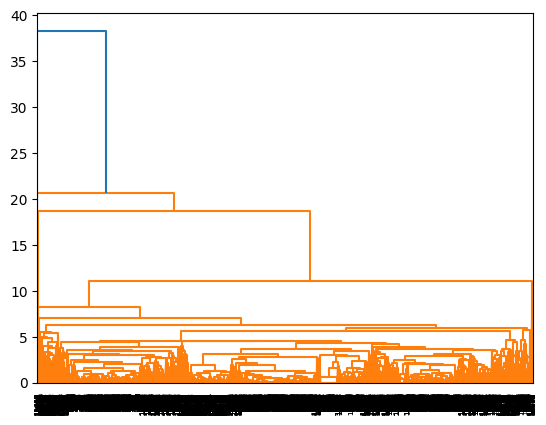

metric: euclidean, method:average, truncation_mode:None, level':2, k:10, silhouette: 0.3678311769519513 , DBscore:0.7112226726520066


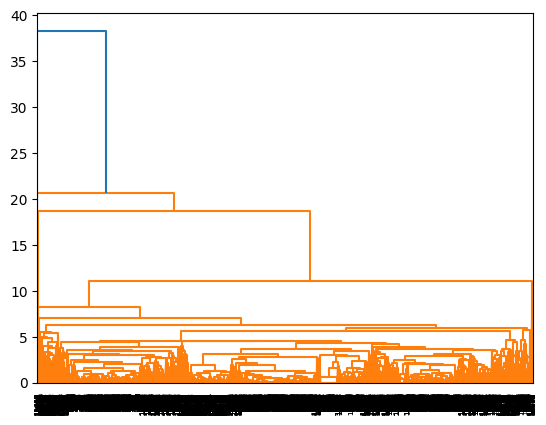

metric: euclidean, method:average, truncation_mode:None, level':5, k:5, silhouette: 0.5983763114854691 , DBscore:0.5096562655321224


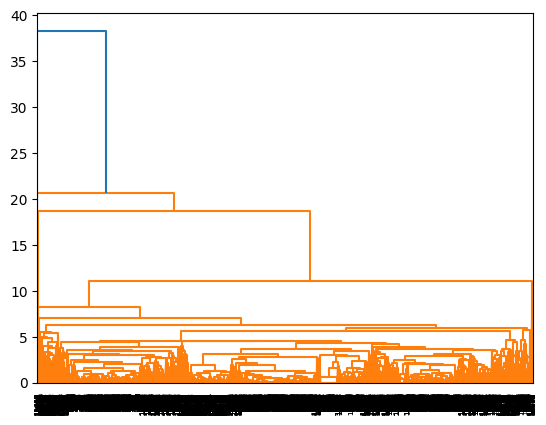

metric: euclidean, method:average, truncation_mode:None, level':5, k:10, silhouette: 0.3678311769519513 , DBscore:0.7112226726520066


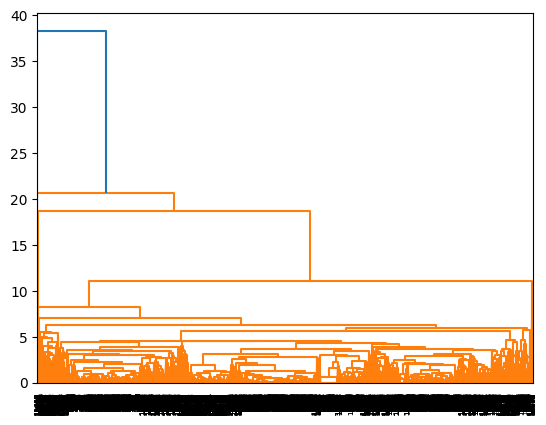

metric: euclidean, method:average, truncation_mode:None, level':15, k:5, silhouette: 0.5983763114854691 , DBscore:0.5096562655321224


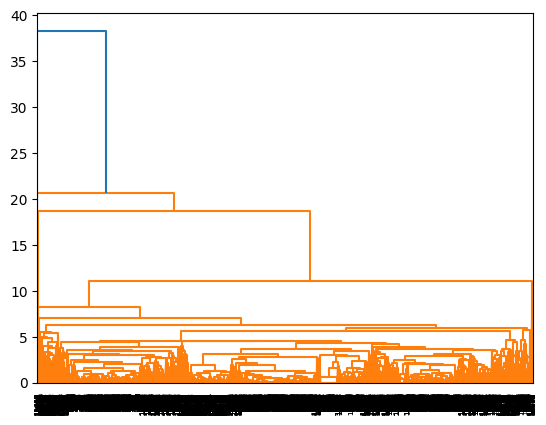

metric: euclidean, method:average, truncation_mode:None, level':15, k:10, silhouette: 0.3678311769519513 , DBscore:0.7112226726520066


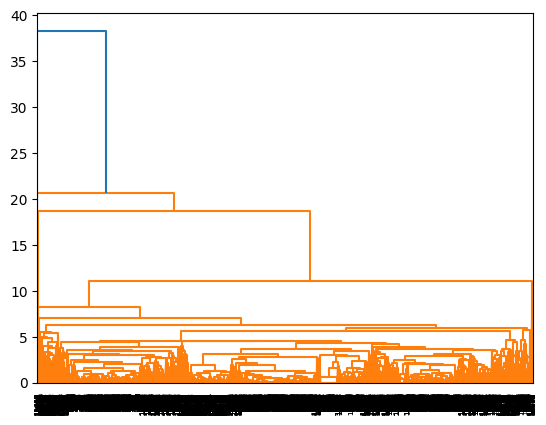

metric: euclidean, method:average, truncation_mode:lastp, level':2, k:5, silhouette: 0.5983763114854691 , DBscore:0.5096562655321224


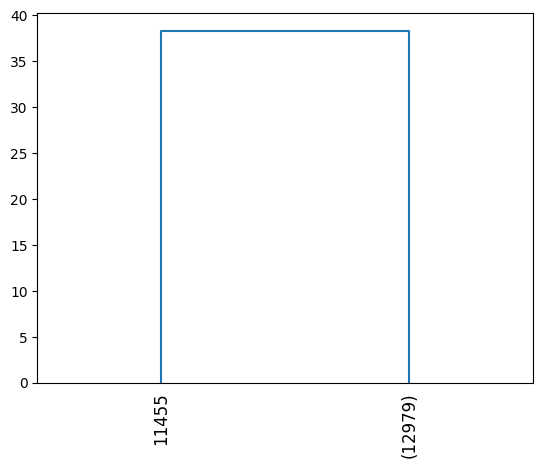

metric: euclidean, method:average, truncation_mode:lastp, level':2, k:10, silhouette: 0.3678311769519513 , DBscore:0.7112226726520066


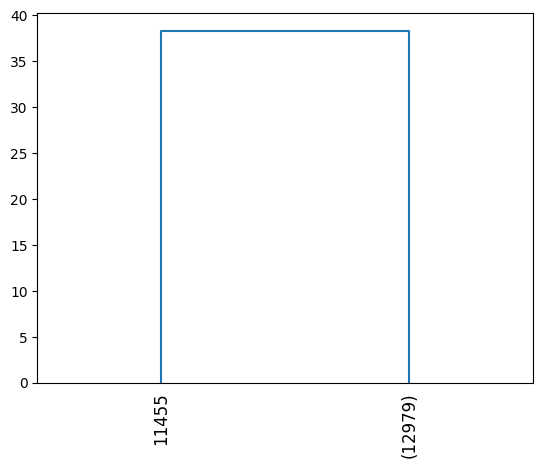

metric: euclidean, method:average, truncation_mode:lastp, level':5, k:5, silhouette: 0.5983763114854691 , DBscore:0.5096562655321224


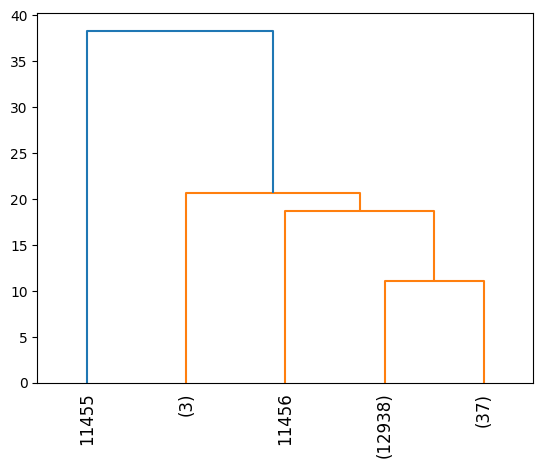

metric: euclidean, method:average, truncation_mode:lastp, level':5, k:10, silhouette: 0.3678311769519513 , DBscore:0.7112226726520066


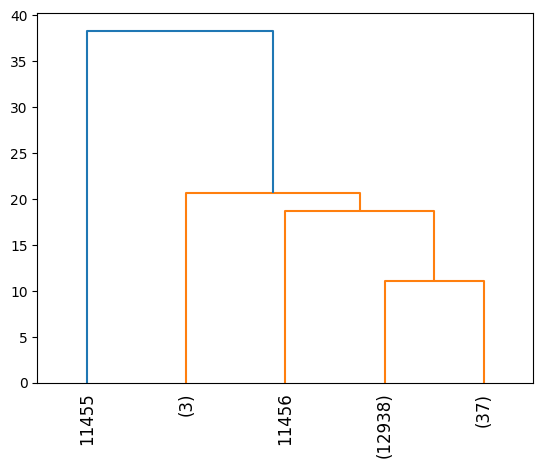

metric: euclidean, method:average, truncation_mode:lastp, level':15, k:5, silhouette: 0.5983763114854691 , DBscore:0.5096562655321224


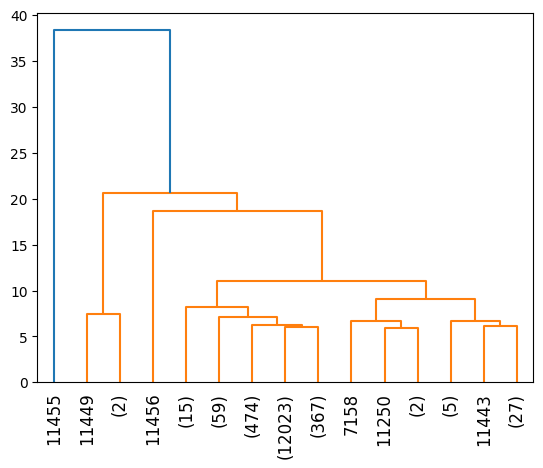

metric: euclidean, method:average, truncation_mode:lastp, level':15, k:10, silhouette: 0.3678311769519513 , DBscore:0.7112226726520066


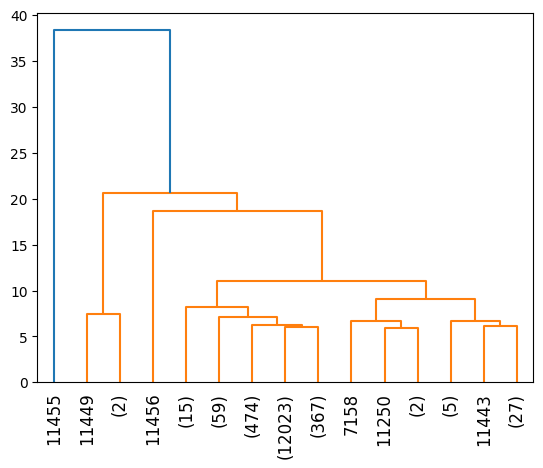

metric: euclidean, method:average, truncation_mode:level, level':2, k:5, silhouette: 0.5983763114854691 , DBscore:0.5096562655321224


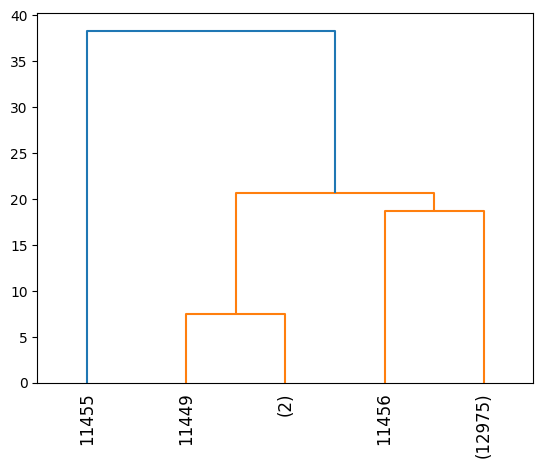

metric: euclidean, method:average, truncation_mode:level, level':2, k:10, silhouette: 0.3678311769519513 , DBscore:0.7112226726520066


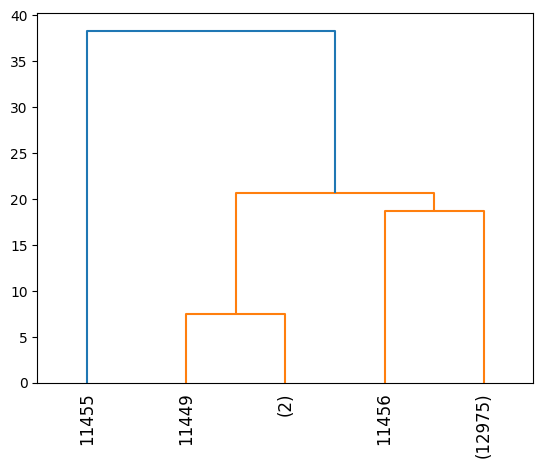

metric: euclidean, method:average, truncation_mode:level, level':5, k:5, silhouette: 0.5983763114854691 , DBscore:0.5096562655321224


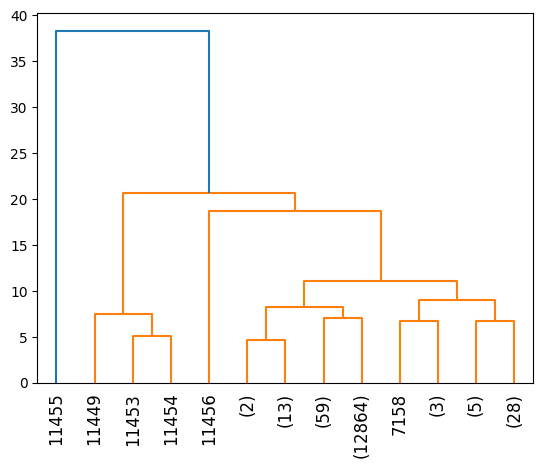

metric: euclidean, method:average, truncation_mode:level, level':5, k:10, silhouette: 0.3678311769519513 , DBscore:0.7112226726520066


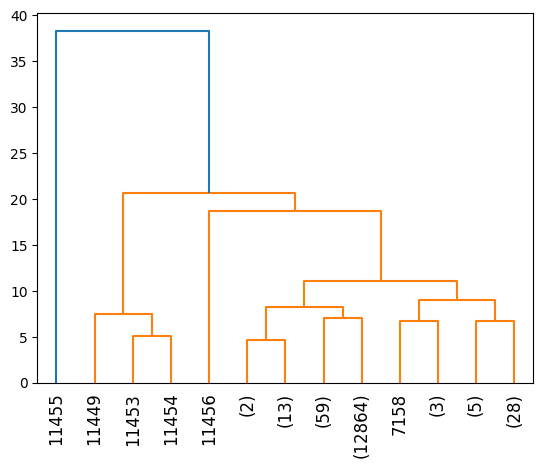

metric: euclidean, method:average, truncation_mode:level, level':15, k:5, silhouette: 0.5983763114854691 , DBscore:0.5096562655321224


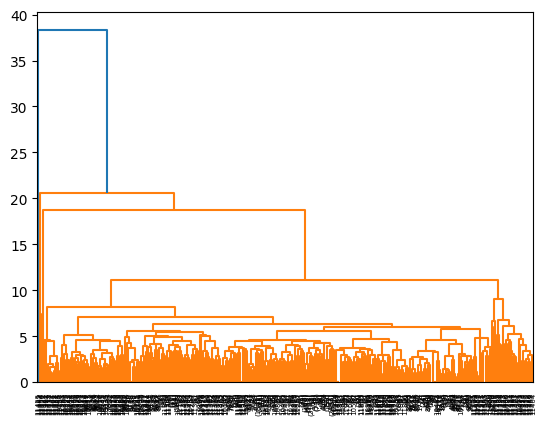

metric: euclidean, method:average, truncation_mode:level, level':15, k:10, silhouette: 0.3678311769519513 , DBscore:0.7112226726520066


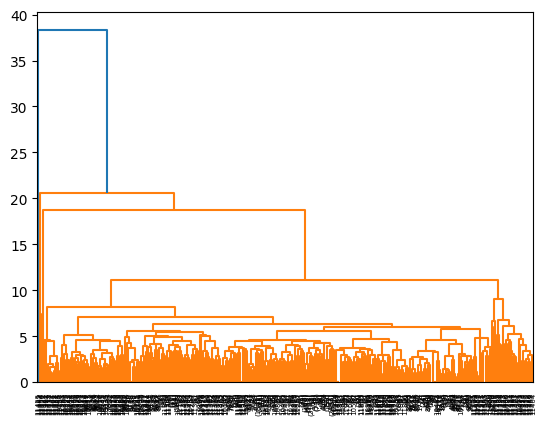

metric: euclidean, method:weighted, truncation_mode:None, level':2, k:5, silhouette: 0.4419108063303447 , DBscore:0.5633757019440194


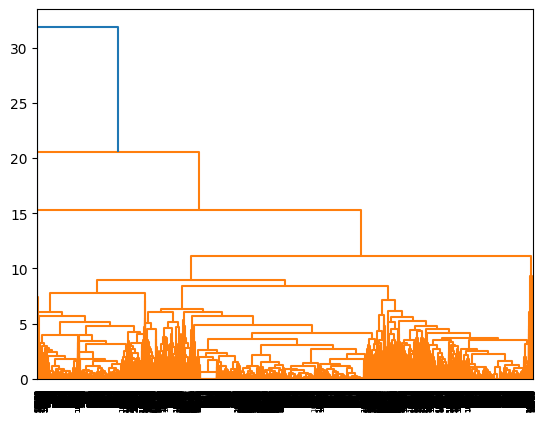

metric: euclidean, method:weighted, truncation_mode:None, level':2, k:10, silhouette: 0.2513790635842382 , DBscore:0.91438879417829


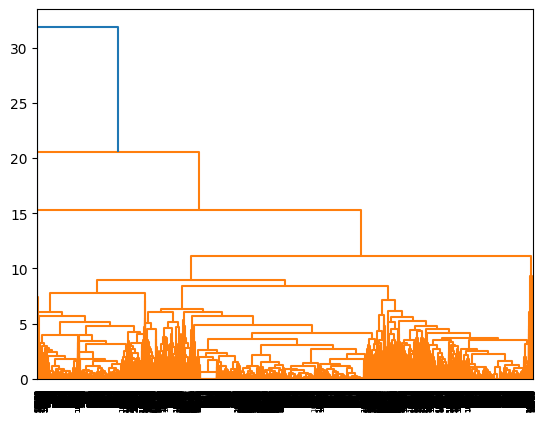

metric: euclidean, method:weighted, truncation_mode:None, level':5, k:5, silhouette: 0.4419108063303447 , DBscore:0.5633757019440194


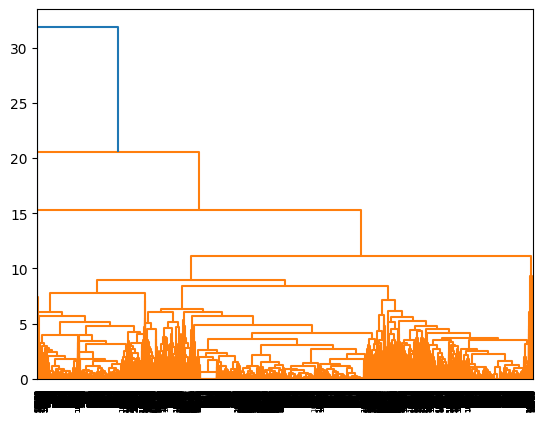

metric: euclidean, method:weighted, truncation_mode:None, level':5, k:10, silhouette: 0.2513790635842382 , DBscore:0.91438879417829


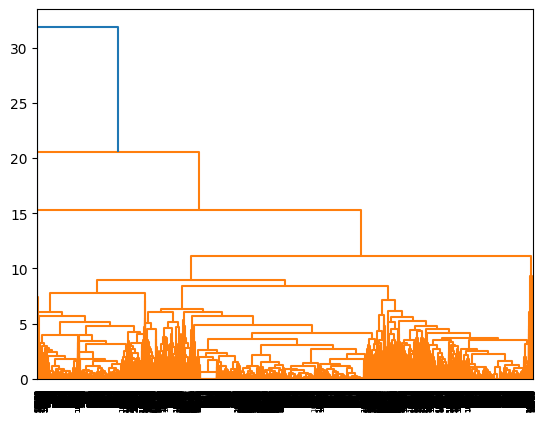

metric: euclidean, method:weighted, truncation_mode:None, level':15, k:5, silhouette: 0.4419108063303447 , DBscore:0.5633757019440194


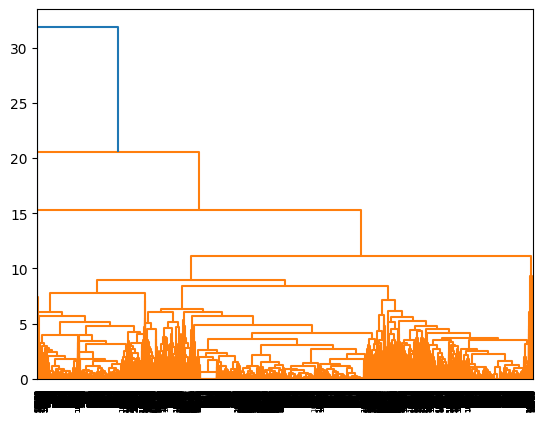

metric: euclidean, method:weighted, truncation_mode:None, level':15, k:10, silhouette: 0.2513790635842382 , DBscore:0.91438879417829


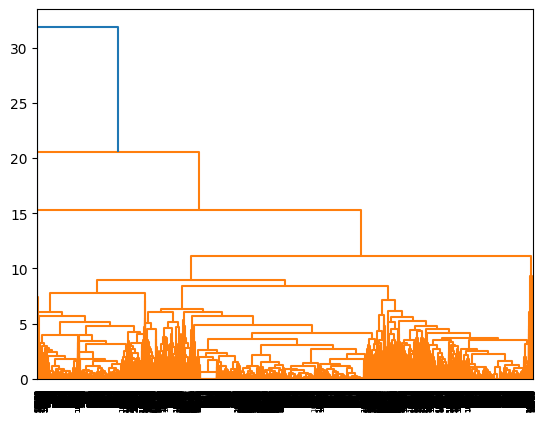

metric: euclidean, method:weighted, truncation_mode:lastp, level':2, k:5, silhouette: 0.4419108063303447 , DBscore:0.5633757019440194


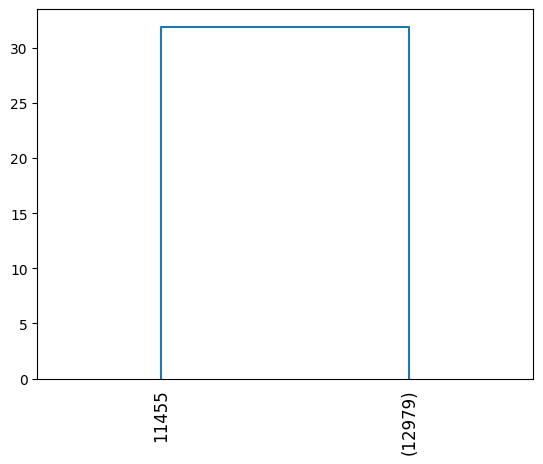

metric: euclidean, method:weighted, truncation_mode:lastp, level':2, k:10, silhouette: 0.2513790635842382 , DBscore:0.91438879417829


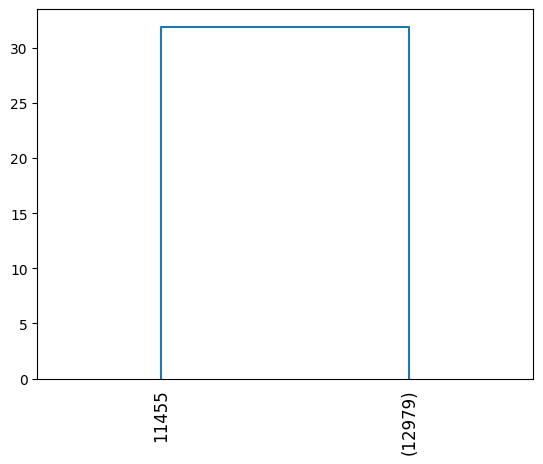

metric: euclidean, method:weighted, truncation_mode:lastp, level':5, k:5, silhouette: 0.4419108063303447 , DBscore:0.5633757019440194


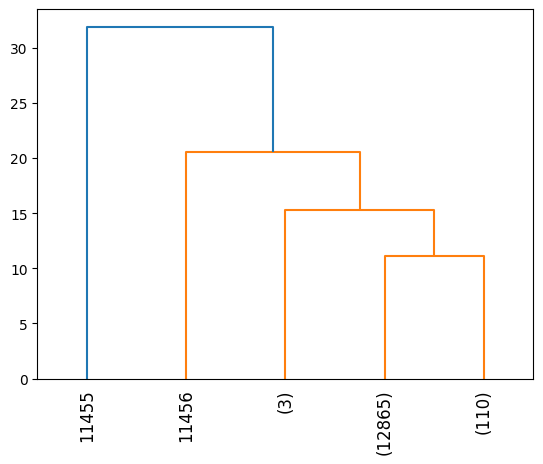

metric: euclidean, method:weighted, truncation_mode:lastp, level':5, k:10, silhouette: 0.2513790635842382 , DBscore:0.91438879417829


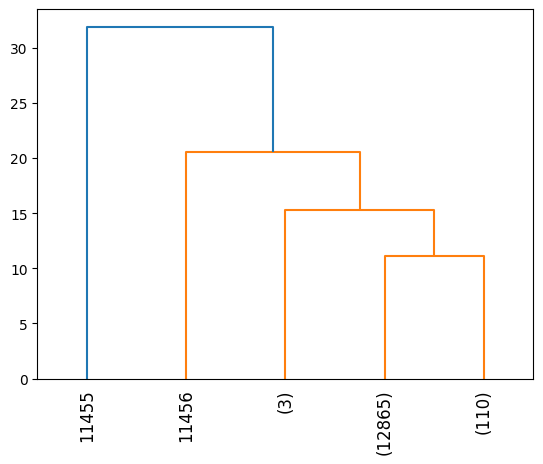

metric: euclidean, method:weighted, truncation_mode:lastp, level':15, k:5, silhouette: 0.4419108063303447 , DBscore:0.5633757019440194


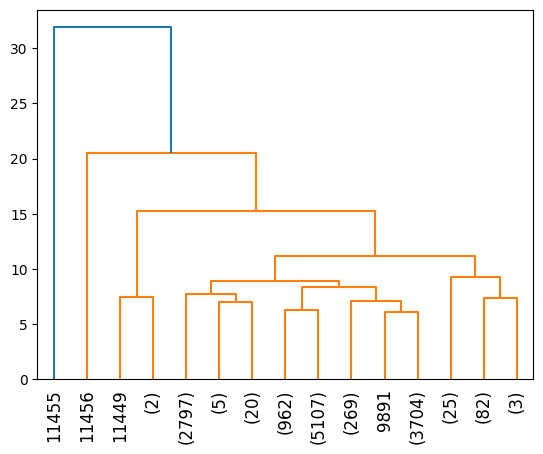

metric: euclidean, method:weighted, truncation_mode:lastp, level':15, k:10, silhouette: 0.2513790635842382 , DBscore:0.91438879417829


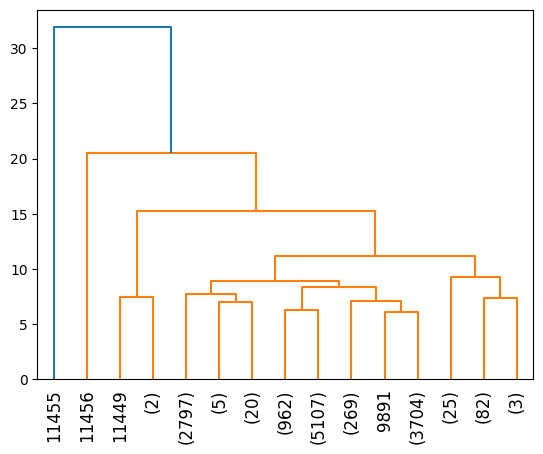

metric: euclidean, method:weighted, truncation_mode:level, level':2, k:5, silhouette: 0.4419108063303447 , DBscore:0.5633757019440194


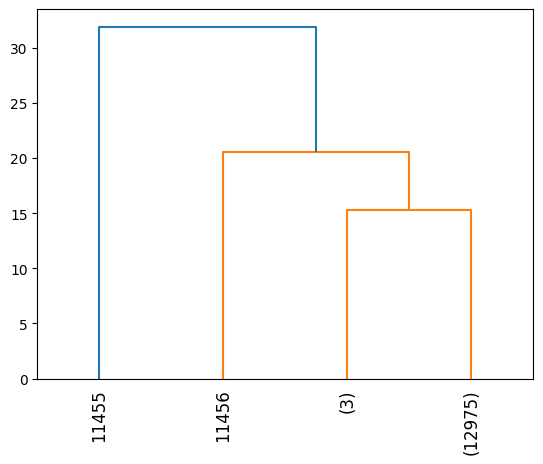

metric: euclidean, method:weighted, truncation_mode:level, level':2, k:10, silhouette: 0.2513790635842382 , DBscore:0.91438879417829


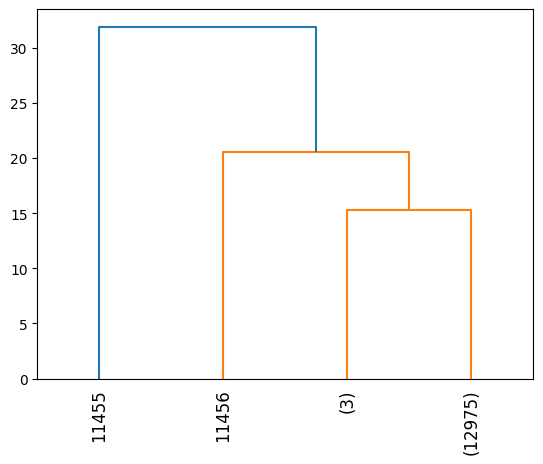

metric: euclidean, method:weighted, truncation_mode:level, level':5, k:5, silhouette: 0.4419108063303447 , DBscore:0.5633757019440194


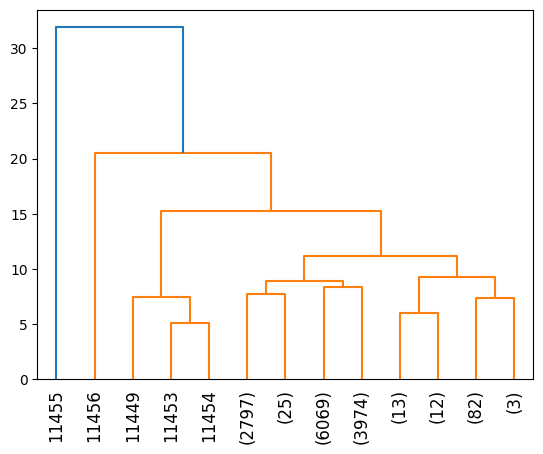

metric: euclidean, method:weighted, truncation_mode:level, level':5, k:10, silhouette: 0.2513790635842382 , DBscore:0.91438879417829


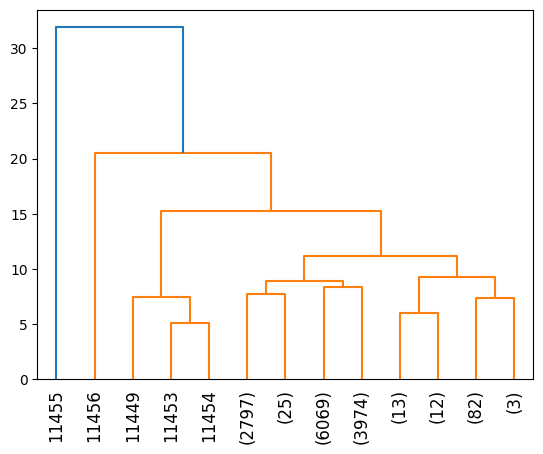

metric: euclidean, method:weighted, truncation_mode:level, level':15, k:5, silhouette: 0.4419108063303447 , DBscore:0.5633757019440194


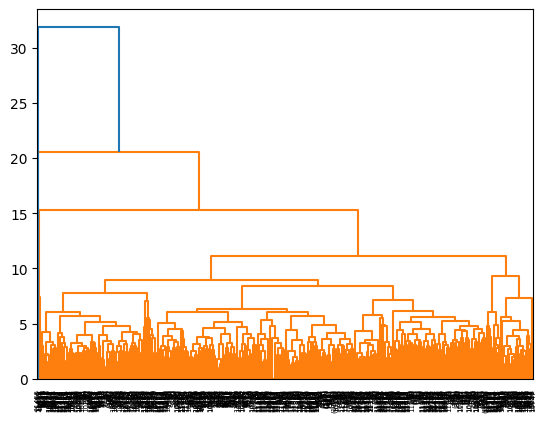

metric: euclidean, method:weighted, truncation_mode:level, level':15, k:10, silhouette: 0.2513790635842382 , DBscore:0.91438879417829


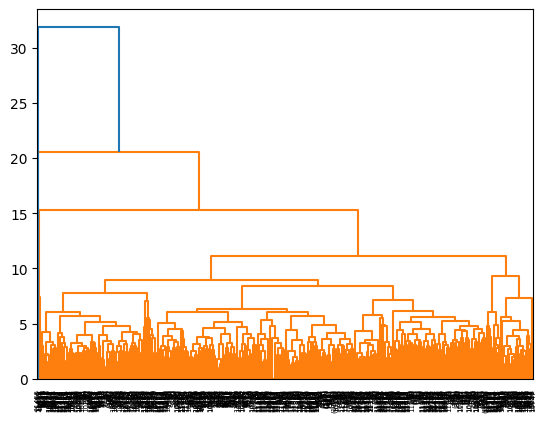

metric: euclidean, method:ward, truncation_mode:None, level':2, k:5, silhouette: 0.2964186709606364 , DBscore:1.3201323161652954


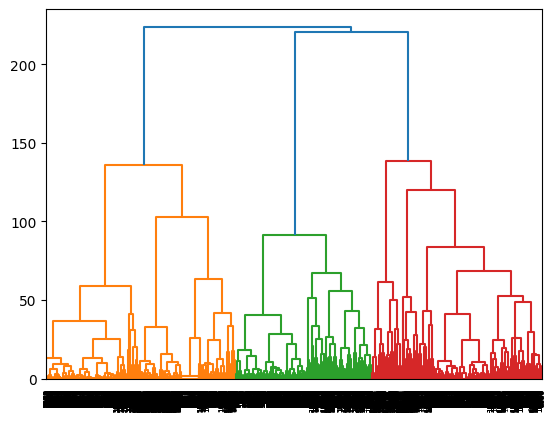

metric: euclidean, method:ward, truncation_mode:None, level':2, k:10, silhouette: 0.3246539735119403 , DBscore:1.4009660667741877


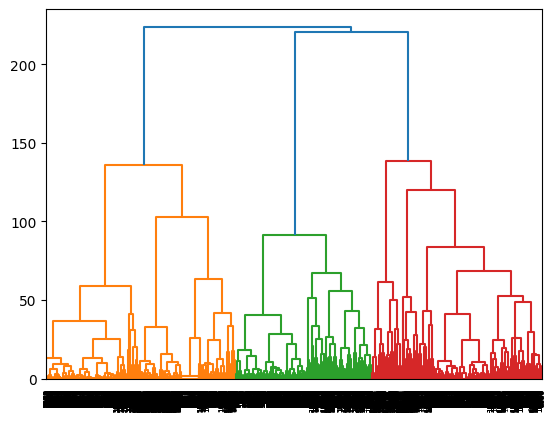

metric: euclidean, method:ward, truncation_mode:None, level':5, k:5, silhouette: 0.2964186709606364 , DBscore:1.3201323161652954


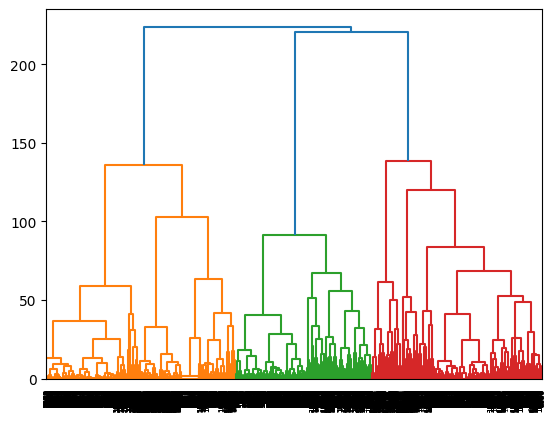

metric: euclidean, method:ward, truncation_mode:None, level':5, k:10, silhouette: 0.3246539735119403 , DBscore:1.4009660667741877


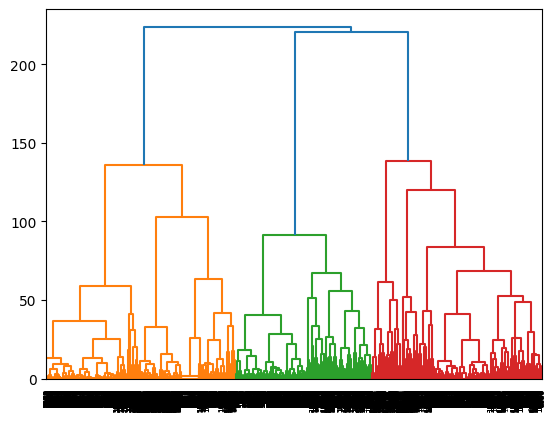

metric: euclidean, method:ward, truncation_mode:None, level':15, k:5, silhouette: 0.2964186709606364 , DBscore:1.3201323161652954


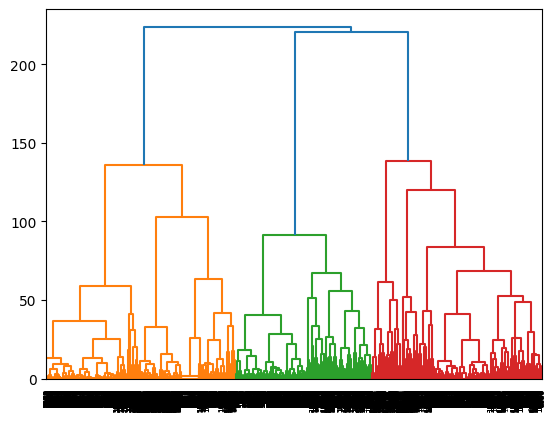

metric: euclidean, method:ward, truncation_mode:None, level':15, k:10, silhouette: 0.3246539735119403 , DBscore:1.4009660667741877


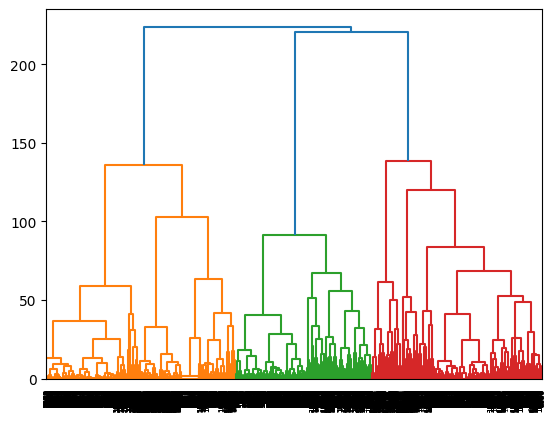

metric: euclidean, method:ward, truncation_mode:lastp, level':2, k:5, silhouette: 0.2964186709606364 , DBscore:1.3201323161652954


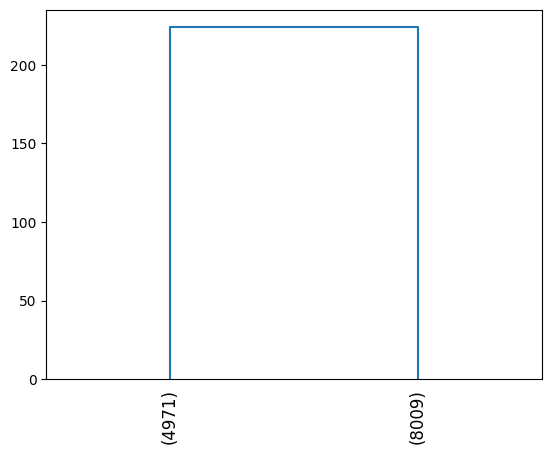

metric: euclidean, method:ward, truncation_mode:lastp, level':2, k:10, silhouette: 0.3246539735119403 , DBscore:1.4009660667741877


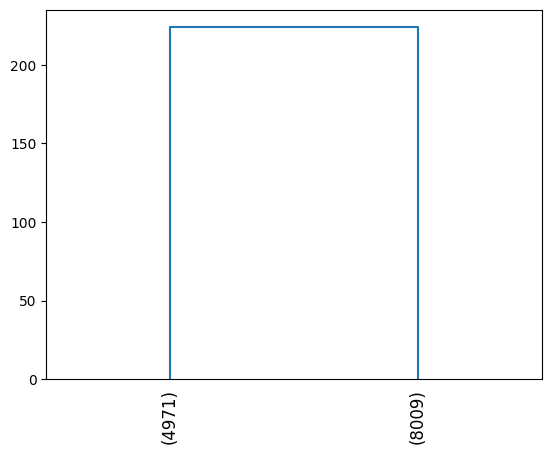

metric: euclidean, method:ward, truncation_mode:lastp, level':5, k:5, silhouette: 0.2964186709606364 , DBscore:1.3201323161652954


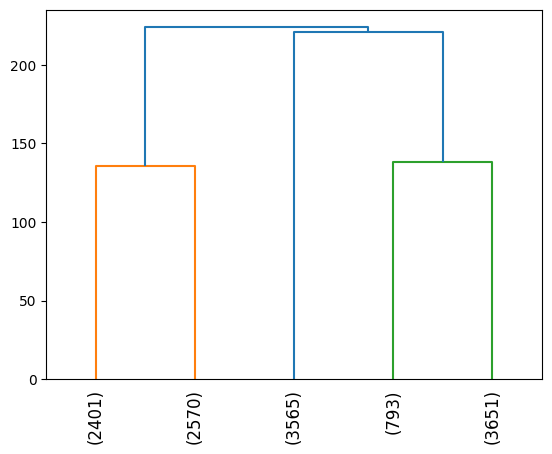

metric: euclidean, method:ward, truncation_mode:lastp, level':5, k:10, silhouette: 0.3246539735119403 , DBscore:1.4009660667741877


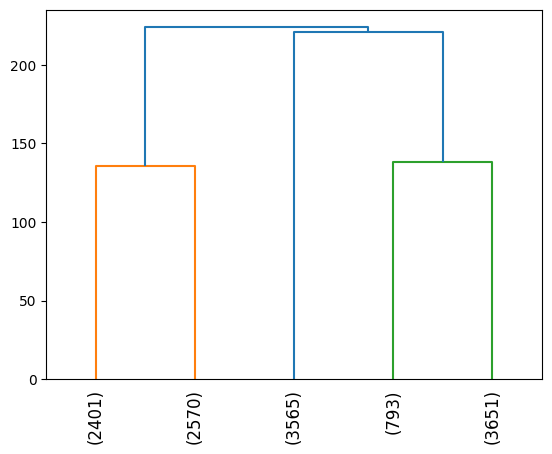

metric: euclidean, method:ward, truncation_mode:lastp, level':15, k:5, silhouette: 0.2964186709606364 , DBscore:1.3201323161652954


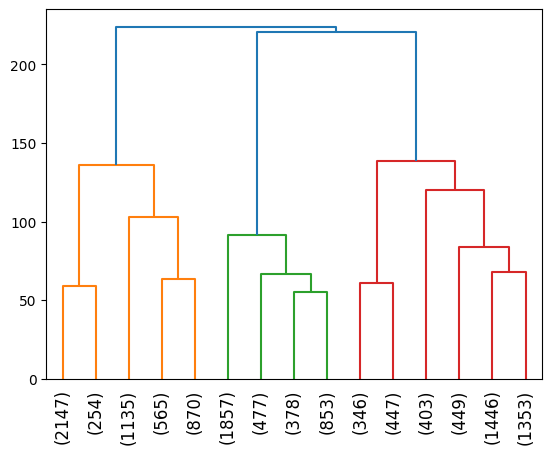

metric: euclidean, method:ward, truncation_mode:lastp, level':15, k:10, silhouette: 0.3246539735119403 , DBscore:1.4009660667741877


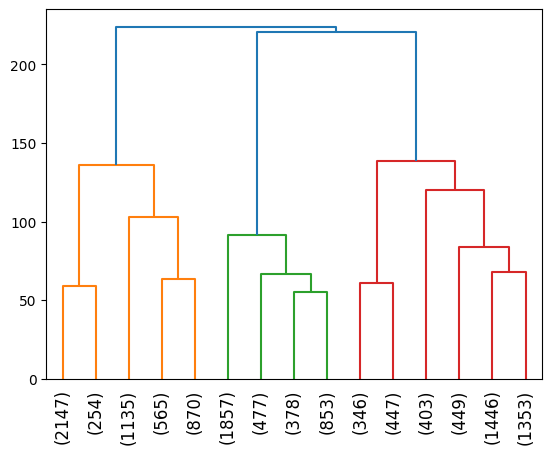

metric: euclidean, method:ward, truncation_mode:level, level':2, k:5, silhouette: 0.2964186709606364 , DBscore:1.3201323161652954


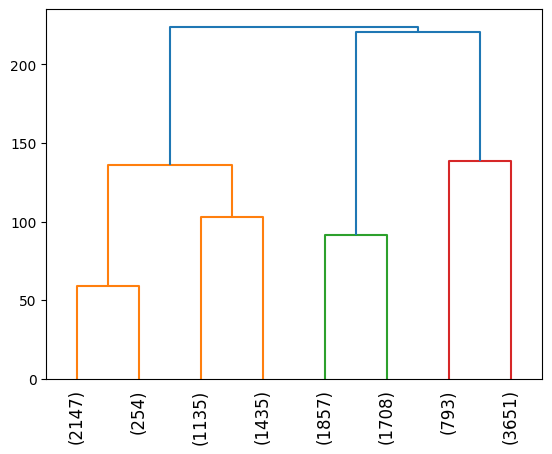

metric: euclidean, method:ward, truncation_mode:level, level':2, k:10, silhouette: 0.3246539735119403 , DBscore:1.4009660667741877


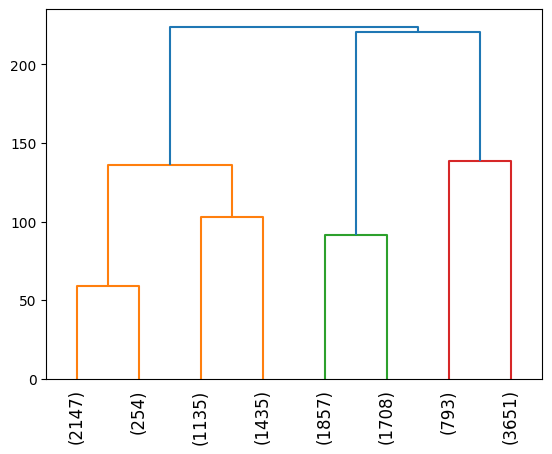

metric: euclidean, method:ward, truncation_mode:level, level':5, k:5, silhouette: 0.2964186709606364 , DBscore:1.3201323161652954


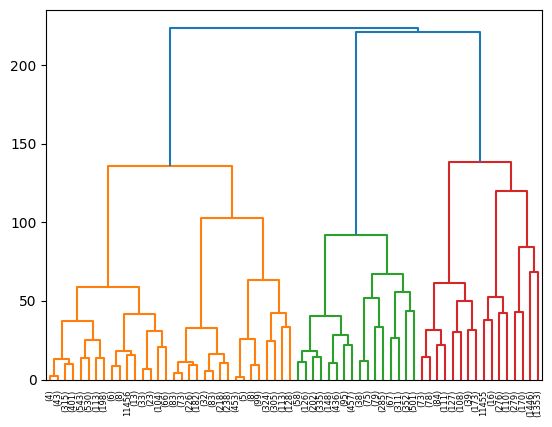

metric: euclidean, method:ward, truncation_mode:level, level':5, k:10, silhouette: 0.3246539735119403 , DBscore:1.4009660667741877


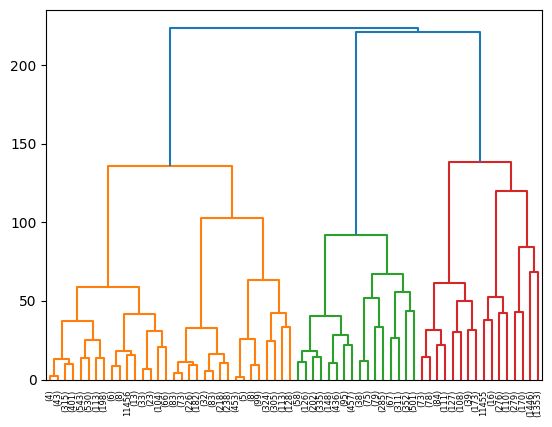

metric: euclidean, method:ward, truncation_mode:level, level':15, k:5, silhouette: 0.2964186709606364 , DBscore:1.3201323161652954


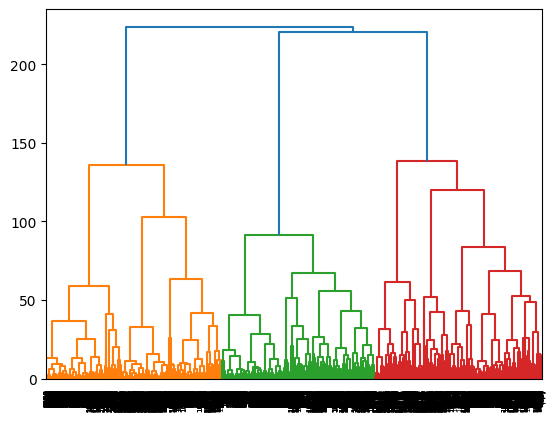

metric: euclidean, method:ward, truncation_mode:level, level':15, k:10, silhouette: 0.3246539735119403 , DBscore:1.4009660667741877


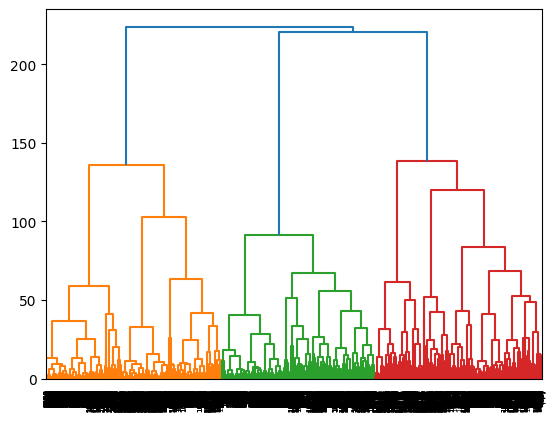

metric: euclidean, method:median, truncation_mode:None, level':2, k:5, silhouette: 0.6161184473241403 , DBscore:0.4507348245358395


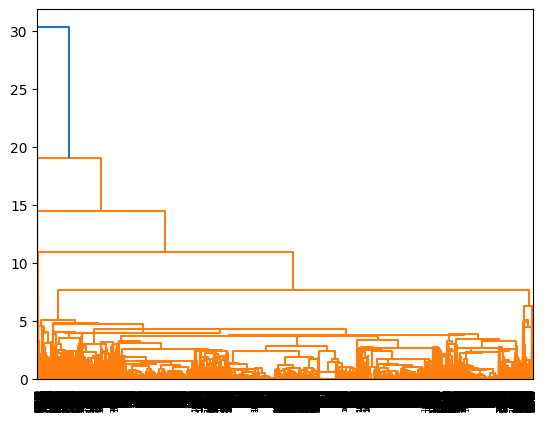

metric: euclidean, method:median, truncation_mode:None, level':2, k:10, silhouette: 0.15981399165037236 , DBscore:0.8619521693325327


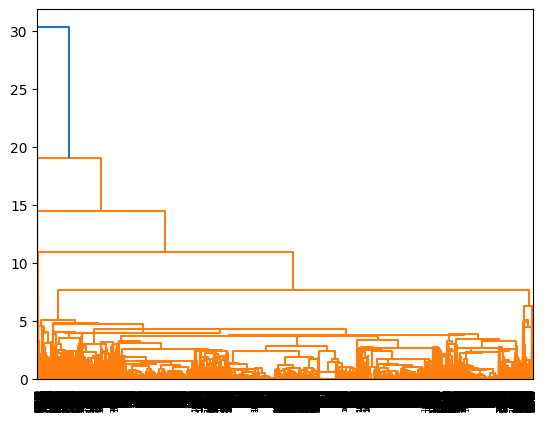

metric: euclidean, method:median, truncation_mode:None, level':5, k:5, silhouette: 0.6161184473241403 , DBscore:0.4507348245358395


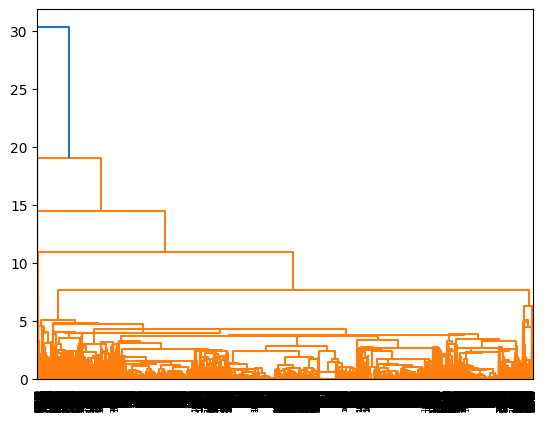

metric: euclidean, method:median, truncation_mode:None, level':5, k:10, silhouette: 0.15981399165037236 , DBscore:0.8619521693325327


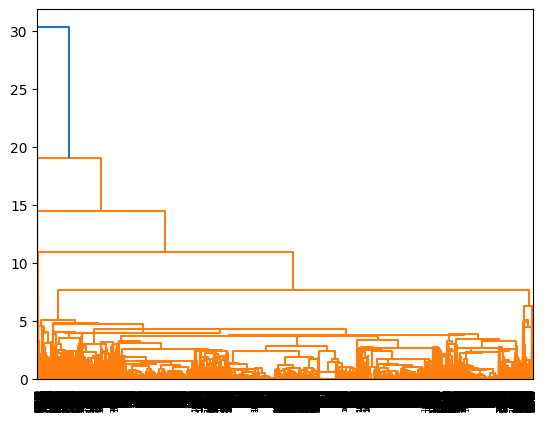

metric: euclidean, method:median, truncation_mode:None, level':15, k:5, silhouette: 0.6161184473241403 , DBscore:0.4507348245358395


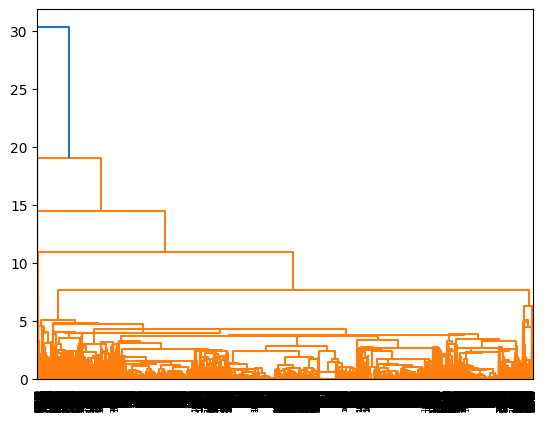

metric: euclidean, method:median, truncation_mode:None, level':15, k:10, silhouette: 0.15981399165037236 , DBscore:0.8619521693325327


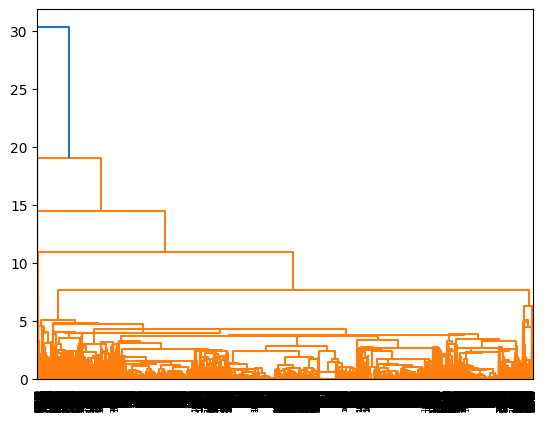

metric: euclidean, method:median, truncation_mode:lastp, level':2, k:5, silhouette: 0.6161184473241403 , DBscore:0.4507348245358395


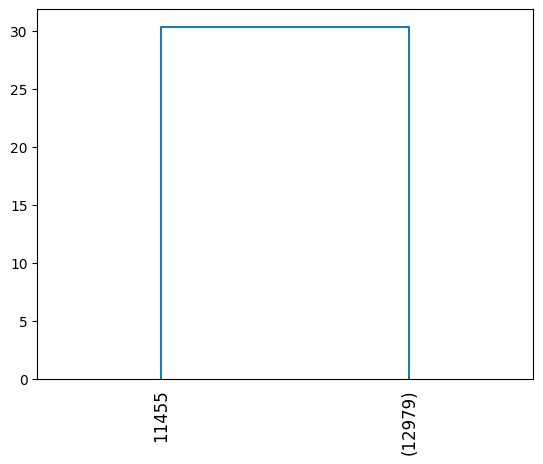

metric: euclidean, method:median, truncation_mode:lastp, level':2, k:10, silhouette: 0.15981399165037236 , DBscore:0.8619521693325327


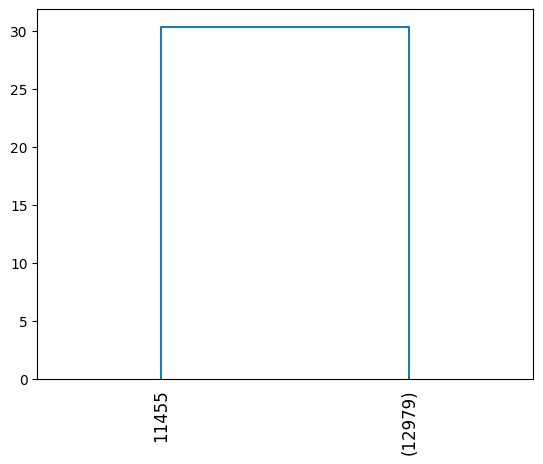

metric: euclidean, method:median, truncation_mode:lastp, level':5, k:5, silhouette: 0.6161184473241403 , DBscore:0.4507348245358395


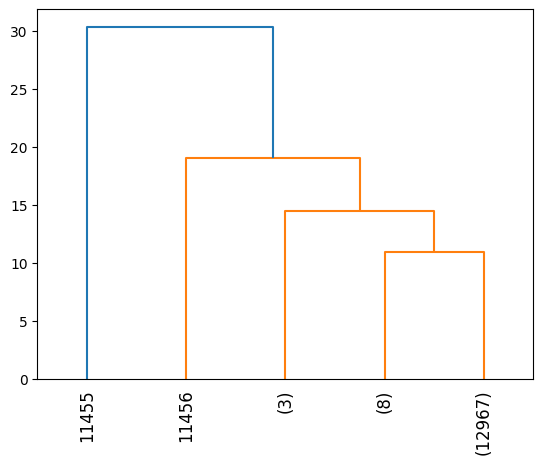

metric: euclidean, method:median, truncation_mode:lastp, level':5, k:10, silhouette: 0.15981399165037236 , DBscore:0.8619521693325327


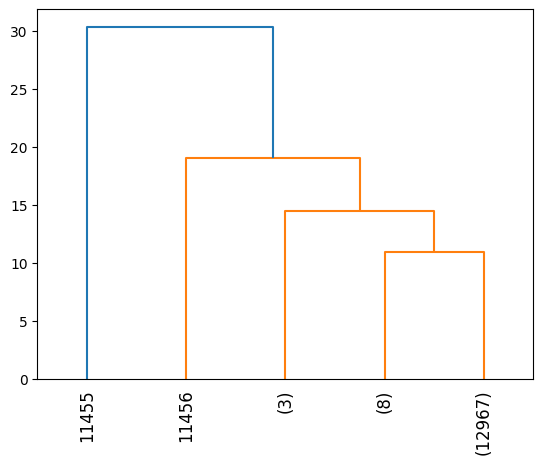

metric: euclidean, method:median, truncation_mode:lastp, level':15, k:5, silhouette: 0.6161184473241403 , DBscore:0.4507348245358395


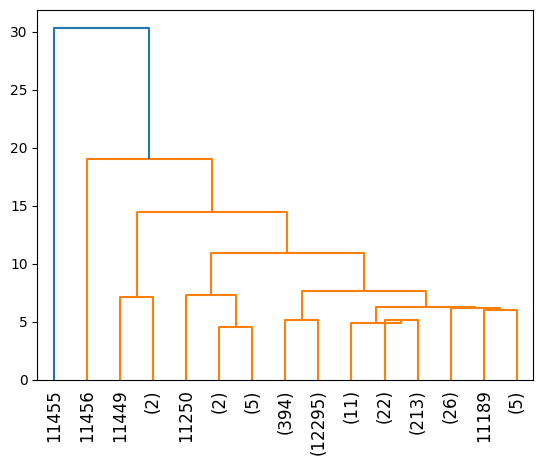

metric: euclidean, method:median, truncation_mode:lastp, level':15, k:10, silhouette: 0.15981399165037236 , DBscore:0.8619521693325327


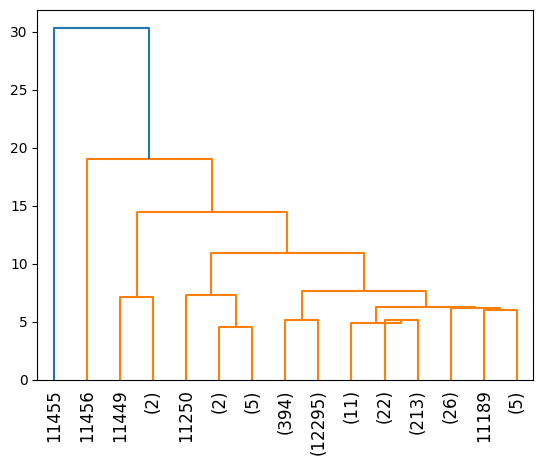

metric: euclidean, method:median, truncation_mode:level, level':2, k:5, silhouette: 0.6161184473241403 , DBscore:0.4507348245358395


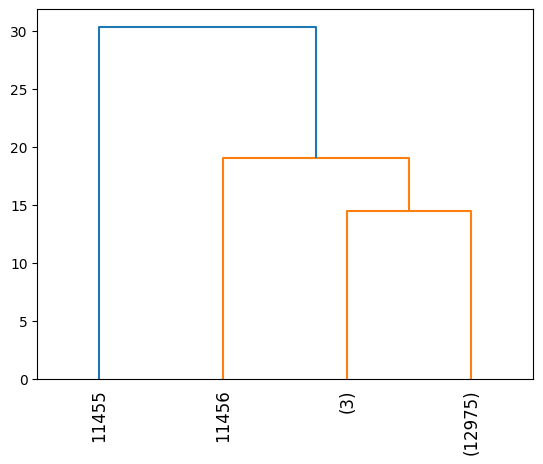

metric: euclidean, method:median, truncation_mode:level, level':2, k:10, silhouette: 0.15981399165037236 , DBscore:0.8619521693325327


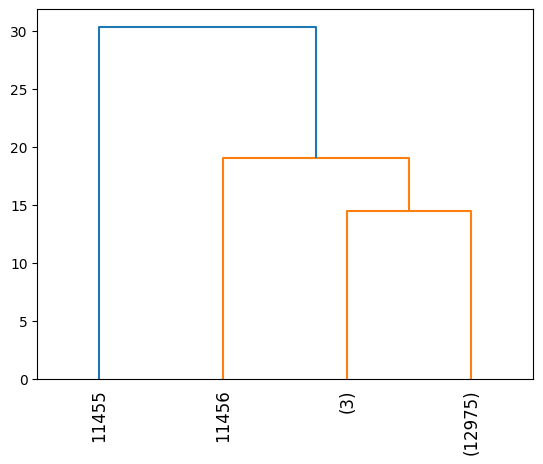

metric: euclidean, method:median, truncation_mode:level, level':5, k:5, silhouette: 0.6161184473241403 , DBscore:0.4507348245358395


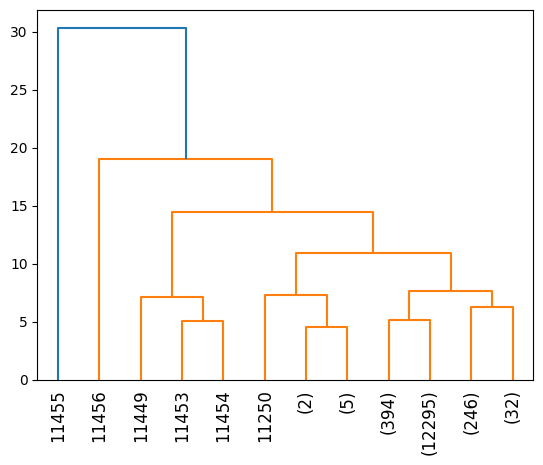

metric: euclidean, method:median, truncation_mode:level, level':5, k:10, silhouette: 0.15981399165037236 , DBscore:0.8619521693325327


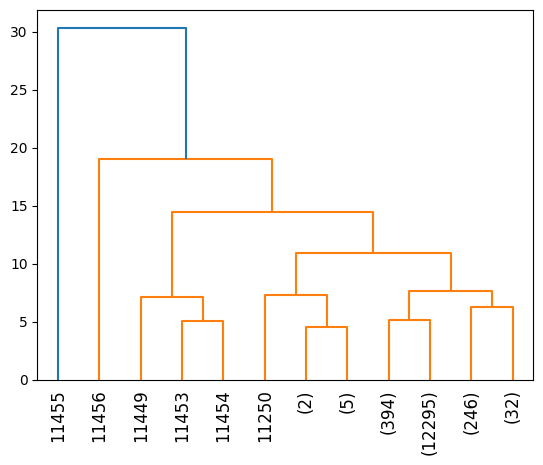

metric: euclidean, method:median, truncation_mode:level, level':15, k:5, silhouette: 0.6161184473241403 , DBscore:0.4507348245358395


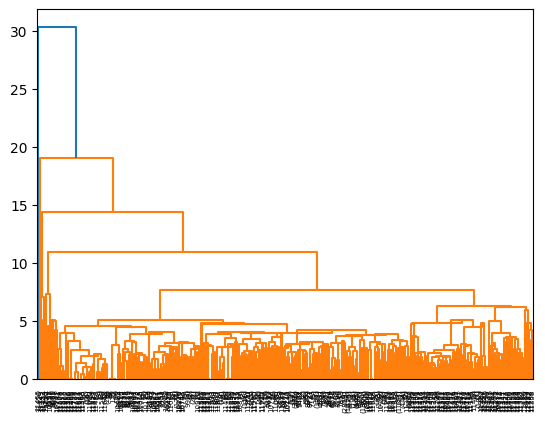

metric: euclidean, method:median, truncation_mode:level, level':15, k:10, silhouette: 0.15981399165037236 , DBscore:0.8619521693325327


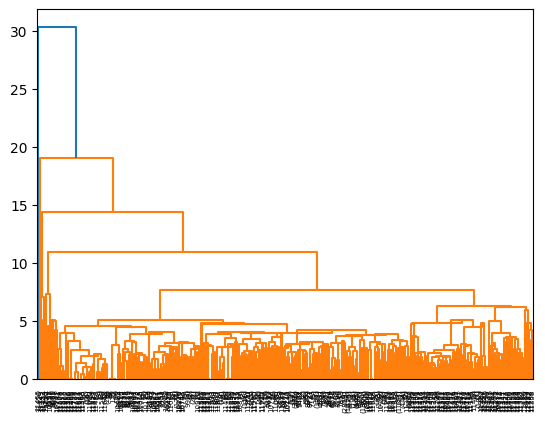

metric: euclidean, method:centroid, truncation_mode:None, level':2, k:5, silhouette: 0.6272731754698935 , DBscore:0.5755969411253022


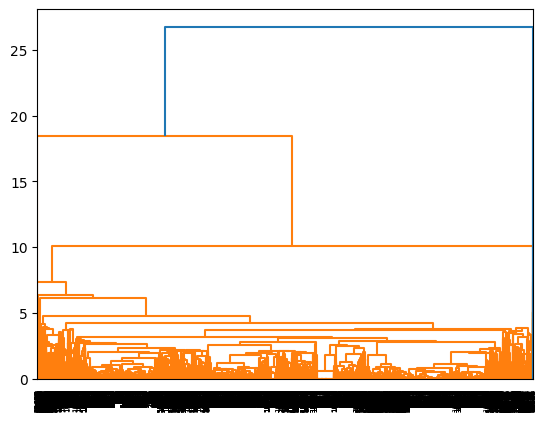

metric: euclidean, method:centroid, truncation_mode:None, level':2, k:10, silhouette: 0.4352423216963743 , DBscore:0.6119067238210402


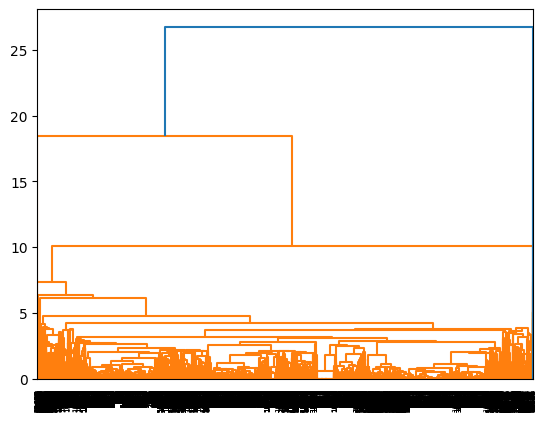

metric: euclidean, method:centroid, truncation_mode:None, level':5, k:5, silhouette: 0.6272731754698935 , DBscore:0.5755969411253022


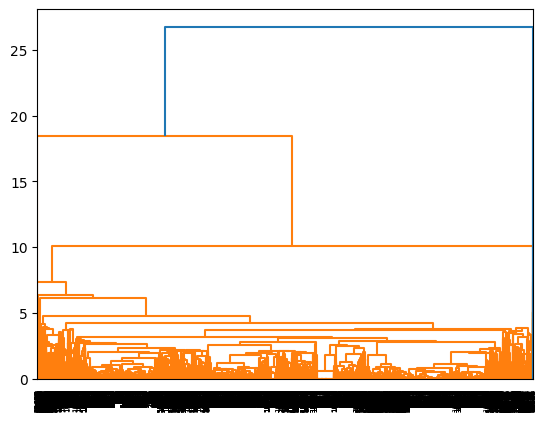

metric: euclidean, method:centroid, truncation_mode:None, level':5, k:10, silhouette: 0.4352423216963743 , DBscore:0.6119067238210402


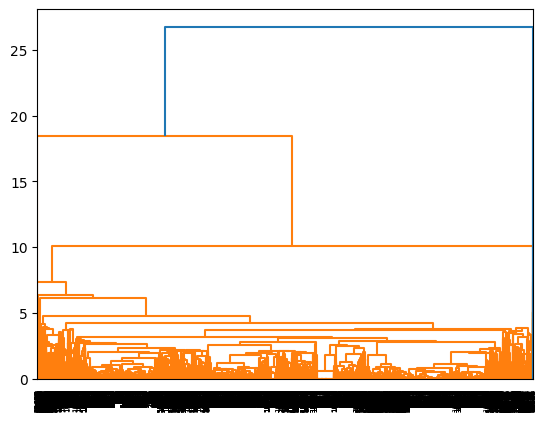

metric: euclidean, method:centroid, truncation_mode:None, level':15, k:5, silhouette: 0.6272731754698935 , DBscore:0.5755969411253022


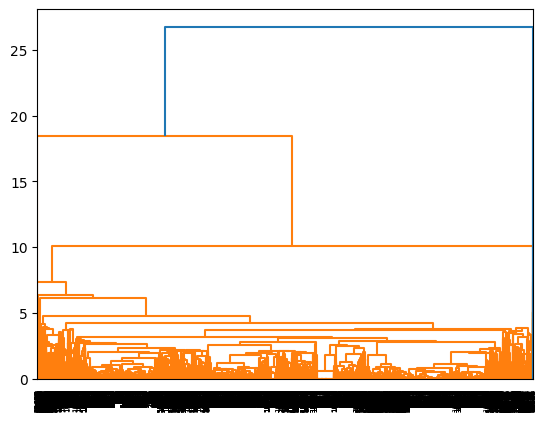

metric: euclidean, method:centroid, truncation_mode:None, level':15, k:10, silhouette: 0.4352423216963743 , DBscore:0.6119067238210402


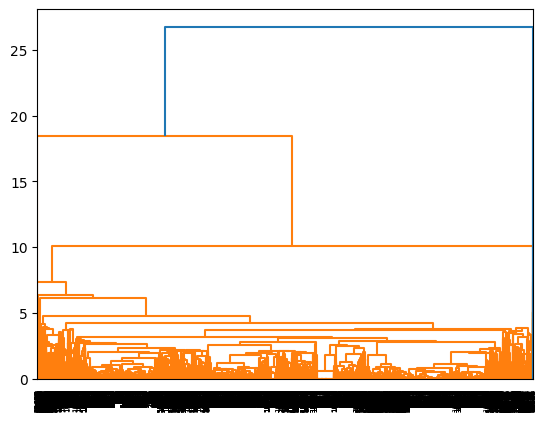

metric: euclidean, method:centroid, truncation_mode:lastp, level':2, k:5, silhouette: 0.6272731754698935 , DBscore:0.5755969411253022


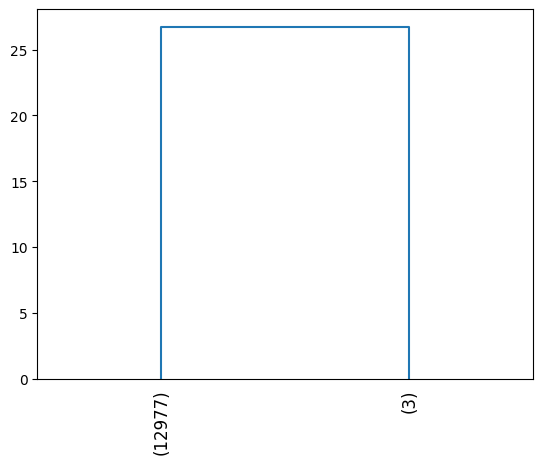

metric: euclidean, method:centroid, truncation_mode:lastp, level':2, k:10, silhouette: 0.4352423216963743 , DBscore:0.6119067238210402


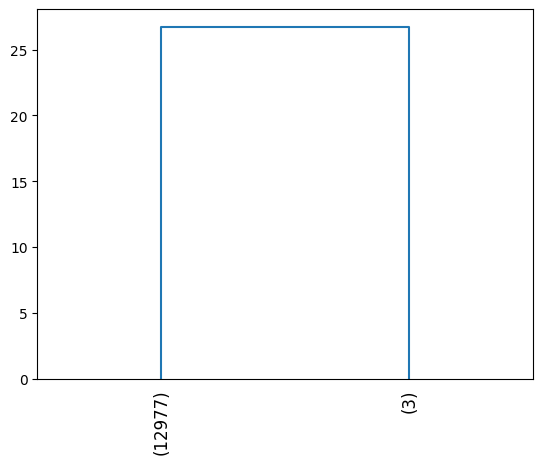

metric: euclidean, method:centroid, truncation_mode:lastp, level':5, k:5, silhouette: 0.6272731754698935 , DBscore:0.5755969411253022


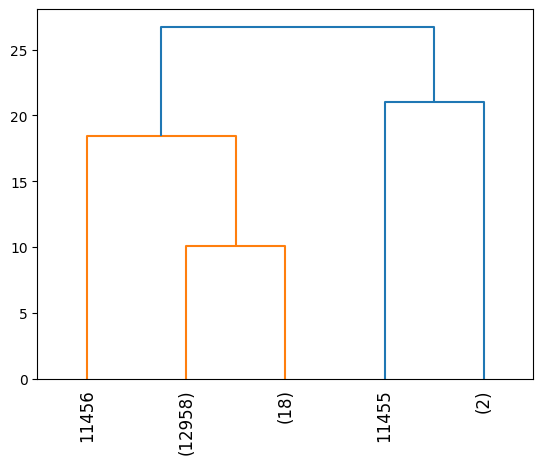

metric: euclidean, method:centroid, truncation_mode:lastp, level':5, k:10, silhouette: 0.4352423216963743 , DBscore:0.6119067238210402


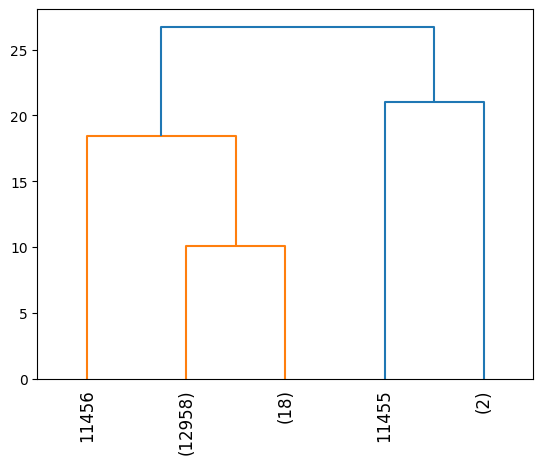

metric: euclidean, method:centroid, truncation_mode:lastp, level':15, k:5, silhouette: 0.6272731754698935 , DBscore:0.5755969411253022


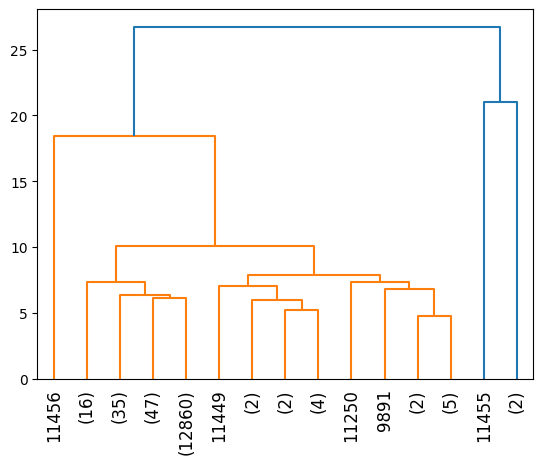

metric: euclidean, method:centroid, truncation_mode:lastp, level':15, k:10, silhouette: 0.4352423216963743 , DBscore:0.6119067238210402


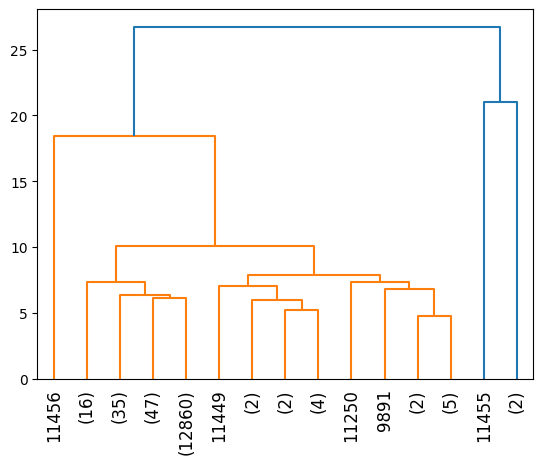

metric: euclidean, method:centroid, truncation_mode:level, level':2, k:5, silhouette: 0.6272731754698935 , DBscore:0.5755969411253022


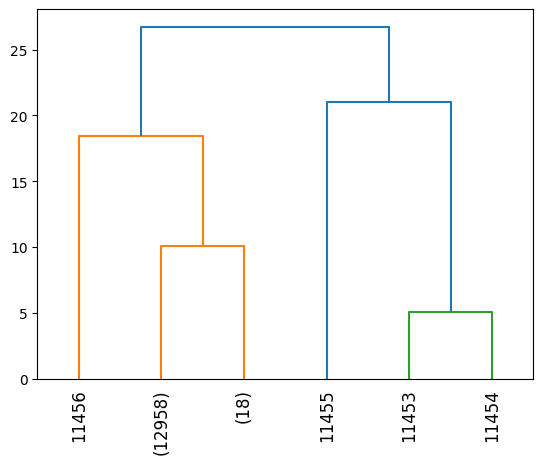

metric: euclidean, method:centroid, truncation_mode:level, level':2, k:10, silhouette: 0.4352423216963743 , DBscore:0.6119067238210402


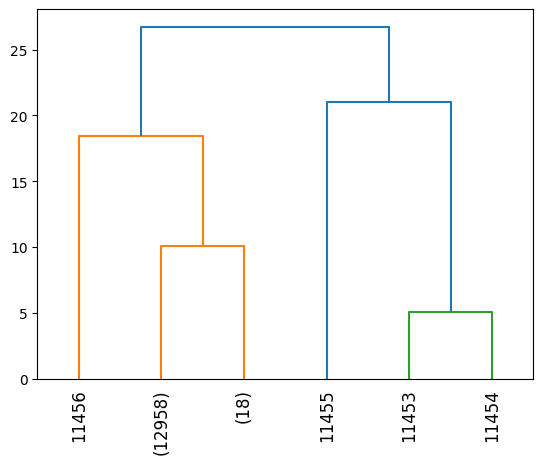

metric: euclidean, method:centroid, truncation_mode:level, level':5, k:5, silhouette: 0.6272731754698935 , DBscore:0.5755969411253022


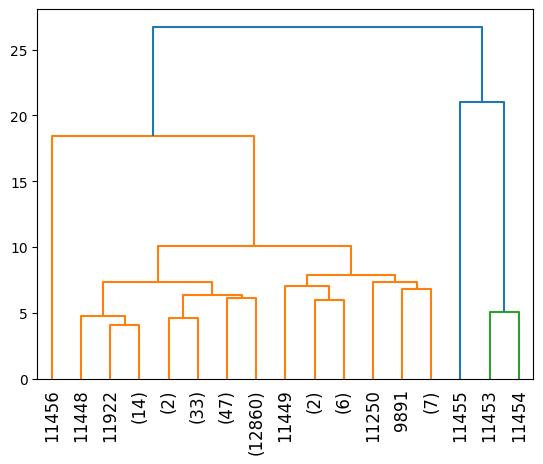

metric: euclidean, method:centroid, truncation_mode:level, level':5, k:10, silhouette: 0.4352423216963743 , DBscore:0.6119067238210402


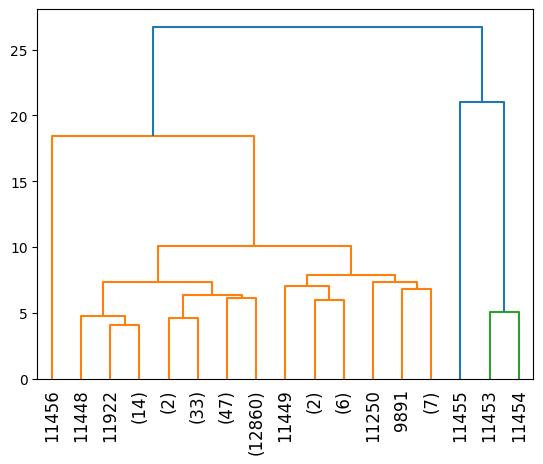

metric: euclidean, method:centroid, truncation_mode:level, level':15, k:5, silhouette: 0.6272731754698935 , DBscore:0.5755969411253022


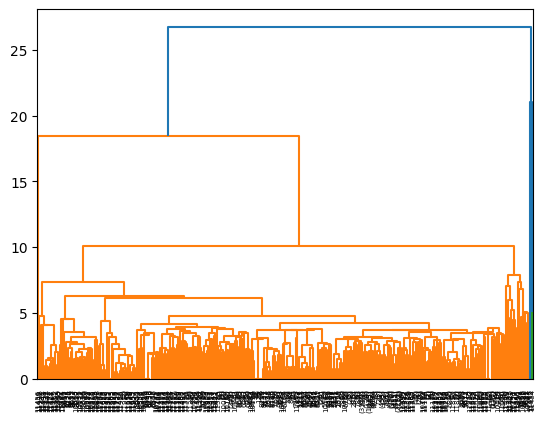

metric: euclidean, method:centroid, truncation_mode:level, level':15, k:10, silhouette: 0.4352423216963743 , DBscore:0.6119067238210402


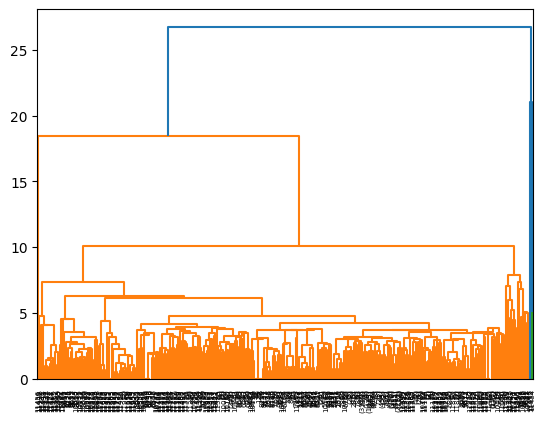

In [9]:
table = []
for metric in ['cityblock','correlation', 'cosine', 'euclidean']:
    methods = ['complete','single','average','weighted']
    if metric == 'euclidean':
        methods += ['ward','median','centroid']
    for method in methods:
        for truncation_mode in [None, 'lastp','level']:
            for level in [2,5,15]:
                for k in [5, 10]:
                    distances = pdist(df_numeric, metric=metric)
                    dlinkage = linkage(distances, metric=metric, method=method)
                    labels = fcluster(dlinkage,k,criterion='maxclust')
                    current_silhouette = silhouette_score(df_numeric, labels)
                    current_bouldin = metrics.davies_bouldin_score(df_numeric, labels)
                    print(f"metric: {metric}, method:{method}, truncation_mode:{truncation_mode}, level':{level}, k:{k}, silhouette: {current_silhouette} , DBscore:{current_bouldin}")
                    dendrogram(dlinkage, truncate_mode=truncation_mode, p=level, leaf_rotation=90)
                    plt.show()
                    table.append({'metric':metric, 'method':method, 'truncation_mode': truncation_mode, 'level':level, 'k':k, 'silhouette': current_silhouette, 'DBscore':current_bouldin})

df_table = pd.DataFrame(table)

Retraining the best Hierachical clustering found    

metric: euclidean, method:ward, truncation_mode:lastp, level':10, k:5, silhouette: 0.3063902973437957 , DBscore:1.2911929898379735


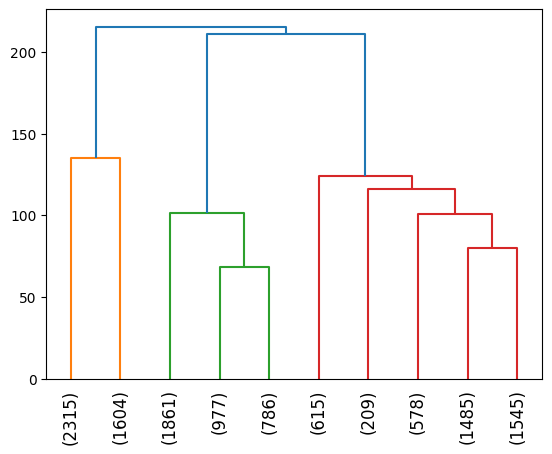

In [19]:
table = []
metric = "euclidean"
method = "ward"
truncation_mode = "lastp"
level = 10
k = 5

#metric: cosine, method:average, truncation_mode:level, level':5, k:5, silhouette: 0.27780283088250923 , DBscore:1.1667198461283845

distances = pdist(df_numeric, metric=metric)
dlinkage = linkage(distances, metric=metric, method=method)
clusters = fcluster(dlinkage,k,criterion='maxclust')
current_silhouette = silhouette_score(df_numeric, clusters)
current_bouldin = metrics.davies_bouldin_score(df_numeric, clusters)
print(f"metric: {metric}, method:{method}, truncation_mode:{truncation_mode}, level':{level}, k:{k}, silhouette: {current_silhouette} , DBscore:{current_bouldin}")
dendrogram(dlinkage, truncate_mode=truncation_mode, p=level, leaf_rotation=90)
plt.show()
table.append({'metric':metric, 'method':method, 'truncation_mode': truncation_mode, 'level':level, 'k':k, 'silhouette': current_silhouette, 'DBscore':current_bouldin})


Final Model

In [20]:
n_clusters = len(np.unique(clusters))
# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(1, n_clusters + 1):
    occ_list.append(np.count_nonzero(np.array(clusters) == k))

print('cluster sizes:', occ_list)

cluster sizes: [2315, 1604, 3624, 615, 3817]


Plot of cluster labels distribution

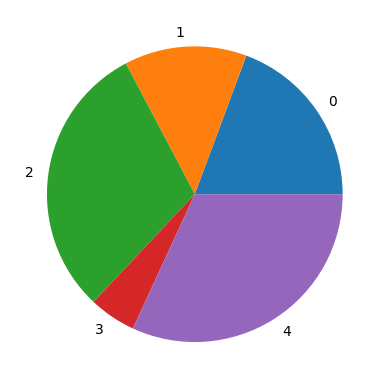

In [21]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

We can see from distribution that the number of records are not really well distributed, we will probably test more and see what happens later.

Involve_killing or not distribution

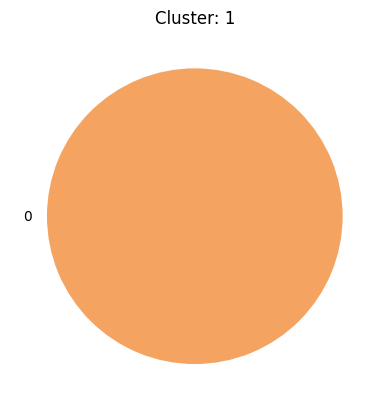

isKilled
0    2315
Name: count, dtype: int64


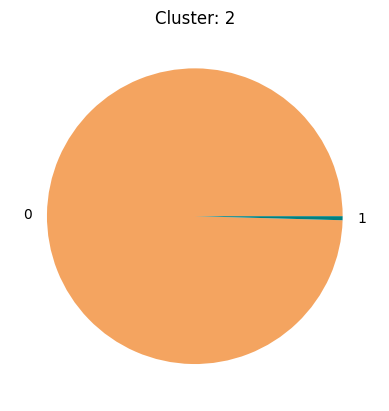

isKilled
0    1597
1       7
Name: count, dtype: int64


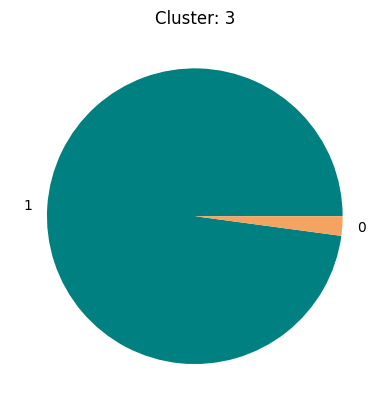

isKilled
1    3547
0      77
Name: count, dtype: int64


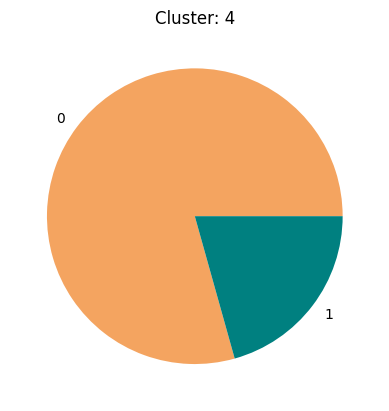

isKilled
0    488
1    127
Name: count, dtype: int64


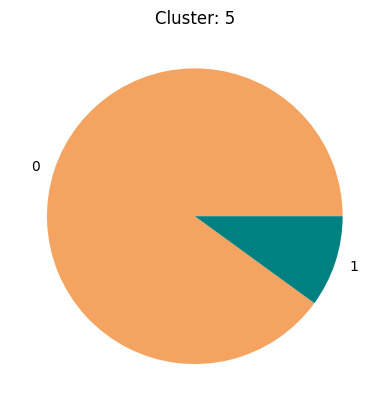

isKilled
0    3435
1     382
Name: count, dtype: int64


In [24]:
dict_colors_involve_killing = { 1: 'teal', 0: 'sandybrown'}

for k in range(1, n_clusters + 1):
    # Get 'bot' values for elems in cluster k
    killing_for_clust = df_categorical['isKilled'].loc[np.array(clusters) == k].value_counts()
    # Show pie plot
    labels_class = ['not-killed', 'killed']
    plt.title('Cluster: ' + str(k))
    plt.pie(killing_for_clust, labels= killing_for_clust.index, colors=[dict_colors_involve_killing[v] for v in killing_for_clust.keys()])
    plt.show()
    print(killing_for_clust)

Radiant plot

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

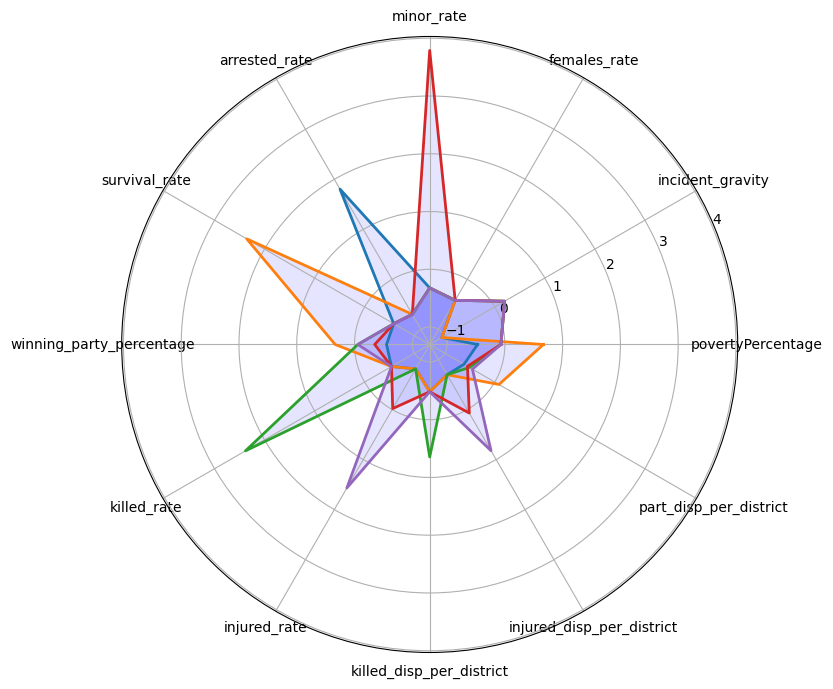

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(df_numeric.columns)
plt.figure(figsize=(8, 8))



for k in range(1, n_clusters + 1):
    angles = [n / float(N) * 2 * math.pi for n in range(N)] 
    values = df_numeric[np.array(clusters) == k].median().values.tolist()
        
    values += values[:1]
    angles += angles[:1]

    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], df_numeric.columns)
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, 'b', alpha=0.1)


plt.legend(labels=np.unique(np.array(clusters)))


plt.show()
